In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
df = pd.read_csv('/Users/isaacshareef/Desktop/Python_Code/Jupyter_notebook/EDR/All EDR')

In [3]:
df.shape

(96819, 15)

In [4]:
df.head()

,DEPT,BLOCK_HEIGHT,DIFFERENTIAL_PRESSURE,FLOW_IN,FLOW_OUT,HKLD_MAX,PUMP_1,PUMP_2,PUMP_3,ROP,WOB_MAX,RPM,SPP_(EDR),TRQ_MAX,GAMMA_RAY_(MEM)
0,103,93.57,20,504,68.01,70.22,60.0,0.0,60.0,0.0,0.0,64.99,362,0.4,70.62
1,104,93.57,20,504,68.02,70.27,60.0,0.0,60.0,0.0,0.0,64.98,362,0.4,70.58
2,105,93.57,20,504,68.03,70.32,60.0,0.0,60.0,0.0,0.0,64.97,362,0.4,70.55
3,106,93.57,20,504,68.05,70.37,60.0,0.0,60.0,0.0,0.0,64.95,362,0.4,70.51
4,107,93.57,20,504,68.06,70.42,60.0,0.0,60.0,0.0,0.0,64.94,362,0.4,70.48


In [5]:
#renaming certain columns to shorten or correct their text
df1 = df.rename(columns = {'BLOCK_HEIGHT':'BLOCK',
                     'DIFFERENTIAL_PRESSURE':'DIFF_PRESS',
                     'SPP_(EDR)':'SPP',
                     'DEPT':'DEPTH'
                    }
         )

In [6]:
df1

,DEPTH,BLOCK,DIFF_PRESS,FLOW_IN,FLOW_OUT,HKLD_MAX,PUMP_1,PUMP_2,PUMP_3,ROP,WOB_MAX,RPM,SPP,TRQ_MAX,GAMMA_RAY_(MEM)
0,103,93.57,20,504,68.01,70.22,60.0,0.0,60.0,0.00,0.0,64.99,362,0.4,70.62
1,104,93.57,20,504,68.02,70.27,60.0,0.0,60.0,0.00,0.0,64.98,362,0.4,70.58
2,105,93.57,20,504,68.03,70.32,60.0,0.0,60.0,0.00,0.0,64.97,362,0.4,70.55
3,106,93.57,20,504,68.05,70.37,60.0,0.0,60.0,0.00,0.0,64.95,362,0.4,70.51
4,107,93.57,20,504,68.06,70.42,60.0,0.0,60.0,0.00,0.0,64.94,362,0.4,70.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96814,20015,86.58,322,574,59.09,177.35,73.0,72.0,72.0,127.09,34.1,79.91,6228,23.5,-999.25
96815,20016,85.59,322,574,59.11,177.85,73.0,72.0,72.0,71.53,35.8,79.11,6221,25.2,-999.25
96816,20017,84.59,331,574,59.66,174.07,73.0,72.0,72.0,48.75,38.3,80.00,6241,25.0,-999.25
96817,20018,83.59,338,574,59.29,178.45,73.0,72.0,72.0,83.92,36.1,79.29,6266,25.0,-999.25


In [7]:
#dropping columns that I feel do not add value
df2 = df1.drop(columns = ['BLOCK',
               'FLOW_OUT',
               'FLOW_IN',
               'PUMP_1',
               'PUMP_2',
               'PUMP_3',
               'GAMMA_RAY_(MEM)'],
               axis = 1
              )
df2

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
0,103,20,70.22,0.00,0.0,64.99,362,0.4
1,104,20,70.27,0.00,0.0,64.98,362,0.4
2,105,20,70.32,0.00,0.0,64.97,362,0.4
3,106,20,70.37,0.00,0.0,64.95,362,0.4
4,107,20,70.42,0.00,0.0,64.94,362,0.4
...,...,...,...,...,...,...,...,...
96814,20015,322,177.35,127.09,34.1,79.91,6228,23.5
96815,20016,322,177.85,71.53,35.8,79.11,6221,25.2
96816,20017,331,174.07,48.75,38.3,80.00,6241,25.0
96817,20018,338,178.45,83.92,36.1,79.29,6266,25.0


In [8]:
df3 = df2[
    (df2.DEPTH > 12000)
    &(df2.ROP < 250)
    &(df2.ROP > 50)
    &(df2.DIFF_PRESS > 200)
    &(df2.TRQ_MAX > 10)
    &(df2.RPM > 70)].reset_index(drop = True)

'''

>12,000 in depth to ensure we are in the lateral with oil based mud
<250 ROP because anything above that is far into outlier territory
>200 Diff Press to rule out negative differential pressures
>10k TRQ to ensure the model is built on a rotating model and to ensure pipe rocking is excluded
>50 RPM in keeping with a rotating model

'''

df3

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
0,13101,368,206.97,51.74,26.3,79.37,5149,11.0
1,13103,405,202.66,73.99,28.5,79.12,5118,11.4
2,13109,484,204.22,52.24,29.9,79.14,5288,15.1
3,13110,479,203.34,50.13,30.1,79.41,5245,13.6
4,13111,477,205.38,50.59,29.0,79.68,5244,12.3
...,...,...,...,...,...,...,...,...
21814,20013,295,173.40,109.75,36.2,79.00,6192,25.8
21815,20014,331,177.59,70.11,37.6,79.33,6232,25.8
21816,20015,322,177.35,127.09,34.1,79.91,6228,23.5
21817,20016,322,177.85,71.53,35.8,79.11,6221,25.2


In [9]:
df3.describe()

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
count,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000
mean,17458.407764,466.596590,184.654953,106.337596,33.930496,80.073865,5676.741372,19.711023
std,2618.079487,125.229754,8.726285,41.343282,6.440146,3.627207,549.467399,3.357015
min,12168.000000,201.000000,160.870000,50.010000,4.200000,70.030000,4081.000000,10.100000
25%,15417.500000,375.000000,178.400000,74.580000,29.900000,79.000000,5243.000000,17.500000
50%,17658.000000,462.000000,183.670000,97.040000,34.000000,79.880000,5702.000000,19.900000
75%,19436.500000,552.000000,190.140000,127.800000,38.100000,81.530000,6071.000000,22.200000
max,22456.000000,877.000000,215.890000,249.180000,57.100000,101.650000,6944.000000,28.000000


In [10]:
#popping ROP column to reorder the columns with ROP first
col_to_pop = 'ROP'
first_col = df3.pop(col_to_pop)
df3

,DEPTH,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,13101,368,206.97,26.3,79.37,5149,11.0
1,13103,405,202.66,28.5,79.12,5118,11.4
2,13109,484,204.22,29.9,79.14,5288,15.1
3,13110,479,203.34,30.1,79.41,5245,13.6
4,13111,477,205.38,29.0,79.68,5244,12.3
...,...,...,...,...,...,...,...
21814,20013,295,173.40,36.2,79.00,6192,25.8
21815,20014,331,177.59,37.6,79.33,6232,25.8
21816,20015,322,177.35,34.1,79.91,6228,23.5
21817,20016,322,177.85,35.8,79.11,6221,25.2


In [11]:
#inserting ROP to 0 column
df3.insert(0, col_to_pop, first_col)

In [12]:
df3

,ROP,DEPTH,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,51.74,13101,368,206.97,26.3,79.37,5149,11.0
1,73.99,13103,405,202.66,28.5,79.12,5118,11.4
2,52.24,13109,484,204.22,29.9,79.14,5288,15.1
3,50.13,13110,479,203.34,30.1,79.41,5245,13.6
4,50.59,13111,477,205.38,29.0,79.68,5244,12.3
...,...,...,...,...,...,...,...,...
21814,109.75,20013,295,173.40,36.2,79.00,6192,25.8
21815,70.11,20014,331,177.59,37.6,79.33,6232,25.8
21816,127.09,20015,322,177.35,34.1,79.91,6228,23.5
21817,71.53,20016,322,177.85,35.8,79.11,6221,25.2


In [13]:
#dropping depth column
df4 = df3.drop(columns = 'DEPTH', axis = 1)
print(df4)

          ROP  DIFF_PRESS  HKLD_MAX  WOB_MAX    RPM   SPP  TRQ_MAX
0       51.74         368    206.97     26.3  79.37  5149     11.0
1       73.99         405    202.66     28.5  79.12  5118     11.4
2       52.24         484    204.22     29.9  79.14  5288     15.1
3       50.13         479    203.34     30.1  79.41  5245     13.6
4       50.59         477    205.38     29.0  79.68  5244     12.3
...       ...         ...       ...      ...    ...   ...      ...
21814  109.75         295    173.40     36.2  79.00  6192     25.8
21815   70.11         331    177.59     37.6  79.33  6232     25.8
21816  127.09         322    177.35     34.1  79.91  6228     23.5
21817   71.53         322    177.85     35.8  79.11  6221     25.2
21818   83.92         338    178.45     36.1  79.29  6266     25.0

[21819 rows x 7 columns]


In [14]:
#defining X and y
X_data = df4[df4.columns[1:7]]
y_target = df4['ROP']

In [15]:
X_data

,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,368,206.97,26.3,79.37,5149,11.0
1,405,202.66,28.5,79.12,5118,11.4
2,484,204.22,29.9,79.14,5288,15.1
3,479,203.34,30.1,79.41,5245,13.6
4,477,205.38,29.0,79.68,5244,12.3
...,...,...,...,...,...,...
21814,295,173.40,36.2,79.00,6192,25.8
21815,331,177.59,37.6,79.33,6232,25.8
21816,322,177.35,34.1,79.91,6228,23.5
21817,322,177.85,35.8,79.11,6221,25.2


In [16]:
y_target

0         51.74
1         73.99
2         52.24
3         50.13
4         50.59
          ...  
21814    109.75
21815     70.11
21816    127.09
21817     71.53
21818     83.92
Name: ROP, Length: 21819, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = df4.columns
scatter_matrix(df4[attributes], figsize = (16,16), alpha = 0.3)
plt.show()

In [ ]:
import seaborn as sns
sns.heatmap(df4.corr(),
            annot = True,
            fmt = '.1g',
            vmin = -1,
            vmax = 1,
           linewidth = .5,
           cmap = 
        'YlGnBu_r')

In [17]:
#input of polynomial features
from sklearn.preprocessing import PolynomialFeatures as pf

Poly_x = pf(interaction_only = True, degree = 2)
X_poly = Poly_x.fit_transform(df4[df4.columns[1:7]])

In [19]:
#train test split with polynomial features
from sklearn.model_selection import train_test_split
(X_train_full, X_test), (y_train_full, y_test) = train_test_split(
    X_data, y_target
)

In [20]:
len(X_test)

5455

In [21]:
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(13091, 6)

In [ ]:
'''
No need to run this cell.  This is an example of building a model 
in a Sci-Kit Learn Wrapper and will not be used for this project.  
It uses the functionality of Sci-Kit Learn.

#creates the model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs = 300,
             validation_data = (X_valid, y_valid),
callbacks = [keras.callbacks.EarlyStopping(patience = 70)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

'''

In [61]:
#defining the model build function for the scikit learn wrapper
def build_model(
    n_hidden = 3,
    n_neurons = 100,
    learning_rate = 1e-3,
    input_shape = [6,]
               ):
    
    #create the model
    model_tune = keras.models.Sequential()
    
    #create the input layer
    model_tune.add(keras.layers.InputLayer(input_shape = input_shape))
    
    #create the hidden layers
    for layer in range(n_hidden):
        model_tune.add(keras.layers.Dense(n_neurons, activation = 'relu'))
        
    #create the output layer
    model_tune.add(keras.layers.Dense(1))
    
    #define other parameters
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = tf.keras.losses.Huber(
        delta=.08925,
        reduction="auto",
        name="huber_loss"
    )
        
    #compile the model
    model_tune.compile(
        loss = loss,
        optimizer = optimizer
    )
    
    return model_tune

In [62]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [1,2,3,4],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(1e-3, 1e-2)
}

In [63]:
#Builds the model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#Executes Randomized Search with CV
rnd_search_cv = RandomizedSearchCV(
    keras_reg,
    param_distribs,
    n_iter = 10,
    cv = 3
)

#Fits the model
rnd_search_cv.fit(X_train, y_train, epochs = 300,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 50)])

Epoch 1/300
273/273 [==============================] - 0s 1ms/step - loss: 4.9898 - val_loss: 2.8406
Epoch 2/300
273/273 [==============================] - 0s 1ms/step - loss: 2.6420 - val_loss: 2.6331
Epoch 3/300
273/273 [==============================] - 0s 1ms/step - loss: 2.5119 - val_loss: 2.5451
Epoch 4/300
273/273 [==============================] - 0s 1ms/step - loss: 2.4474 - val_loss: 2.4958
Epoch 5/300
273/273 [==============================] - 0s 1ms/step - loss: 2.4062 - val_loss: 2.4914
Epoch 6/300
273/273 [==============================] - 0s 1ms/step - loss: 2.3832 - val_loss: 2.4439
Epoch 7/300
273/273 [==============================] - 0s 1ms/step - loss: 2.3610 - val_loss: 2.4184
Epoch 8/300
273/273 [==============================] - 0s 1ms/step - loss: 2.3401 - val_loss: 2.4002
Epoch 9/300
273/273 [==============================] - 0s 1ms/step - loss: 2.3208 - val_loss: 2.3834
Epoch 10/300
273/273 [==============================] - 0s 1ms/step - loss: 2.3011 - val_lo

273/273 [==============================] - 0s 1ms/step - loss: 1.9556 - val_loss: 2.0562
Epoch 82/300
273/273 [==============================] - 0s 994us/step - loss: 1.9571 - val_loss: 2.0615
Epoch 83/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9538 - val_loss: 2.0552
Epoch 84/300
273/273 [==============================] - 0s 970us/step - loss: 1.9447 - val_loss: 2.0662
Epoch 85/300
273/273 [==============================] - 0s 972us/step - loss: 1.9436 - val_loss: 2.0559
Epoch 86/300
273/273 [==============================] - 0s 960us/step - loss: 1.9414 - val_loss: 2.0582
Epoch 87/300
273/273 [==============================] - 0s 993us/step - loss: 1.9387 - val_loss: 2.0554
Epoch 88/300
273/273 [==============================] - 0s 938us/step - loss: 1.9387 - val_loss: 2.0521
Epoch 89/300
273/273 [==============================] - 0s 968us/step - loss: 1.9351 - val_loss: 2.0845
Epoch 90/300
273/273 [==============================] - 0s 965us/step - loss: 1.9

273/273 [==============================] - 0s 1ms/step - loss: 1.8515 - val_loss: 1.9784
Epoch 160/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8440 - val_loss: 1.9767
Epoch 161/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8552 - val_loss: 1.9914
Epoch 162/300
273/273 [==============================] - 0s 950us/step - loss: 1.8425 - val_loss: 1.9826
Epoch 163/300
273/273 [==============================] - 0s 971us/step - loss: 1.8608 - val_loss: 2.0363
Epoch 164/300
273/273 [==============================] - 0s 946us/step - loss: 1.8449 - val_loss: 1.9919
Epoch 165/300
273/273 [==============================] - 0s 966us/step - loss: 1.8414 - val_loss: 1.9838
Epoch 166/300
273/273 [==============================] - 0s 948us/step - loss: 1.8420 - val_loss: 1.9839
Epoch 167/300
273/273 [==============================] - 0s 944us/step - loss: 1.8431 - val_loss: 1.9900
Epoch 168/300
273/273 [==============================] - 0s 952us/step - lo

273/273 [==============================] - 0s 973us/step - loss: 1.7872 - val_loss: 1.9774
Epoch 238/300
273/273 [==============================] - 0s 977us/step - loss: 1.7937 - val_loss: 1.9549
Epoch 239/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7881 - val_loss: 1.9506
Epoch 240/300
273/273 [==============================] - 0s 978us/step - loss: 1.7899 - val_loss: 1.9688
Epoch 241/300
273/273 [==============================] - 0s 977us/step - loss: 1.7958 - val_loss: 1.9873
Epoch 242/300
273/273 [==============================] - 0s 960us/step - loss: 1.7885 - val_loss: 1.9757
Epoch 243/300
273/273 [==============================] - 0s 1000us/step - loss: 1.7893 - val_loss: 1.9555
Epoch 244/300
273/273 [==============================] - 0s 965us/step - loss: 1.7892 - val_loss: 1.9672
Epoch 245/300
273/273 [==============================] - 0s 941us/step - loss: 1.7881 - val_loss: 1.9617
Epoch 246/300
273/273 [==============================] - 0s 947us/step

Epoch 15/300
273/273 [==============================] - 0s 973us/step - loss: 2.1854 - val_loss: 2.2359
Epoch 16/300
273/273 [==============================] - 0s 1ms/step - loss: 2.1722 - val_loss: 2.2368
Epoch 17/300
273/273 [==============================] - 0s 955us/step - loss: 2.1617 - val_loss: 2.2362
Epoch 18/300
273/273 [==============================] - 0s 999us/step - loss: 2.1504 - val_loss: 2.2400
Epoch 19/300
273/273 [==============================] - 0s 949us/step - loss: 2.1410 - val_loss: 2.2172
Epoch 20/300
273/273 [==============================] - 0s 968us/step - loss: 2.1305 - val_loss: 2.1764
Epoch 21/300
273/273 [==============================] - 0s 973us/step - loss: 2.1214 - val_loss: 2.1684
Epoch 22/300
273/273 [==============================] - 0s 974us/step - loss: 2.1108 - val_loss: 2.1663
Epoch 23/300
273/273 [==============================] - 0s 953us/step - loss: 2.1012 - val_loss: 2.1739
Epoch 24/300
273/273 [==============================] - 0s 975us/s

273/273 [==============================] - 0s 980us/step - loss: 1.8660 - val_loss: 1.9865
Epoch 95/300
273/273 [==============================] - 0s 982us/step - loss: 1.8662 - val_loss: 1.9752
Epoch 96/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8620 - val_loss: 1.9829
Epoch 97/300
273/273 [==============================] - 0s 997us/step - loss: 1.8581 - val_loss: 1.9931
Epoch 98/300
273/273 [==============================] - 0s 945us/step - loss: 1.8663 - val_loss: 1.9767
Epoch 99/300
273/273 [==============================] - 0s 986us/step - loss: 1.8639 - val_loss: 1.9752
Epoch 100/300
273/273 [==============================] - 0s 983us/step - loss: 1.8604 - val_loss: 2.0347
Epoch 101/300
273/273 [==============================] - 0s 948us/step - loss: 1.8614 - val_loss: 1.9737
Epoch 102/300
273/273 [==============================] - 0s 953us/step - loss: 1.8553 - val_loss: 1.9856
Epoch 103/300
273/273 [==============================] - 0s 975us/step - los

273/273 [==============================] - 0s 974us/step - loss: 1.7825 - val_loss: 1.9381
Epoch 173/300
273/273 [==============================] - 0s 990us/step - loss: 1.7716 - val_loss: 1.9180
Epoch 174/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7764 - val_loss: 1.9388
Epoch 175/300
273/273 [==============================] - 0s 973us/step - loss: 1.7800 - val_loss: 1.9373
Epoch 176/300
273/273 [==============================] - 0s 977us/step - loss: 1.7721 - val_loss: 1.9376
Epoch 177/300
273/273 [==============================] - 0s 950us/step - loss: 1.7720 - val_loss: 1.9263
Epoch 178/300
273/273 [==============================] - 0s 952us/step - loss: 1.7743 - val_loss: 1.9174
Epoch 179/300
273/273 [==============================] - 0s 956us/step - loss: 1.7738 - val_loss: 1.9255
Epoch 180/300
273/273 [==============================] - 0s 948us/step - loss: 1.7713 - val_loss: 1.9605
Epoch 181/300
273/273 [==============================] - 0s 973us/step 

273/273 [==============================] - 0s 963us/step - loss: 1.7332 - val_loss: 1.9114
Epoch 251/300
273/273 [==============================] - 0s 953us/step - loss: 1.7364 - val_loss: 1.8903
Epoch 252/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7381 - val_loss: 1.8966
Epoch 253/300
273/273 [==============================] - 0s 966us/step - loss: 1.7342 - val_loss: 1.9089
Epoch 254/300
273/273 [==============================] - 0s 956us/step - loss: 1.7327 - val_loss: 1.8983
Epoch 255/300
273/273 [==============================] - 0s 988us/step - loss: 1.7314 - val_loss: 1.8948
Epoch 256/300
273/273 [==============================] - 0s 947us/step - loss: 1.7342 - val_loss: 1.9092
Epoch 257/300
273/273 [==============================] - 0s 992us/step - loss: 1.7320 - val_loss: 1.9291
Epoch 258/300
273/273 [==============================] - 0s 990us/step - loss: 1.7312 - val_loss: 1.9005
Epoch 259/300
273/273 [==============================] - 1s 3ms/step - 

Epoch 28/300
273/273 [==============================] - 0s 1ms/step - loss: 2.1524 - val_loss: 2.1991
Epoch 29/300
273/273 [==============================] - 0s 1ms/step - loss: 2.1437 - val_loss: 2.1817
Epoch 30/300
273/273 [==============================] - 0s 997us/step - loss: 2.1389 - val_loss: 2.1767
Epoch 31/300
273/273 [==============================] - 0s 997us/step - loss: 2.1340 - val_loss: 2.1665
Epoch 32/300
273/273 [==============================] - 0s 976us/step - loss: 2.1247 - val_loss: 2.1962
Epoch 33/300
273/273 [==============================] - 0s 983us/step - loss: 2.1271 - val_loss: 2.1693
Epoch 34/300
273/273 [==============================] - 0s 991us/step - loss: 2.1157 - val_loss: 2.1513
Epoch 35/300
273/273 [==============================] - 0s 961us/step - loss: 2.1113 - val_loss: 2.1627
Epoch 36/300
273/273 [==============================] - 0s 971us/step - loss: 2.1087 - val_loss: 2.1656
Epoch 37/300
273/273 [==============================] - 0s 978us/ste

273/273 [==============================] - 0s 990us/step - loss: 1.9176 - val_loss: 2.0041
Epoch 108/300
273/273 [==============================] - 0s 950us/step - loss: 1.9224 - val_loss: 2.0126
Epoch 109/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9178 - val_loss: 2.0352
Epoch 110/300
273/273 [==============================] - 0s 984us/step - loss: 1.9126 - val_loss: 2.0156
Epoch 111/300
273/273 [==============================] - 0s 966us/step - loss: 1.9135 - val_loss: 2.0224
Epoch 112/300
273/273 [==============================] - 0s 957us/step - loss: 1.9137 - val_loss: 2.0380
Epoch 113/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9097 - val_loss: 2.0114
Epoch 114/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9066 - val_loss: 2.0110
Epoch 115/300
273/273 [==============================] - 0s 954us/step - loss: 1.9076 - val_loss: 2.0138
Epoch 116/300
273/273 [==============================] - 0s 988us/step - lo

273/273 [==============================] - 0s 962us/step - loss: 1.8342 - val_loss: 1.9606
Epoch 186/300
273/273 [==============================] - 0s 962us/step - loss: 1.8427 - val_loss: 1.9854
Epoch 187/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8380 - val_loss: 1.9715
Epoch 188/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8340 - val_loss: 1.9705
Epoch 189/300
273/273 [==============================] - 0s 967us/step - loss: 1.8356 - val_loss: 1.9587
Epoch 190/300
273/273 [==============================] - 0s 965us/step - loss: 1.8330 - val_loss: 1.9563
Epoch 191/300
273/273 [==============================] - 0s 981us/step - loss: 1.8344 - val_loss: 1.9542
Epoch 192/300
273/273 [==============================] - 0s 965us/step - loss: 1.8292 - val_loss: 1.9684
Epoch 193/300
273/273 [==============================] - 0s 970us/step - loss: 1.8347 - val_loss: 1.9498
Epoch 194/300
273/273 [==============================] - 0s 1ms/step - lo

273/273 [==============================] - 0s 982us/step - loss: 1.7865 - val_loss: 1.9590
Epoch 264/300
273/273 [==============================] - 0s 953us/step - loss: 1.7882 - val_loss: 1.9311
Epoch 265/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7942 - val_loss: 1.9203
Epoch 266/300
273/273 [==============================] - 0s 990us/step - loss: 1.7882 - val_loss: 1.9378
Epoch 267/300
273/273 [==============================] - 0s 950us/step - loss: 1.7933 - val_loss: 1.9337
Epoch 268/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7869 - val_loss: 1.9290
Epoch 269/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7842 - val_loss: 1.9418
Epoch 270/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7852 - val_loss: 1.9302
Epoch 271/300
273/273 [==============================] - 0s 951us/step - loss: 1.7899 - val_loss: 1.9416
Epoch 272/300
273/273 [==============================] - 0s 971us/step - loss

Epoch 42/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7166 - val_loss: 1.8624
Epoch 43/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6981 - val_loss: 1.9148
Epoch 44/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7046 - val_loss: 1.8348
Epoch 45/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7021 - val_loss: 1.8486
Epoch 46/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6894 - val_loss: 1.8432
Epoch 47/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6734 - val_loss: 1.9627
Epoch 48/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6715 - val_loss: 1.8571
Epoch 49/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6830 - val_loss: 1.8731
Epoch 50/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6761 - val_loss: 1.8543
Epoch 51/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6608

273/273 [==============================] - 0s 1ms/step - loss: 1.4840 - val_loss: 1.8260
Epoch 123/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4779 - val_loss: 1.7711
Epoch 124/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4527 - val_loss: 1.7666
Epoch 125/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4491 - val_loss: 1.7607
Epoch 126/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4571 - val_loss: 1.7735
Epoch 127/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4577 - val_loss: 1.7915
Epoch 128/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4681 - val_loss: 1.8305
Epoch 129/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4671 - val_loss: 1.7722
Epoch 130/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4517 - val_loss: 1.7421
Epoch 131/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4606 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.3597 - val_loss: 1.7179
Epoch 202/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3790 - val_loss: 1.8247
Epoch 203/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3774 - val_loss: 1.7612
Epoch 204/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3627 - val_loss: 1.7787
Epoch 205/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3597 - val_loss: 1.7309
Epoch 206/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3616 - val_loss: 1.7621
Epoch 207/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3673 - val_loss: 1.7258
Epoch 208/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3545 - val_loss: 1.7484
Epoch 209/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3592 - val_loss: 1.7689
Epoch 210/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3640 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.8015 - val_loss: 1.9362
Epoch 30/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7769 - val_loss: 1.8656
Epoch 31/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7549 - val_loss: 1.8647
Epoch 32/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7515 - val_loss: 1.8557
Epoch 33/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7474 - val_loss: 1.8967
Epoch 34/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7497 - val_loss: 1.8736
Epoch 35/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7380 - val_loss: 1.8954
Epoch 36/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7320 - val_loss: 1.8607
Epoch 37/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7269 - val_loss: 1.8137
Epoch 38/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7286 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.4931 - val_loss: 1.7839
Epoch 110/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5115 - val_loss: 1.7543
Epoch 111/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5130 - val_loss: 1.7369
Epoch 112/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5002 - val_loss: 1.8252
Epoch 113/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5026 - val_loss: 1.7711
Epoch 114/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5024 - val_loss: 1.7867
Epoch 115/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5108 - val_loss: 1.7966
Epoch 116/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4954 - val_loss: 1.7863
Epoch 117/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5041 - val_loss: 1.7428
Epoch 118/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4878 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.8267 - val_loss: 1.8921
Epoch 28/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8583 - val_loss: 1.9242
Epoch 29/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8167 - val_loss: 1.9754
Epoch 30/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8145 - val_loss: 1.9585
Epoch 31/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8094 - val_loss: 2.0475
Epoch 32/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7993 - val_loss: 1.9090
Epoch 33/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7972 - val_loss: 1.8771
Epoch 34/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7913 - val_loss: 1.8967
Epoch 35/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7829 - val_loss: 1.8520
Epoch 36/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7661 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.5748 - val_loss: 1.7382
Epoch 108/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5661 - val_loss: 1.8364
Epoch 109/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5591 - val_loss: 1.7537
Epoch 110/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5584 - val_loss: 1.7734
Epoch 111/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5639 - val_loss: 1.7797
Epoch 112/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5721 - val_loss: 1.7969
Epoch 113/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5445 - val_loss: 1.8177
Epoch 114/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5558 - val_loss: 1.7959
Epoch 115/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5512 - val_loss: 1.7797
Epoch 116/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5501 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.8207 - val_loss: 1.9650
Epoch 30/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8242 - val_loss: 1.9136
Epoch 31/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7966 - val_loss: 1.9373
Epoch 32/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7986 - val_loss: 1.9308
Epoch 33/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7834 - val_loss: 1.9491
Epoch 34/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7695 - val_loss: 1.9040
Epoch 35/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7677 - val_loss: 1.9242
Epoch 36/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7563 - val_loss: 1.9378
Epoch 37/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7667 - val_loss: 1.8877
Epoch 38/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7553 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.4013 - val_loss: 1.8501
Epoch 110/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4017 - val_loss: 1.8246
Epoch 111/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3998 - val_loss: 1.7823
Epoch 112/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3931 - val_loss: 1.8184
Epoch 113/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4021 - val_loss: 1.7957
Epoch 114/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3838 - val_loss: 1.7975
Epoch 115/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3928 - val_loss: 1.8151
Epoch 116/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3757 - val_loss: 1.7968
Epoch 117/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3815 - val_loss: 1.8134
Epoch 118/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3904 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.1995 - val_loss: 1.8284
Epoch 189/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1999 - val_loss: 1.8363
Epoch 190/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1989 - val_loss: 1.8088
Epoch 191/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1820 - val_loss: 1.8343
Epoch 192/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2160 - val_loss: 1.8078
Epoch 193/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1962 - val_loss: 1.8209
Epoch 194/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1917 - val_loss: 1.8163
Epoch 195/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1924 - val_loss: 1.8111
Epoch 196/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1957 - val_loss: 1.8174
Epoch 197/300
273/273 [==============================] - 0s 1ms/step - loss: 1.1908 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.6518 - val_loss: 1.8733
Epoch 59/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6500 - val_loss: 1.8349
Epoch 60/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6398 - val_loss: 1.8419
Epoch 61/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6303 - val_loss: 1.8880
Epoch 62/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6468 - val_loss: 1.8232
Epoch 63/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6232 - val_loss: 1.8357
Epoch 64/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6216 - val_loss: 1.8963
Epoch 65/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6196 - val_loss: 1.8416
Epoch 66/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6148 - val_loss: 1.8291
Epoch 67/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6221 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.4157 - val_loss: 1.7773
Epoch 139/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3967 - val_loss: 1.8521
Epoch 140/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4166 - val_loss: 1.8012
Epoch 141/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4073 - val_loss: 1.7800
Epoch 142/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4042 - val_loss: 1.8050
Epoch 143/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3950 - val_loss: 1.8154
Epoch 144/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3869 - val_loss: 1.7859
Epoch 145/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3899 - val_loss: 1.8041
Epoch 146/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3967 - val_loss: 1.8002
Epoch 147/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3905 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.2363 - val_loss: 1.8234
Epoch 218/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2462 - val_loss: 1.7800
Epoch 219/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2374 - val_loss: 1.8035
Epoch 220/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2573 - val_loss: 1.8032
Epoch 221/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2359 - val_loss: 1.8016
Epoch 222/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2297 - val_loss: 1.8056
Epoch 223/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2344 - val_loss: 1.8113
Epoch 224/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2349 - val_loss: 1.7983
Epoch 225/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2349 - val_loss: 1.8144
Epoch 226/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2394 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.6407 - val_loss: 1.8067
Epoch 61/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6290 - val_loss: 1.8085
Epoch 62/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6264 - val_loss: 1.8180
Epoch 63/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6241 - val_loss: 1.8097
Epoch 64/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6327 - val_loss: 1.8051
Epoch 65/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6130 - val_loss: 1.8037
Epoch 66/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6106 - val_loss: 1.8317
Epoch 67/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6061 - val_loss: 1.8525
Epoch 68/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6159 - val_loss: 1.8477
Epoch 69/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5974 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.3628 - val_loss: 1.7886
Epoch 141/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3671 - val_loss: 1.7604
Epoch 142/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3490 - val_loss: 1.8263
Epoch 143/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3386 - val_loss: 1.8266
Epoch 144/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3473 - val_loss: 1.8356
Epoch 145/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3491 - val_loss: 1.7805
Epoch 146/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3493 - val_loss: 1.8301
Epoch 147/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3325 - val_loss: 1.8153
Epoch 148/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3339 - val_loss: 1.7596
Epoch 149/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3273 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.7677 - val_loss: 1.9171
Epoch 64/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7650 - val_loss: 1.9221
Epoch 65/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7673 - val_loss: 1.9199
Epoch 66/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7498 - val_loss: 1.9436
Epoch 67/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7644 - val_loss: 1.9211
Epoch 68/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7497 - val_loss: 1.9409
Epoch 69/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7545 - val_loss: 1.9277
Epoch 70/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7357 - val_loss: 1.9100
Epoch 71/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7363 - val_loss: 1.9279
Epoch 72/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7354 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.5317 - val_loss: 1.8163
Epoch 144/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5326 - val_loss: 1.7901
Epoch 145/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5308 - val_loss: 1.8698
Epoch 146/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5346 - val_loss: 1.7830
Epoch 147/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5259 - val_loss: 1.8776
Epoch 148/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5285 - val_loss: 1.7844
Epoch 149/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5198 - val_loss: 1.7992
Epoch 150/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5212 - val_loss: 1.8191
Epoch 151/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5224 - val_loss: 1.7894
Epoch 152/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5137 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.9298 - val_loss: 2.0093
Epoch 31/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9182 - val_loss: 2.0735
Epoch 32/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9227 - val_loss: 2.0003
Epoch 33/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9126 - val_loss: 2.0682
Epoch 34/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9163 - val_loss: 2.0269
Epoch 35/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9029 - val_loss: 2.0156
Epoch 36/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9030 - val_loss: 2.0092
Epoch 37/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9010 - val_loss: 2.0096
Epoch 38/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8870 - val_loss: 2.0901
Epoch 39/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8817 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.6120 - val_loss: 1.8080
Epoch 111/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5900 - val_loss: 1.8555
Epoch 112/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6032 - val_loss: 1.8404
Epoch 113/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5835 - val_loss: 1.8278
Epoch 114/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5874 - val_loss: 1.8197
Epoch 115/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5807 - val_loss: 1.8243
Epoch 116/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5783 - val_loss: 1.8072
Epoch 117/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5918 - val_loss: 1.8192
Epoch 118/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5782 - val_loss: 1.8669
Epoch 119/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5838 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.4331 - val_loss: 1.7950
Epoch 190/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4310 - val_loss: 1.7961
Epoch 191/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4206 - val_loss: 1.7599
Epoch 192/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4289 - val_loss: 1.7824
Epoch 193/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4116 - val_loss: 1.7966
Epoch 194/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4223 - val_loss: 1.7914
Epoch 195/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4296 - val_loss: 1.7706
Epoch 196/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4343 - val_loss: 1.8070
Epoch 197/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4095 - val_loss: 1.7770
Epoch 198/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4181 - v

273/273 [==============================] - 0s 1ms/step - loss: 1.9779 - val_loss: 2.0660
Epoch 28/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9628 - val_loss: 2.0574
Epoch 29/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9757 - val_loss: 2.0512
Epoch 30/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9593 - val_loss: 2.0528
Epoch 31/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9430 - val_loss: 2.0133
Epoch 32/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9469 - val_loss: 2.0509
Epoch 33/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9287 - val_loss: 1.9971
Epoch 34/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9302 - val_loss: 2.0410
Epoch 35/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9269 - val_loss: 2.0465
Epoch 36/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9307 - val_loss: 

273/273 [==============================] - 0s 1ms/step - loss: 1.6458 - val_loss: 1.8608
Epoch 108/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6424 - val_loss: 1.8557
Epoch 109/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6325 - val_loss: 1.8398
Epoch 110/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6368 - val_loss: 1.8674
Epoch 111/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6347 - val_loss: 1.8748
Epoch 112/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6390 - val_loss: 1.8397
Epoch 113/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6250 - val_loss: 1.8150
Epoch 114/300
273/273 [==============================] - 0s 995us/step - loss: 1.6258 - val_loss: 1.8573
Epoch 115/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6243 - val_loss: 1.8373
Epoch 116/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6213 -

273/273 [==============================] - 0s 1ms/step - loss: 1.4692 - val_loss: 1.7803
Epoch 187/300
273/273 [==============================] - 0s 996us/step - loss: 1.4656 - val_loss: 1.7781
Epoch 188/300
273/273 [==============================] - 0s 980us/step - loss: 1.4714 - val_loss: 1.7848
Epoch 189/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4606 - val_loss: 1.8070
Epoch 190/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4581 - val_loss: 1.7693
Epoch 191/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4596 - val_loss: 1.8192
Epoch 192/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4631 - val_loss: 1.7904
Epoch 193/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4584 - val_loss: 1.7671
Epoch 194/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4472 - val_loss: 1.7606
Epoch 195/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4628

273/273 [==============================] - 0s 1ms/step - loss: 1.3461 - val_loss: 1.7619
Epoch 266/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3571 - val_loss: 1.7699
Epoch 267/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3558 - val_loss: 1.7593
Epoch 268/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3590 - val_loss: 1.7534
Epoch 269/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3387 - val_loss: 1.7817
Epoch 270/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3597 - val_loss: 1.7830
Epoch 271/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3479 - val_loss: 1.7744
Epoch 272/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3412 - val_loss: 1.7698
Epoch 273/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3510 - val_loss: 1.7739
Epoch 274/300
273/273 [==============================] - 0s 986us/step - loss: 1.3548 -

273/273 [==============================] - 0s 990us/step - loss: 1.8506 - val_loss: 1.9742
Epoch 52/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8500 - val_loss: 1.9789
Epoch 53/300
273/273 [==============================] - 0s 976us/step - loss: 1.8564 - val_loss: 1.9859
Epoch 54/300
273/273 [==============================] - 0s 955us/step - loss: 1.8345 - val_loss: 1.9750
Epoch 55/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8337 - val_loss: 1.9862
Epoch 56/300
273/273 [==============================] - 0s 960us/step - loss: 1.8357 - val_loss: 2.0035
Epoch 57/300
273/273 [==============================] - 0s 975us/step - loss: 1.8329 - val_loss: 1.9876
Epoch 58/300
273/273 [==============================] - 0s 980us/step - loss: 1.8253 - val_loss: 1.9589
Epoch 59/300
273/273 [==============================] - 0s 951us/step - loss: 1.8248 - val_loss: 1.9792
Epoch 60/300
273/273 [==============================] - 0s 985us/step - loss: 1.8

Epoch 130/300
273/273 [==============================] - 0s 979us/step - loss: 1.6165 - val_loss: 1.8500
Epoch 131/300
273/273 [==============================] - 0s 957us/step - loss: 1.6212 - val_loss: 1.8404
Epoch 132/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6098 - val_loss: 1.8472
Epoch 133/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6205 - val_loss: 1.8854
Epoch 134/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6125 - val_loss: 1.8267
Epoch 135/300
273/273 [==============================] - 0s 957us/step - loss: 1.6103 - val_loss: 1.8130
Epoch 136/300
273/273 [==============================] - 0s 965us/step - loss: 1.6072 - val_loss: 1.8282
Epoch 137/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6082 - val_loss: 1.8317
Epoch 138/300
273/273 [==============================] - 0s 969us/step - loss: 1.6231 - val_loss: 1.8390
Epoch 139/300
273/273 [==============================] - 0s 953

273/273 [==============================] - 0s 951us/step - loss: 1.5025 - val_loss: 1.8569
Epoch 209/300
273/273 [==============================] - 0s 944us/step - loss: 1.4907 - val_loss: 1.7915
Epoch 210/300
273/273 [==============================] - 0s 993us/step - loss: 1.4869 - val_loss: 1.7900
Epoch 211/300
273/273 [==============================] - 0s 992us/step - loss: 1.4876 - val_loss: 1.8070
Epoch 212/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4819 - val_loss: 1.7776
Epoch 213/300
273/273 [==============================] - 0s 983us/step - loss: 1.4827 - val_loss: 1.7862
Epoch 214/300
273/273 [==============================] - 0s 999us/step - loss: 1.4946 - val_loss: 1.7758
Epoch 215/300
273/273 [==============================] - 0s 960us/step - loss: 1.4848 - val_loss: 1.7764
Epoch 216/300
273/273 [==============================] - 0s 976us/step - loss: 1.4748 - val_loss: 1.7931
Epoch 217/300
273/273 [==============================] - 0s 1ms/step - 

273/273 [==============================] - 0s 983us/step - loss: 1.3982 - val_loss: 1.8633
Epoch 287/300
273/273 [==============================] - 0s 962us/step - loss: 1.4008 - val_loss: 1.7753
Epoch 288/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4013 - val_loss: 1.7935
Epoch 289/300
273/273 [==============================] - 0s 969us/step - loss: 1.3928 - val_loss: 1.8008
Epoch 290/300
273/273 [==============================] - 0s 959us/step - loss: 1.3934 - val_loss: 1.8090
Epoch 291/300
273/273 [==============================] - 0s 967us/step - loss: 1.3927 - val_loss: 1.7929
Epoch 292/300
273/273 [==============================] - 0s 986us/step - loss: 1.4124 - val_loss: 1.7971
Epoch 293/300
273/273 [==============================] - 0s 972us/step - loss: 1.3950 - val_loss: 1.7829
Epoch 294/300
273/273 [==============================] - 0s 962us/step - loss: 1.3895 - val_loss: 1.7857
Epoch 295/300
273/273 [==============================] - 0s 987us/step 

273/273 [==============================] - 0s 983us/step - loss: 1.8600 - val_loss: 2.0020
Epoch 65/300
273/273 [==============================] - 0s 962us/step - loss: 1.8571 - val_loss: 1.9711
Epoch 66/300
273/273 [==============================] - 0s 962us/step - loss: 1.8586 - val_loss: 2.0143
Epoch 67/300
273/273 [==============================] - 0s 961us/step - loss: 1.8486 - val_loss: 1.9554
Epoch 68/300
273/273 [==============================] - 0s 951us/step - loss: 1.8497 - val_loss: 1.9629
Epoch 69/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8445 - val_loss: 1.9629
Epoch 70/300
273/273 [==============================] - 0s 982us/step - loss: 1.8487 - val_loss: 1.9789
Epoch 71/300
273/273 [==============================] - 0s 969us/step - loss: 1.8429 - val_loss: 1.9980
Epoch 72/300
273/273 [==============================] - 0s 974us/step - loss: 1.8435 - val_loss: 2.0589
Epoch 73/300
273/273 [==============================] - 0s 967us/step - loss: 1

Epoch 143/300
273/273 [==============================] - 0s 964us/step - loss: 1.7105 - val_loss: 1.8764
Epoch 144/300
273/273 [==============================] - 0s 967us/step - loss: 1.7306 - val_loss: 1.8770
Epoch 145/300
273/273 [==============================] - 0s 956us/step - loss: 1.7105 - val_loss: 1.9255
Epoch 146/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7164 - val_loss: 1.9167
Epoch 147/300
273/273 [==============================] - 0s 966us/step - loss: 1.7111 - val_loss: 1.9196
Epoch 148/300
273/273 [==============================] - 0s 972us/step - loss: 1.7029 - val_loss: 1.9007
Epoch 149/300
273/273 [==============================] - 0s 956us/step - loss: 1.7038 - val_loss: 1.9246
Epoch 150/300
273/273 [==============================] - 0s 980us/step - loss: 1.7103 - val_loss: 1.8569
Epoch 151/300
273/273 [==============================] - 0s 958us/step - loss: 1.6931 - val_loss: 1.8998
Epoch 152/300
273/273 [==============================] - 

273/273 [==============================] - 0s 973us/step - loss: 1.6134 - val_loss: 1.8560
Epoch 222/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6069 - val_loss: 1.8235
Epoch 223/300
273/273 [==============================] - 0s 954us/step - loss: 1.6091 - val_loss: 1.8741
Epoch 224/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6148 - val_loss: 1.8069
Epoch 225/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6142 - val_loss: 1.8486
Epoch 226/300
273/273 [==============================] - 0s 971us/step - loss: 1.6047 - val_loss: 1.8252
Epoch 227/300
273/273 [==============================] - 0s 965us/step - loss: 1.5967 - val_loss: 1.8424
Epoch 228/300
273/273 [==============================] - 0s 984us/step - loss: 1.6119 - val_loss: 1.8398
Epoch 229/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5910 - val_loss: 1.8225
Epoch 230/300
273/273 [==============================] - 0s 956us/step - loss

273/273 [==============================] - 0s 959us/step - loss: 1.5136 - val_loss: 1.7904
Epoch 300/300
137/137 [==============================] - 0s 636us/step - loss: 1.7915
Epoch 1/300
273/273 [==============================] - 0s 1ms/step - loss: 4.2532 - val_loss: 2.7348
Epoch 2/300
273/273 [==============================] - 0s 1ms/step - loss: 2.6091 - val_loss: 2.5727
Epoch 3/300
273/273 [==============================] - 0s 965us/step - loss: 2.4864 - val_loss: 2.4642
Epoch 4/300
273/273 [==============================] - 0s 968us/step - loss: 2.4070 - val_loss: 2.3862
Epoch 5/300
273/273 [==============================] - 0s 956us/step - loss: 2.3313 - val_loss: 2.3236
Epoch 6/300
273/273 [==============================] - 0s 1ms/step - loss: 2.2699 - val_loss: 2.3269
Epoch 7/300
273/273 [==============================] - 1s 3ms/step - loss: 2.2343 - val_loss: 2.2546
Epoch 8/300
273/273 [==============================] - 0s 980us/step - loss: 2.2048 - val_loss: 2.2353
Epoch 9

Epoch 78/300
273/273 [==============================] - 0s 982us/step - loss: 1.8343 - val_loss: 1.9328
Epoch 79/300
273/273 [==============================] - 0s 967us/step - loss: 1.8252 - val_loss: 1.9281
Epoch 80/300
273/273 [==============================] - 0s 992us/step - loss: 1.8217 - val_loss: 1.9520
Epoch 81/300
273/273 [==============================] - 0s 975us/step - loss: 1.8189 - val_loss: 1.9695
Epoch 82/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8269 - val_loss: 1.9534
Epoch 83/300
273/273 [==============================] - 0s 982us/step - loss: 1.8148 - val_loss: 1.9744
Epoch 84/300
273/273 [==============================] - 0s 970us/step - loss: 1.8227 - val_loss: 1.9188
Epoch 85/300
273/273 [==============================] - 0s 1ms/step - loss: 1.8150 - val_loss: 1.9407
Epoch 86/300
273/273 [==============================] - 0s 975us/step - loss: 1.8054 - val_loss: 1.9067
Epoch 87/300
273/273 [==============================] - 0s 1ms/step 

273/273 [==============================] - 0s 968us/step - loss: 1.6496 - val_loss: 1.8761
Epoch 157/300
273/273 [==============================] - 0s 992us/step - loss: 1.6600 - val_loss: 1.8238
Epoch 158/300
273/273 [==============================] - 0s 966us/step - loss: 1.6424 - val_loss: 1.8500
Epoch 159/300
273/273 [==============================] - 0s 967us/step - loss: 1.6373 - val_loss: 1.8325
Epoch 160/300
273/273 [==============================] - 0s 973us/step - loss: 1.6453 - val_loss: 1.8436
Epoch 161/300
273/273 [==============================] - 0s 973us/step - loss: 1.6367 - val_loss: 1.8191
Epoch 162/300
273/273 [==============================] - 0s 998us/step - loss: 1.6347 - val_loss: 1.8376
Epoch 163/300
273/273 [==============================] - 0s 981us/step - loss: 1.6346 - val_loss: 1.8210
Epoch 164/300
273/273 [==============================] - 0s 986us/step - loss: 1.6455 - val_loss: 1.9014
Epoch 165/300
273/273 [==============================] - 0s 986us/ste

273/273 [==============================] - 0s 1ms/step - loss: 1.5298 - val_loss: 1.7824
Epoch 235/300
273/273 [==============================] - 0s 991us/step - loss: 1.5322 - val_loss: 1.8119
Epoch 236/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5322 - val_loss: 1.8100
Epoch 237/300
273/273 [==============================] - 0s 986us/step - loss: 1.5217 - val_loss: 1.8114
Epoch 238/300
273/273 [==============================] - 0s 961us/step - loss: 1.5317 - val_loss: 1.8110
Epoch 239/300
273/273 [==============================] - 0s 974us/step - loss: 1.5284 - val_loss: 1.7978
Epoch 240/300
273/273 [==============================] - 0s 975us/step - loss: 1.5266 - val_loss: 1.7949
Epoch 241/300
273/273 [==============================] - 0s 976us/step - loss: 1.5214 - val_loss: 1.8018
Epoch 242/300
273/273 [==============================] - 0s 968us/step - loss: 1.5210 - val_loss: 1.7914
Epoch 243/300
273/273 [==============================] - 0s 965us/step - 

Epoch 12/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0851 - val_loss: 2.1041
Epoch 13/300
273/273 [==============================] - 0s 972us/step - loss: 2.0807 - val_loss: 2.2708
Epoch 14/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0610 - val_loss: 2.2298
Epoch 15/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0410 - val_loss: 2.1275
Epoch 16/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0117 - val_loss: 2.0663
Epoch 17/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0130 - val_loss: 2.0144
Epoch 18/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9873 - val_loss: 2.1024
Epoch 19/300
273/273 [==============================] - 0s 997us/step - loss: 1.9918 - val_loss: 2.0802
Epoch 20/300
273/273 [==============================] - 0s 1ms/step - loss: 1.9741 - val_loss: 2.0187
Epoch 21/300
273/273 [==============================] - 0s 978us/step - loss: 

Epoch 92/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5638 - val_loss: 1.7542
Epoch 93/300
273/273 [==============================] - 0s 993us/step - loss: 1.5876 - val_loss: 1.7509
Epoch 94/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5582 - val_loss: 1.8090
Epoch 95/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5658 - val_loss: 1.8097
Epoch 96/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5572 - val_loss: 1.8221
Epoch 97/300
273/273 [==============================] - 0s 998us/step - loss: 1.5507 - val_loss: 1.7809
Epoch 98/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5513 - val_loss: 1.8154
Epoch 99/300
273/273 [==============================] - 0s 987us/step - loss: 1.5357 - val_loss: 1.8491
Epoch 100/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5547 - val_loss: 1.7703
Epoch 101/300
273/273 [==============================] - 0s 1ms/step - loss

273/273 [==============================] - 0s 1ms/step - loss: 1.4321 - val_loss: 1.7396
Epoch 172/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4288 - val_loss: 1.7250
Epoch 173/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4363 - val_loss: 1.7521
Epoch 174/300
273/273 [==============================] - 0s 972us/step - loss: 1.4228 - val_loss: 1.7449
Epoch 175/300
273/273 [==============================] - 0s 991us/step - loss: 1.4204 - val_loss: 1.7360
Epoch 176/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4220 - val_loss: 1.7809
Epoch 177/300
273/273 [==============================] - 0s 996us/step - loss: 1.4289 - val_loss: 1.7382
Epoch 178/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4358 - val_loss: 1.7403
Epoch 179/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4225 - val_loss: 1.7637
Epoch 180/300
273/273 [==============================] - 0s 1ms/step - loss: 1.44

273/273 [==============================] - 0s 1ms/step - loss: 1.3736 - val_loss: 1.7441
Epoch 251/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3622 - val_loss: 1.7216
Epoch 252/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3777 - val_loss: 1.7470
Epoch 253/300
273/273 [==============================] - 0s 969us/step - loss: 1.3622 - val_loss: 1.7505
Epoch 254/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3593 - val_loss: 1.7712
Epoch 255/300
273/273 [==============================] - 0s 984us/step - loss: 1.3786 - val_loss: 1.7435
Epoch 256/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3503 - val_loss: 1.7192
Epoch 257/300
137/137 [==============================] - 0s 643us/step - loss: 1.7813
Epoch 1/300
273/273 [==============================] - 0s 1ms/step - loss: 2.8872 - val_loss: 2.3519
Epoch 2/300
273/273 [==============================] - 0s 1ms/step - loss: 2.3023 - val_loss: 2.2617
E

273/273 [==============================] - 0s 1ms/step - loss: 1.6202 - val_loss: 1.7959
Epoch 73/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6040 - val_loss: 1.7969
Epoch 74/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6192 - val_loss: 1.7842
Epoch 75/300
273/273 [==============================] - 0s 994us/step - loss: 1.6120 - val_loss: 1.8061
Epoch 76/300
273/273 [==============================] - 0s 977us/step - loss: 1.6187 - val_loss: 1.7904
Epoch 77/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5978 - val_loss: 1.8570
Epoch 78/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6039 - val_loss: 1.8028
Epoch 79/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5981 - val_loss: 1.7974
Epoch 80/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5879 - val_loss: 1.7903
Epoch 81/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5923 - val_lo

273/273 [==============================] - 0s 1ms/step - loss: 1.4761 - val_loss: 1.7469
Epoch 152/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4751 - val_loss: 1.7828
Epoch 153/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4735 - val_loss: 1.7982
Epoch 154/300
273/273 [==============================] - 0s 970us/step - loss: 1.4713 - val_loss: 1.7408
Epoch 155/300
273/273 [==============================] - 0s 996us/step - loss: 1.4840 - val_loss: 1.7707
Epoch 156/300
273/273 [==============================] - 0s 964us/step - loss: 1.4810 - val_loss: 1.7867
Epoch 157/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4821 - val_loss: 1.7559
Epoch 158/300
273/273 [==============================] - 0s 974us/step - loss: 1.4758 - val_loss: 1.7694
Epoch 159/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4761 - val_loss: 1.7826
Epoch 160/300
273/273 [==============================] - 0s 995us/step - loss: 

137/137 [==============================] - 0s 622us/step - loss: 1.7691
Epoch 1/300
273/273 [==============================] - 0s 1ms/step - loss: 3.0733 - val_loss: 2.4940
Epoch 2/300
273/273 [==============================] - 0s 1ms/step - loss: 2.3954 - val_loss: 2.2765
Epoch 3/300
273/273 [==============================] - 0s 1ms/step - loss: 2.2897 - val_loss: 2.2657
Epoch 4/300
273/273 [==============================] - 0s 1ms/step - loss: 2.2506 - val_loss: 2.2518
Epoch 5/300
273/273 [==============================] - 0s 1ms/step - loss: 2.1664 - val_loss: 2.1447
Epoch 6/300
273/273 [==============================] - 0s 1ms/step - loss: 2.1423 - val_loss: 2.1383
Epoch 7/300
273/273 [==============================] - 0s 1ms/step - loss: 2.1367 - val_loss: 2.2994
Epoch 8/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0825 - val_loss: 2.1741
Epoch 9/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0595 - val_loss: 2.1350
Epoch 10/300
273/27

273/273 [==============================] - 0s 984us/step - loss: 1.6448 - val_loss: 1.8003
Epoch 81/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6435 - val_loss: 1.8319
Epoch 82/300
273/273 [==============================] - 0s 960us/step - loss: 1.6396 - val_loss: 1.7710
Epoch 83/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6318 - val_loss: 1.8288
Epoch 84/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6265 - val_loss: 1.8955
Epoch 85/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6383 - val_loss: 1.7577
Epoch 86/300
273/273 [==============================] - 0s 963us/step - loss: 1.6233 - val_loss: 1.8099
Epoch 87/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6251 - val_loss: 1.8145
Epoch 88/300
273/273 [==============================] - 0s 994us/step - loss: 1.6299 - val_loss: 1.8168
Epoch 89/300
273/273 [==============================] - 0s 971us/step - loss: 1.6197 - 

273/273 [==============================] - 0s 1ms/step - loss: 1.4976 - val_loss: 1.7937
Epoch 160/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5170 - val_loss: 1.7467
Epoch 161/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5099 - val_loss: 1.7763
Epoch 162/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5034 - val_loss: 1.7404
Epoch 163/300
273/273 [==============================] - 0s 965us/step - loss: 1.5013 - val_loss: 1.7411
Epoch 164/300
273/273 [==============================] - 0s 966us/step - loss: 1.4903 - val_loss: 1.7261
Epoch 165/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4941 - val_loss: 1.7449
Epoch 166/300
273/273 [==============================] - 0s 961us/step - loss: 1.5108 - val_loss: 1.7426
Epoch 167/300
273/273 [==============================] - 0s 1ms/step - loss: 1.4965 - val_loss: 1.7499
Epoch 168/300
273/273 [==============================] - 0s 1ms/step - loss: 1.49

273/273 [==============================] - 0s 936us/step - loss: 2.3077 - val_loss: 2.3674
Epoch 19/300
273/273 [==============================] - 0s 948us/step - loss: 2.3060 - val_loss: 2.3719
Epoch 20/300
273/273 [==============================] - 0s 917us/step - loss: 2.3024 - val_loss: 2.3728
Epoch 21/300
273/273 [==============================] - 0s 919us/step - loss: 2.2967 - val_loss: 2.3549
Epoch 22/300
273/273 [==============================] - 0s 917us/step - loss: 2.2950 - val_loss: 2.3673
Epoch 23/300
273/273 [==============================] - 0s 921us/step - loss: 2.2887 - val_loss: 2.3545
Epoch 24/300
273/273 [==============================] - 0s 940us/step - loss: 2.2866 - val_loss: 2.3505
Epoch 25/300
273/273 [==============================] - 0s 943us/step - loss: 2.2861 - val_loss: 2.3479
Epoch 26/300
273/273 [==============================] - 0s 925us/step - loss: 2.2852 - val_loss: 2.3458
Epoch 27/300
273/273 [==============================] - 0s 924us/step - loss:

Epoch 97/300
273/273 [==============================] - 0s 934us/step - loss: 2.1683 - val_loss: 2.2438
Epoch 98/300
273/273 [==============================] - 0s 917us/step - loss: 2.1594 - val_loss: 2.2438
Epoch 99/300
273/273 [==============================] - 0s 938us/step - loss: 2.1626 - val_loss: 2.2303
Epoch 100/300
273/273 [==============================] - 0s 968us/step - loss: 2.1636 - val_loss: 2.2521
Epoch 101/300
273/273 [==============================] - 0s 950us/step - loss: 2.1600 - val_loss: 2.2478
Epoch 102/300
273/273 [==============================] - 0s 916us/step - loss: 2.1656 - val_loss: 2.2287
Epoch 103/300
273/273 [==============================] - 0s 914us/step - loss: 2.1596 - val_loss: 2.2503
Epoch 104/300
273/273 [==============================] - 0s 959us/step - loss: 2.1629 - val_loss: 2.2426
Epoch 105/300
273/273 [==============================] - 0s 927us/step - loss: 2.1614 - val_loss: 2.2343
Epoch 106/300
273/273 [==============================] - 0

273/273 [==============================] - 0s 917us/step - loss: 2.1292 - val_loss: 2.2042
Epoch 176/300
273/273 [==============================] - 0s 925us/step - loss: 2.1320 - val_loss: 2.1973
Epoch 177/300
273/273 [==============================] - 0s 941us/step - loss: 2.1285 - val_loss: 2.2166
Epoch 178/300
273/273 [==============================] - 0s 910us/step - loss: 2.1305 - val_loss: 2.2127
Epoch 179/300
273/273 [==============================] - 0s 918us/step - loss: 2.1300 - val_loss: 2.2174
Epoch 180/300
273/273 [==============================] - 0s 945us/step - loss: 2.1283 - val_loss: 2.2088
Epoch 181/300
273/273 [==============================] - 0s 913us/step - loss: 2.1253 - val_loss: 2.2050
Epoch 182/300
273/273 [==============================] - 0s 930us/step - loss: 2.1317 - val_loss: 2.2149
Epoch 183/300
273/273 [==============================] - 0s 917us/step - loss: 2.1253 - val_loss: 2.2341
Epoch 184/300
273/273 [==============================] - 0s 926us/ste

273/273 [==============================] - 0s 937us/step - loss: 2.1027 - val_loss: 2.1658
Epoch 254/300
273/273 [==============================] - 0s 924us/step - loss: 2.0986 - val_loss: 2.1844
Epoch 255/300
273/273 [==============================] - 0s 922us/step - loss: 2.0981 - val_loss: 2.1658
Epoch 256/300
273/273 [==============================] - 0s 921us/step - loss: 2.0983 - val_loss: 2.1696
Epoch 257/300
273/273 [==============================] - 0s 941us/step - loss: 2.0964 - val_loss: 2.1708
Epoch 258/300
273/273 [==============================] - 0s 916us/step - loss: 2.0940 - val_loss: 2.1640
Epoch 259/300
273/273 [==============================] - 0s 910us/step - loss: 2.0956 - val_loss: 2.1748
Epoch 260/300
273/273 [==============================] - 0s 916us/step - loss: 2.0897 - val_loss: 2.1627
Epoch 261/300
273/273 [==============================] - 0s 940us/step - loss: 2.0949 - val_loss: 2.2141
Epoch 262/300
273/273 [==============================] - 0s 945us/ste

Epoch 31/300
273/273 [==============================] - 0s 922us/step - loss: 2.2351 - val_loss: 2.3027
Epoch 32/300
273/273 [==============================] - 0s 943us/step - loss: 2.2312 - val_loss: 2.2964
Epoch 33/300
273/273 [==============================] - 0s 1ms/step - loss: 2.2306 - val_loss: 2.2926
Epoch 34/300
273/273 [==============================] - 0s 947us/step - loss: 2.2258 - val_loss: 2.2959
Epoch 35/300
273/273 [==============================] - 0s 935us/step - loss: 2.2275 - val_loss: 2.2904
Epoch 36/300
273/273 [==============================] - 0s 986us/step - loss: 2.2247 - val_loss: 2.2899
Epoch 37/300
273/273 [==============================] - 0s 913us/step - loss: 2.2275 - val_loss: 2.2872
Epoch 38/300
273/273 [==============================] - 0s 1ms/step - loss: 2.2239 - val_loss: 2.2939
Epoch 39/300
273/273 [==============================] - 0s 1ms/step - loss: 2.2226 - val_loss: 2.2888
Epoch 40/300
273/273 [==============================] - 0s 918us/step 

Epoch 110/300
273/273 [==============================] - 0s 920us/step - loss: 2.1098 - val_loss: 2.1885
Epoch 111/300
273/273 [==============================] - 0s 929us/step - loss: 2.1072 - val_loss: 2.1967
Epoch 112/300
273/273 [==============================] - 0s 947us/step - loss: 2.1054 - val_loss: 2.1915
Epoch 113/300
273/273 [==============================] - 0s 936us/step - loss: 2.1066 - val_loss: 2.1854
Epoch 114/300
273/273 [==============================] - 0s 934us/step - loss: 2.1032 - val_loss: 2.1880
Epoch 115/300
273/273 [==============================] - 0s 918us/step - loss: 2.1038 - val_loss: 2.1830
Epoch 116/300
273/273 [==============================] - 0s 915us/step - loss: 2.1031 - val_loss: 2.1822
Epoch 117/300
273/273 [==============================] - 0s 927us/step - loss: 2.1012 - val_loss: 2.2010
Epoch 118/300
273/273 [==============================] - 0s 936us/step - loss: 2.1046 - val_loss: 2.1846
Epoch 119/300
273/273 [==============================] 

273/273 [==============================] - 0s 939us/step - loss: 2.0613 - val_loss: 2.1502
Epoch 189/300
273/273 [==============================] - 0s 969us/step - loss: 2.0627 - val_loss: 2.1475
Epoch 190/300
273/273 [==============================] - 0s 917us/step - loss: 2.0622 - val_loss: 2.1642
Epoch 191/300
273/273 [==============================] - 0s 914us/step - loss: 2.0601 - val_loss: 2.1564
Epoch 192/300
273/273 [==============================] - 0s 917us/step - loss: 2.0613 - val_loss: 2.1585
Epoch 193/300
273/273 [==============================] - 0s 914us/step - loss: 2.0592 - val_loss: 2.1552
Epoch 194/300
273/273 [==============================] - 0s 914us/step - loss: 2.0599 - val_loss: 2.1687
Epoch 195/300
273/273 [==============================] - 0s 925us/step - loss: 2.0607 - val_loss: 2.1538
Epoch 196/300
273/273 [==============================] - 0s 920us/step - loss: 2.0566 - val_loss: 2.1488
Epoch 197/300
273/273 [==============================] - 0s 949us/ste

273/273 [==============================] - 0s 931us/step - loss: 2.0461 - val_loss: 2.1559
Epoch 267/300
273/273 [==============================] - 0s 922us/step - loss: 2.0501 - val_loss: 2.1407
Epoch 268/300
273/273 [==============================] - 0s 940us/step - loss: 2.0478 - val_loss: 2.1440
Epoch 269/300
273/273 [==============================] - 0s 968us/step - loss: 2.0489 - val_loss: 2.1344
Epoch 270/300
273/273 [==============================] - 0s 934us/step - loss: 2.0474 - val_loss: 2.1487
Epoch 271/300
273/273 [==============================] - 0s 924us/step - loss: 2.0508 - val_loss: 2.1375
Epoch 272/300
273/273 [==============================] - 0s 931us/step - loss: 2.0446 - val_loss: 2.1500
Epoch 273/300
273/273 [==============================] - 0s 928us/step - loss: 2.0425 - val_loss: 2.1591
Epoch 274/300
273/273 [==============================] - 0s 924us/step - loss: 2.0461 - val_loss: 2.1503
Epoch 275/300
273/273 [==============================] - 0s 922us/ste

Epoch 45/300
273/273 [==============================] - 0s 930us/step - loss: 2.3958 - val_loss: 2.4498
Epoch 46/300
273/273 [==============================] - 0s 917us/step - loss: 2.3997 - val_loss: 2.4402
Epoch 47/300
273/273 [==============================] - 0s 919us/step - loss: 2.3938 - val_loss: 2.4336
Epoch 48/300
273/273 [==============================] - 0s 923us/step - loss: 2.3910 - val_loss: 2.4314
Epoch 49/300
273/273 [==============================] - 0s 923us/step - loss: 2.3890 - val_loss: 2.4276
Epoch 50/300
273/273 [==============================] - 0s 916us/step - loss: 2.3922 - val_loss: 2.4274
Epoch 51/300
273/273 [==============================] - 0s 936us/step - loss: 2.3892 - val_loss: 2.4215
Epoch 52/300
273/273 [==============================] - 0s 961us/step - loss: 2.3828 - val_loss: 2.4297
Epoch 53/300
273/273 [==============================] - 0s 939us/step - loss: 2.3817 - val_loss: 2.4216
Epoch 54/300
273/273 [==============================] - 0s 918us

273/273 [==============================] - 0s 923us/step - loss: 2.2962 - val_loss: 2.3195
Epoch 124/300
273/273 [==============================] - 0s 946us/step - loss: 2.2953 - val_loss: 2.3215
Epoch 125/300
273/273 [==============================] - 0s 918us/step - loss: 2.2953 - val_loss: 2.3150
Epoch 126/300
273/273 [==============================] - 0s 912us/step - loss: 2.2942 - val_loss: 2.3249
Epoch 127/300
273/273 [==============================] - 0s 944us/step - loss: 2.2943 - val_loss: 2.3124
Epoch 128/300
273/273 [==============================] - 0s 918us/step - loss: 2.2936 - val_loss: 2.3160
Epoch 129/300
273/273 [==============================] - 0s 939us/step - loss: 2.2916 - val_loss: 2.3384
Epoch 130/300
273/273 [==============================] - 0s 924us/step - loss: 2.2947 - val_loss: 2.3119
Epoch 131/300
273/273 [==============================] - 0s 934us/step - loss: 2.2921 - val_loss: 2.3138
Epoch 132/300
273/273 [==============================] - 0s 935us/ste

273/273 [==============================] - 0s 902us/step - loss: 2.2762 - val_loss: 2.3410
Epoch 202/300
273/273 [==============================] - 0s 923us/step - loss: 2.2816 - val_loss: 2.3010
Epoch 203/300
273/273 [==============================] - 0s 909us/step - loss: 2.2813 - val_loss: 2.2980
Epoch 204/300
273/273 [==============================] - 0s 911us/step - loss: 2.2830 - val_loss: 2.3130
Epoch 205/300
273/273 [==============================] - 0s 912us/step - loss: 2.2846 - val_loss: 2.2956
Epoch 206/300
273/273 [==============================] - 0s 906us/step - loss: 2.2795 - val_loss: 2.3075
Epoch 207/300
273/273 [==============================] - 0s 902us/step - loss: 2.2791 - val_loss: 2.2981
Epoch 208/300
273/273 [==============================] - 0s 909us/step - loss: 2.2788 - val_loss: 2.2995
Epoch 209/300
273/273 [==============================] - 0s 903us/step - loss: 2.2775 - val_loss: 2.3304
Epoch 210/300
273/273 [==============================] - 0s 909us/ste

273/273 [==============================] - 0s 922us/step - loss: 2.2516 - val_loss: 2.2832
Epoch 280/300
273/273 [==============================] - 0s 953us/step - loss: 2.2474 - val_loss: 2.2841
Epoch 281/300
273/273 [==============================] - 0s 926us/step - loss: 2.2476 - val_loss: 2.2783
Epoch 282/300
273/273 [==============================] - 0s 920us/step - loss: 2.2461 - val_loss: 2.2805
Epoch 283/300
273/273 [==============================] - 0s 912us/step - loss: 2.2499 - val_loss: 2.2901
Epoch 284/300
273/273 [==============================] - 0s 924us/step - loss: 2.2468 - val_loss: 2.2791
Epoch 285/300
273/273 [==============================] - 0s 925us/step - loss: 2.2467 - val_loss: 2.2819
Epoch 286/300
273/273 [==============================] - 0s 915us/step - loss: 2.2415 - val_loss: 2.2841
Epoch 287/300
273/273 [==============================] - 0s 992us/step - loss: 2.2472 - val_loss: 2.2749
Epoch 288/300
273/273 [==============================] - 0s 926us/ste

273/273 [==============================] - 0s 869us/step - loss: 2.0738 - val_loss: 2.1643
Epoch 58/300
273/273 [==============================] - 0s 867us/step - loss: 2.0697 - val_loss: 2.1547
Epoch 59/300
273/273 [==============================] - 0s 862us/step - loss: 2.0750 - val_loss: 2.1451
Epoch 60/300
273/273 [==============================] - 0s 866us/step - loss: 2.0720 - val_loss: 2.1468
Epoch 61/300
273/273 [==============================] - 0s 864us/step - loss: 2.0666 - val_loss: 2.1621
Epoch 62/300
273/273 [==============================] - 0s 890us/step - loss: 2.0706 - val_loss: 2.1498
Epoch 63/300
273/273 [==============================] - 0s 869us/step - loss: 2.0616 - val_loss: 2.1477
Epoch 64/300
273/273 [==============================] - 0s 862us/step - loss: 2.0645 - val_loss: 2.1527
Epoch 65/300
273/273 [==============================] - 0s 865us/step - loss: 2.0698 - val_loss: 2.1464
Epoch 66/300
273/273 [==============================] - 0s 865us/step - loss:

273/273 [==============================] - 0s 864us/step - loss: 2.0052 - val_loss: 2.0939
Epoch 136/300
273/273 [==============================] - 0s 878us/step - loss: 2.0033 - val_loss: 2.1071
Epoch 137/300
273/273 [==============================] - 0s 865us/step - loss: 2.0045 - val_loss: 2.1107
Epoch 138/300
273/273 [==============================] - 0s 914us/step - loss: 1.9979 - val_loss: 2.1020
Epoch 139/300
273/273 [==============================] - 0s 937us/step - loss: 2.0018 - val_loss: 2.1137
Epoch 140/300
273/273 [==============================] - 0s 868us/step - loss: 1.9954 - val_loss: 2.1006
Epoch 141/300
273/273 [==============================] - 0s 893us/step - loss: 2.0001 - val_loss: 2.1577
Epoch 142/300
273/273 [==============================] - 0s 861us/step - loss: 2.0005 - val_loss: 2.1277
Epoch 143/300
273/273 [==============================] - 0s 860us/step - loss: 1.9931 - val_loss: 2.0886
Epoch 144/300
273/273 [==============================] - 0s 863us/ste

273/273 [==============================] - 0s 870us/step - loss: 1.9335 - val_loss: 2.0383
Epoch 214/300
273/273 [==============================] - 0s 887us/step - loss: 1.9395 - val_loss: 2.0462
Epoch 215/300
273/273 [==============================] - 0s 862us/step - loss: 1.9378 - val_loss: 2.0720
Epoch 216/300
273/273 [==============================] - 0s 862us/step - loss: 1.9384 - val_loss: 2.0508
Epoch 217/300
273/273 [==============================] - 0s 877us/step - loss: 1.9348 - val_loss: 2.0445
Epoch 218/300
273/273 [==============================] - 0s 861us/step - loss: 1.9384 - val_loss: 2.0427
Epoch 219/300
273/273 [==============================] - 0s 863us/step - loss: 1.9305 - val_loss: 2.0874
Epoch 220/300
273/273 [==============================] - 0s 862us/step - loss: 1.9401 - val_loss: 2.0520
Epoch 221/300
273/273 [==============================] - 0s 859us/step - loss: 1.9359 - val_loss: 2.0413
Epoch 222/300
273/273 [==============================] - 0s 861us/ste

273/273 [==============================] - 0s 867us/step - loss: 1.8926 - val_loss: 2.0344
Epoch 292/300
273/273 [==============================] - 0s 863us/step - loss: 1.8931 - val_loss: 2.0334
Epoch 293/300
273/273 [==============================] - 0s 862us/step - loss: 1.8961 - val_loss: 2.0518
Epoch 294/300
273/273 [==============================] - 0s 866us/step - loss: 1.8932 - val_loss: 2.0245
Epoch 295/300
273/273 [==============================] - 0s 862us/step - loss: 1.8857 - val_loss: 2.0205
Epoch 296/300
273/273 [==============================] - 0s 871us/step - loss: 1.8915 - val_loss: 2.0521
Epoch 297/300
273/273 [==============================] - 0s 860us/step - loss: 1.8881 - val_loss: 2.0083
Epoch 298/300
273/273 [==============================] - 0s 868us/step - loss: 1.8931 - val_loss: 2.0059
Epoch 299/300
273/273 [==============================] - 0s 886us/step - loss: 1.8910 - val_loss: 2.0406
Epoch 300/300
137/137 [==============================] - 0s 590us/ste

273/273 [==============================] - 0s 856us/step - loss: 2.0531 - val_loss: 2.1408
Epoch 70/300
273/273 [==============================] - 0s 858us/step - loss: 2.0472 - val_loss: 2.1394
Epoch 71/300
273/273 [==============================] - 0s 854us/step - loss: 2.0529 - val_loss: 2.1352
Epoch 72/300
273/273 [==============================] - 0s 851us/step - loss: 2.0529 - val_loss: 2.1328
Epoch 73/300
273/273 [==============================] - 0s 856us/step - loss: 2.0482 - val_loss: 2.1223
Epoch 74/300
273/273 [==============================] - 0s 850us/step - loss: 2.0519 - val_loss: 2.1226
Epoch 75/300
273/273 [==============================] - 0s 872us/step - loss: 2.0509 - val_loss: 2.1227
Epoch 76/300
273/273 [==============================] - 0s 857us/step - loss: 2.0541 - val_loss: 2.1208
Epoch 77/300
273/273 [==============================] - 0s 854us/step - loss: 2.0512 - val_loss: 2.1450
Epoch 78/300
273/273 [==============================] - 0s 858us/step - loss:

273/273 [==============================] - 0s 871us/step - loss: 1.9615 - val_loss: 2.0584
Epoch 148/300
273/273 [==============================] - 0s 840us/step - loss: 1.9615 - val_loss: 2.0699
Epoch 149/300
273/273 [==============================] - 0s 853us/step - loss: 1.9622 - val_loss: 2.0827
Epoch 150/300
273/273 [==============================] - 0s 849us/step - loss: 1.9635 - val_loss: 2.1378
Epoch 151/300
273/273 [==============================] - 0s 881us/step - loss: 1.9540 - val_loss: 2.0787
Epoch 152/300
273/273 [==============================] - 0s 868us/step - loss: 1.9552 - val_loss: 2.0737
Epoch 153/300
273/273 [==============================] - 0s 851us/step - loss: 1.9528 - val_loss: 2.0529
Epoch 154/300
273/273 [==============================] - 0s 852us/step - loss: 1.9630 - val_loss: 2.1561
Epoch 155/300
273/273 [==============================] - 0s 862us/step - loss: 1.9536 - val_loss: 2.0665
Epoch 156/300
273/273 [==============================] - 0s 851us/ste

273/273 [==============================] - 0s 853us/step - loss: 1.9108 - val_loss: 2.0537
Epoch 226/300
273/273 [==============================] - 0s 856us/step - loss: 1.9093 - val_loss: 2.0260
Epoch 227/300
273/273 [==============================] - 0s 877us/step - loss: 1.9082 - val_loss: 2.0379
Epoch 228/300
273/273 [==============================] - 0s 849us/step - loss: 1.9082 - val_loss: 2.0395
Epoch 229/300
273/273 [==============================] - 0s 853us/step - loss: 1.9086 - val_loss: 2.0332
Epoch 230/300
273/273 [==============================] - 0s 868us/step - loss: 1.9056 - val_loss: 2.0280
Epoch 231/300
273/273 [==============================] - 0s 862us/step - loss: 1.9010 - val_loss: 2.0230
Epoch 232/300
273/273 [==============================] - 0s 852us/step - loss: 1.9008 - val_loss: 2.0252
Epoch 233/300
273/273 [==============================] - 0s 859us/step - loss: 1.9141 - val_loss: 2.0700
Epoch 234/300
273/273 [==============================] - 0s 851us/ste

273/273 [==============================] - 0s 870us/step - loss: 2.4939 - val_loss: 2.4593
Epoch 3/300
273/273 [==============================] - 0s 876us/step - loss: 2.4054 - val_loss: 2.4059
Epoch 4/300
273/273 [==============================] - 0s 868us/step - loss: 2.3521 - val_loss: 2.3525
Epoch 5/300
273/273 [==============================] - 0s 863us/step - loss: 2.3180 - val_loss: 2.3251
Epoch 6/300
273/273 [==============================] - 0s 870us/step - loss: 2.2931 - val_loss: 2.3053
Epoch 7/300
273/273 [==============================] - 0s 865us/step - loss: 2.2745 - val_loss: 2.3038
Epoch 8/300
273/273 [==============================] - 0s 870us/step - loss: 2.2560 - val_loss: 2.2803
Epoch 9/300
273/273 [==============================] - 0s 877us/step - loss: 2.2497 - val_loss: 2.2661
Epoch 10/300
273/273 [==============================] - 0s 874us/step - loss: 2.2361 - val_loss: 2.2522
Epoch 11/300
273/273 [==============================] - 0s 862us/step - loss: 2.2354

Epoch 81/300
273/273 [==============================] - 0s 858us/step - loss: 2.1100 - val_loss: 2.2047
Epoch 82/300
273/273 [==============================] - 0s 862us/step - loss: 2.1123 - val_loss: 2.2033
Epoch 83/300
273/273 [==============================] - 0s 864us/step - loss: 2.1059 - val_loss: 2.1720
Epoch 84/300
273/273 [==============================] - 0s 870us/step - loss: 2.1067 - val_loss: 2.1866
Epoch 85/300
273/273 [==============================] - 0s 862us/step - loss: 2.1118 - val_loss: 2.1750
Epoch 86/300
273/273 [==============================] - 0s 860us/step - loss: 2.1093 - val_loss: 2.1761
Epoch 87/300
273/273 [==============================] - 0s 865us/step - loss: 2.1071 - val_loss: 2.1589
Epoch 88/300
273/273 [==============================] - 0s 894us/step - loss: 2.1047 - val_loss: 2.2080
Epoch 89/300
273/273 [==============================] - 0s 860us/step - loss: 2.1028 - val_loss: 2.1738
Epoch 90/300
273/273 [==============================] - 0s 863us

273/273 [==============================] - 0s 869us/step - loss: 2.0554 - val_loss: 2.1494
Epoch 160/300
273/273 [==============================] - 0s 865us/step - loss: 2.0575 - val_loss: 2.1713
Epoch 161/300
273/273 [==============================] - 0s 865us/step - loss: 2.0593 - val_loss: 2.1587
Epoch 162/300
273/273 [==============================] - 0s 873us/step - loss: 2.0483 - val_loss: 2.1465
Epoch 163/300
273/273 [==============================] - 0s 883us/step - loss: 2.0517 - val_loss: 2.1416
Epoch 164/300
273/273 [==============================] - 0s 886us/step - loss: 2.0549 - val_loss: 2.1545
Epoch 165/300
273/273 [==============================] - 0s 859us/step - loss: 2.0559 - val_loss: 2.1453
Epoch 166/300
273/273 [==============================] - 0s 857us/step - loss: 2.0442 - val_loss: 2.1330
Epoch 167/300
273/273 [==============================] - 0s 863us/step - loss: 2.0484 - val_loss: 2.1450
Epoch 168/300
273/273 [==============================] - 0s 866us/ste

273/273 [==============================] - 0s 872us/step - loss: 2.0052 - val_loss: 2.1467
Epoch 238/300
273/273 [==============================] - 0s 858us/step - loss: 2.0052 - val_loss: 2.1022
Epoch 239/300
273/273 [==============================] - 0s 858us/step - loss: 2.0002 - val_loss: 2.1093
Epoch 240/300
273/273 [==============================] - 0s 882us/step - loss: 1.9976 - val_loss: 2.0993
Epoch 241/300
273/273 [==============================] - 0s 881us/step - loss: 1.9936 - val_loss: 2.0993
Epoch 242/300
273/273 [==============================] - 0s 867us/step - loss: 1.9907 - val_loss: 2.1137
Epoch 243/300
273/273 [==============================] - 0s 868us/step - loss: 1.9995 - val_loss: 2.1068
Epoch 244/300
273/273 [==============================] - 0s 884us/step - loss: 1.9997 - val_loss: 2.1006
Epoch 245/300
273/273 [==============================] - 0s 876us/step - loss: 1.9929 - val_loss: 2.1181
Epoch 246/300
273/273 [==============================] - 0s 860us/ste

273/273 [==============================] - 0s 870us/step - loss: 2.2276 - val_loss: 2.2827
Epoch 15/300
273/273 [==============================] - 0s 867us/step - loss: 2.2188 - val_loss: 2.2822
Epoch 16/300
273/273 [==============================] - 0s 882us/step - loss: 2.2139 - val_loss: 2.2796
Epoch 17/300
273/273 [==============================] - 0s 857us/step - loss: 2.2066 - val_loss: 2.2623
Epoch 18/300
273/273 [==============================] - 0s 863us/step - loss: 2.2032 - val_loss: 2.2644
Epoch 19/300
273/273 [==============================] - 0s 860us/step - loss: 2.1986 - val_loss: 2.2586
Epoch 20/300
273/273 [==============================] - 0s 864us/step - loss: 2.1945 - val_loss: 2.2599
Epoch 21/300
273/273 [==============================] - 0s 861us/step - loss: 2.1902 - val_loss: 2.2487
Epoch 22/300
273/273 [==============================] - 0s 871us/step - loss: 2.1854 - val_loss: 2.2530
Epoch 23/300
273/273 [==============================] - 0s 866us/step - loss:

Epoch 93/300
273/273 [==============================] - 0s 856us/step - loss: 2.0760 - val_loss: 2.1659
Epoch 94/300
273/273 [==============================] - 0s 857us/step - loss: 2.0744 - val_loss: 2.1627
Epoch 95/300
273/273 [==============================] - 0s 859us/step - loss: 2.0765 - val_loss: 2.1676
Epoch 96/300
273/273 [==============================] - 0s 856us/step - loss: 2.0737 - val_loss: 2.1633
Epoch 97/300
273/273 [==============================] - 0s 856us/step - loss: 2.0722 - val_loss: 2.1649
Epoch 98/300
273/273 [==============================] - 0s 855us/step - loss: 2.0725 - val_loss: 2.1606
Epoch 99/300
273/273 [==============================] - 0s 855us/step - loss: 2.0710 - val_loss: 2.1751
Epoch 100/300
273/273 [==============================] - 0s 852us/step - loss: 2.0700 - val_loss: 2.1697
Epoch 101/300
273/273 [==============================] - 0s 876us/step - loss: 2.0699 - val_loss: 2.1680
Epoch 102/300
273/273 [==============================] - 0s 88

273/273 [==============================] - 0s 858us/step - loss: 2.0326 - val_loss: 2.1435
Epoch 172/300
273/273 [==============================] - 0s 859us/step - loss: 2.0332 - val_loss: 2.1454
Epoch 173/300
273/273 [==============================] - 0s 856us/step - loss: 2.0342 - val_loss: 2.1439
Epoch 174/300
273/273 [==============================] - 0s 854us/step - loss: 2.0318 - val_loss: 2.1409
Epoch 175/300
273/273 [==============================] - 0s 864us/step - loss: 2.0324 - val_loss: 2.1415
Epoch 176/300
273/273 [==============================] - 0s 853us/step - loss: 2.0314 - val_loss: 2.1331
Epoch 177/300
273/273 [==============================] - 0s 873us/step - loss: 2.0311 - val_loss: 2.1368
Epoch 178/300
273/273 [==============================] - 0s 871us/step - loss: 2.0305 - val_loss: 2.1405
Epoch 179/300
273/273 [==============================] - 0s 871us/step - loss: 2.0307 - val_loss: 2.1355
Epoch 180/300
273/273 [==============================] - 0s 867us/ste

273/273 [==============================] - 0s 855us/step - loss: 2.0052 - val_loss: 2.1204
Epoch 250/300
273/273 [==============================] - 0s 851us/step - loss: 2.0050 - val_loss: 2.1180
Epoch 251/300
273/273 [==============================] - 0s 849us/step - loss: 2.0043 - val_loss: 2.1198
Epoch 252/300
273/273 [==============================] - 0s 871us/step - loss: 2.0050 - val_loss: 2.1216
Epoch 253/300
273/273 [==============================] - 0s 867us/step - loss: 2.0055 - val_loss: 2.1164
Epoch 254/300
273/273 [==============================] - 0s 869us/step - loss: 2.0042 - val_loss: 2.1157
Epoch 255/300
273/273 [==============================] - 0s 856us/step - loss: 2.0023 - val_loss: 2.1265
Epoch 256/300
273/273 [==============================] - 0s 858us/step - loss: 2.0044 - val_loss: 2.1199
Epoch 257/300
273/273 [==============================] - 0s 854us/step - loss: 2.0024 - val_loss: 2.1207
Epoch 258/300
273/273 [==============================] - 0s 858us/ste

Epoch 27/300
273/273 [==============================] - 0s 879us/step - loss: 2.1744 - val_loss: 2.2364
Epoch 28/300
273/273 [==============================] - 0s 875us/step - loss: 2.1717 - val_loss: 2.2313
Epoch 29/300
273/273 [==============================] - 0s 876us/step - loss: 2.1682 - val_loss: 2.2322
Epoch 30/300
273/273 [==============================] - 0s 883us/step - loss: 2.1680 - val_loss: 2.2308
Epoch 31/300
273/273 [==============================] - 0s 869us/step - loss: 2.1663 - val_loss: 2.2297
Epoch 32/300
273/273 [==============================] - 0s 882us/step - loss: 2.1621 - val_loss: 2.2245
Epoch 33/300
273/273 [==============================] - 0s 876us/step - loss: 2.1565 - val_loss: 2.2283
Epoch 34/300
273/273 [==============================] - 0s 923us/step - loss: 2.1554 - val_loss: 2.2330
Epoch 35/300
273/273 [==============================] - 0s 881us/step - loss: 2.1516 - val_loss: 2.2199
Epoch 36/300
273/273 [==============================] - 0s 889us

273/273 [==============================] - 0s 879us/step - loss: 2.0766 - val_loss: 2.1615
Epoch 106/300
273/273 [==============================] - 0s 888us/step - loss: 2.0748 - val_loss: 2.1601
Epoch 107/300
273/273 [==============================] - 0s 888us/step - loss: 2.0773 - val_loss: 2.1640
Epoch 108/300
273/273 [==============================] - 0s 881us/step - loss: 2.0737 - val_loss: 2.1630
Epoch 109/300
273/273 [==============================] - 0s 871us/step - loss: 2.0723 - val_loss: 2.1605
Epoch 110/300
273/273 [==============================] - 0s 905us/step - loss: 2.0721 - val_loss: 2.1578
Epoch 111/300
273/273 [==============================] - 0s 878us/step - loss: 2.0697 - val_loss: 2.1616
Epoch 112/300
273/273 [==============================] - 0s 881us/step - loss: 2.0710 - val_loss: 2.1608
Epoch 113/300
273/273 [==============================] - 0s 880us/step - loss: 2.0711 - val_loss: 2.1612
Epoch 114/300
273/273 [==============================] - 0s 881us/ste

273/273 [==============================] - 0s 879us/step - loss: 2.0341 - val_loss: 2.1331
Epoch 184/300
273/273 [==============================] - 0s 875us/step - loss: 2.0313 - val_loss: 2.1408
Epoch 185/300
273/273 [==============================] - 0s 879us/step - loss: 2.0313 - val_loss: 2.1419
Epoch 186/300
273/273 [==============================] - 0s 902us/step - loss: 2.0331 - val_loss: 2.1262
Epoch 187/300
273/273 [==============================] - 0s 884us/step - loss: 2.0297 - val_loss: 2.1313
Epoch 188/300
273/273 [==============================] - 0s 894us/step - loss: 2.0286 - val_loss: 2.1299
Epoch 189/300
273/273 [==============================] - 0s 872us/step - loss: 2.0288 - val_loss: 2.1318
Epoch 190/300
273/273 [==============================] - 0s 900us/step - loss: 2.0329 - val_loss: 2.1306
Epoch 191/300
273/273 [==============================] - 0s 1ms/step - loss: 2.0295 - val_loss: 2.1250
Epoch 192/300
273/273 [==============================] - 0s 933us/step 

273/273 [==============================] - 0s 875us/step - loss: 2.0015 - val_loss: 2.1187
Epoch 262/300
273/273 [==============================] - 0s 921us/step - loss: 2.0018 - val_loss: 2.1121
Epoch 263/300
273/273 [==============================] - 0s 874us/step - loss: 2.0027 - val_loss: 2.1129
Epoch 264/300
273/273 [==============================] - 0s 873us/step - loss: 1.9999 - val_loss: 2.1188
Epoch 265/300
273/273 [==============================] - 0s 881us/step - loss: 2.0021 - val_loss: 2.1102
Epoch 266/300
273/273 [==============================] - 0s 878us/step - loss: 2.0031 - val_loss: 2.1110
Epoch 267/300
273/273 [==============================] - 0s 876us/step - loss: 1.9997 - val_loss: 2.1082
Epoch 268/300
273/273 [==============================] - 0s 872us/step - loss: 2.0020 - val_loss: 2.1157
Epoch 269/300
273/273 [==============================] - 0s 886us/step - loss: 1.9982 - val_loss: 2.1230
Epoch 270/300
273/273 [==============================] - 0s 880us/ste

Epoch 39/300
273/273 [==============================] - 0s 867us/step - loss: 2.1587 - val_loss: 2.2105
Epoch 40/300
273/273 [==============================] - 0s 869us/step - loss: 2.1590 - val_loss: 2.2049
Epoch 41/300
273/273 [==============================] - 0s 886us/step - loss: 2.1540 - val_loss: 2.2068
Epoch 42/300
273/273 [==============================] - 0s 868us/step - loss: 2.1524 - val_loss: 2.2057
Epoch 43/300
273/273 [==============================] - 0s 868us/step - loss: 2.1512 - val_loss: 2.1986
Epoch 44/300
273/273 [==============================] - 0s 870us/step - loss: 2.1480 - val_loss: 2.1951
Epoch 45/300
273/273 [==============================] - 0s 890us/step - loss: 2.1463 - val_loss: 2.1989
Epoch 46/300
273/273 [==============================] - 0s 868us/step - loss: 2.1433 - val_loss: 2.1896
Epoch 47/300
273/273 [==============================] - 0s 900us/step - loss: 2.1420 - val_loss: 2.2047
Epoch 48/300
273/273 [==============================] - 0s 868us

273/273 [==============================] - 0s 871us/step - loss: 2.0728 - val_loss: 2.1482
Epoch 118/300
273/273 [==============================] - 0s 867us/step - loss: 2.0705 - val_loss: 2.1608
Epoch 119/300
273/273 [==============================] - 0s 860us/step - loss: 2.0751 - val_loss: 2.1465
Epoch 120/300
273/273 [==============================] - 0s 870us/step - loss: 2.0719 - val_loss: 2.1412
Epoch 121/300
273/273 [==============================] - 0s 869us/step - loss: 2.0689 - val_loss: 2.1385
Epoch 122/300
273/273 [==============================] - 0s 867us/step - loss: 2.0704 - val_loss: 2.1462
Epoch 123/300
273/273 [==============================] - 0s 889us/step - loss: 2.0691 - val_loss: 2.1393
Epoch 124/300
273/273 [==============================] - 0s 866us/step - loss: 2.0683 - val_loss: 2.1433
Epoch 125/300
273/273 [==============================] - 0s 867us/step - loss: 2.0662 - val_loss: 2.1359
Epoch 126/300
273/273 [==============================] - 0s 935us/ste

273/273 [==============================] - 0s 864us/step - loss: 2.0356 - val_loss: 2.1228
Epoch 196/300
273/273 [==============================] - 0s 860us/step - loss: 2.0353 - val_loss: 2.1193
Epoch 197/300
273/273 [==============================] - 0s 864us/step - loss: 2.0361 - val_loss: 2.1216
Epoch 198/300
273/273 [==============================] - 0s 857us/step - loss: 2.0350 - val_loss: 2.1146
Epoch 199/300
273/273 [==============================] - 0s 895us/step - loss: 2.0341 - val_loss: 2.1156
Epoch 200/300
273/273 [==============================] - 0s 871us/step - loss: 2.0332 - val_loss: 2.1104
Epoch 201/300
273/273 [==============================] - 0s 868us/step - loss: 2.0336 - val_loss: 2.1258
Epoch 202/300
273/273 [==============================] - 0s 869us/step - loss: 2.0328 - val_loss: 2.1138
Epoch 203/300
273/273 [==============================] - 0s 862us/step - loss: 2.0338 - val_loss: 2.1194
Epoch 204/300
273/273 [==============================] - 0s 866us/ste

273/273 [==============================] - 0s 860us/step - loss: 2.0121 - val_loss: 2.0917
Epoch 274/300
273/273 [==============================] - 0s 860us/step - loss: 2.0107 - val_loss: 2.0959
Epoch 275/300
273/273 [==============================] - 0s 882us/step - loss: 2.0112 - val_loss: 2.1061
Epoch 276/300
273/273 [==============================] - 0s 869us/step - loss: 2.0128 - val_loss: 2.0921
Epoch 277/300
273/273 [==============================] - 0s 871us/step - loss: 2.0097 - val_loss: 2.1004
Epoch 278/300
273/273 [==============================] - 0s 866us/step - loss: 2.0110 - val_loss: 2.0951
Epoch 279/300
273/273 [==============================] - 0s 857us/step - loss: 2.0085 - val_loss: 2.1026
Epoch 280/300
273/273 [==============================] - 0s 856us/step - loss: 2.0104 - val_loss: 2.1037
Epoch 281/300
273/273 [==============================] - 0s 859us/step - loss: 2.0091 - val_loss: 2.1023
Epoch 282/300
273/273 [==============================] - 0s 857us/ste

273/273 [==============================] - 0s 1ms/step - loss: 1.7392 - val_loss: 1.8985
Epoch 52/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7243 - val_loss: 1.8801
Epoch 53/300
273/273 [==============================] - 0s 973us/step - loss: 1.7224 - val_loss: 1.8991
Epoch 54/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7165 - val_loss: 1.8795
Epoch 55/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7136 - val_loss: 1.8833
Epoch 56/300
273/273 [==============================] - 0s 990us/step - loss: 1.7075 - val_loss: 1.9222
Epoch 57/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7052 - val_loss: 1.8576
Epoch 58/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6976 - val_loss: 1.8995
Epoch 59/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7009 - val_loss: 1.9296
Epoch 60/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6911 - val_lo

Epoch 131/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5233 - val_loss: 1.8117
Epoch 132/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5344 - val_loss: 1.8472
Epoch 133/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5018 - val_loss: 1.8033
Epoch 134/300
273/273 [==============================] - 0s 996us/step - loss: 1.5153 - val_loss: 1.8016
Epoch 135/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5114 - val_loss: 1.8023
Epoch 136/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5090 - val_loss: 1.8164
Epoch 137/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5124 - val_loss: 1.7884
Epoch 138/300
273/273 [==============================] - 0s 973us/step - loss: 1.4918 - val_loss: 1.8166
Epoch 139/300
273/273 [==============================] - 0s 989us/step - loss: 1.5097 - val_loss: 1.7985
Epoch 140/300
273/273 [==============================] - 0s 1ms/ste

273/273 [==============================] - 0s 1ms/step - loss: 1.3853 - val_loss: 1.8223
Epoch 211/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3855 - val_loss: 1.7763
Epoch 212/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3819 - val_loss: 1.7974
Epoch 213/300
273/273 [==============================] - 0s 992us/step - loss: 1.3804 - val_loss: 1.8086
Epoch 214/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3702 - val_loss: 1.8533
Epoch 215/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3827 - val_loss: 1.7972
Epoch 216/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3726 - val_loss: 1.7836
Epoch 217/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3690 - val_loss: 1.7804
Epoch 218/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3616 - val_loss: 1.8012
Epoch 219/300
273/273 [==============================] - 0s 986us/step - loss: 1.3769

273/273 [==============================] - 0s 980us/step - loss: 1.7813 - val_loss: 2.0436
Epoch 54/300
273/273 [==============================] - 0s 987us/step - loss: 1.7912 - val_loss: 1.8928
Epoch 55/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7677 - val_loss: 1.9038
Epoch 56/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7673 - val_loss: 1.9013
Epoch 57/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7663 - val_loss: 1.8935
Epoch 58/300
273/273 [==============================] - 0s 983us/step - loss: 1.7608 - val_loss: 1.8975
Epoch 59/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7619 - val_loss: 1.9437
Epoch 60/300
273/273 [==============================] - 0s 972us/step - loss: 1.7455 - val_loss: 1.9030
Epoch 61/300
273/273 [==============================] - 0s 990us/step - loss: 1.7495 - val_loss: 1.9675
Epoch 62/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7490 - 

273/273 [==============================] - 0s 1ms/step - loss: 1.5247 - val_loss: 1.8522
Epoch 133/300
273/273 [==============================] - 0s 992us/step - loss: 1.5143 - val_loss: 1.8036
Epoch 134/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5234 - val_loss: 1.7941
Epoch 135/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5232 - val_loss: 1.7879
Epoch 136/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5126 - val_loss: 1.7970
Epoch 137/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5213 - val_loss: 1.8098
Epoch 138/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5233 - val_loss: 1.7720
Epoch 139/300
273/273 [==============================] - 0s 992us/step - loss: 1.5049 - val_loss: 1.8153
Epoch 140/300
273/273 [==============================] - 0s 971us/step - loss: 1.5107 - val_loss: 1.7886
Epoch 141/300
273/273 [==============================] - 0s 1ms/step - loss: 1.50

273/273 [==============================] - 0s 1ms/step - loss: 1.3860 - val_loss: 1.7613
Epoch 212/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3747 - val_loss: 1.7743
Epoch 213/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3796 - val_loss: 1.7466
Epoch 214/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3729 - val_loss: 1.8168
Epoch 215/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3738 - val_loss: 1.7506
Epoch 216/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3808 - val_loss: 1.8037
Epoch 217/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3710 - val_loss: 1.7735
Epoch 218/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3650 - val_loss: 1.7373
Epoch 219/300
273/273 [==============================] - 0s 997us/step - loss: 1.3664 - val_loss: 1.7435
Epoch 220/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3729 -

273/273 [==============================] - 0s 1ms/step - loss: 1.2765 - val_loss: 1.7706
Epoch 291/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2641 - val_loss: 1.7659
Epoch 292/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2610 - val_loss: 1.7688
Epoch 293/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2589 - val_loss: 1.7529
Epoch 294/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2491 - val_loss: 1.7590
Epoch 295/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2582 - val_loss: 1.7671
Epoch 296/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2497 - val_loss: 1.7722
Epoch 297/300
273/273 [==============================] - 0s 1ms/step - loss: 1.2545 - val_loss: 1.7628
Epoch 298/300
273/273 [==============================] - 0s 979us/step - loss: 1.2567 - val_loss: 1.7596
Epoch 299/300
273/273 [==============================] - 0s 997us/step - loss: 1.2534

273/273 [==============================] - 0s 1ms/step - loss: 1.7231 - val_loss: 1.8714
Epoch 70/300
273/273 [==============================] - 0s 963us/step - loss: 1.7224 - val_loss: 1.8712
Epoch 71/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7182 - val_loss: 1.9709
Epoch 72/300
273/273 [==============================] - 0s 1ms/step - loss: 1.7184 - val_loss: 1.8485
Epoch 73/300
273/273 [==============================] - 0s 977us/step - loss: 1.7149 - val_loss: 1.8760
Epoch 74/300
273/273 [==============================] - 0s 994us/step - loss: 1.6947 - val_loss: 1.9210
Epoch 75/300
273/273 [==============================] - 0s 993us/step - loss: 1.7214 - val_loss: 1.8822
Epoch 76/300
273/273 [==============================] - 0s 1ms/step - loss: 1.6951 - val_loss: 1.8520
Epoch 77/300
273/273 [==============================] - 0s 973us/step - loss: 1.7152 - val_loss: 1.8474
Epoch 78/300
273/273 [==============================] - 0s 983us/step - loss: 1.6868 

273/273 [==============================] - 0s 978us/step - loss: 1.5384 - val_loss: 1.7872
Epoch 149/300
273/273 [==============================] - 0s 982us/step - loss: 1.5211 - val_loss: 1.7980
Epoch 150/300
273/273 [==============================] - 0s 978us/step - loss: 1.5306 - val_loss: 1.7982
Epoch 151/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5225 - val_loss: 1.7895
Epoch 152/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5303 - val_loss: 1.8064
Epoch 153/300
273/273 [==============================] - 0s 983us/step - loss: 1.5171 - val_loss: 1.7674
Epoch 154/300
273/273 [==============================] - 0s 973us/step - loss: 1.5147 - val_loss: 1.7948
Epoch 155/300
273/273 [==============================] - 0s 972us/step - loss: 1.5057 - val_loss: 1.8073
Epoch 156/300
273/273 [==============================] - 0s 1ms/step - loss: 1.5200 - val_loss: 1.8163
Epoch 157/300
273/273 [==============================] - 0s 986us/step - lo

273/273 [==============================] - 0s 1ms/step - loss: 1.3949 - val_loss: 1.7727
Epoch 228/300
273/273 [==============================] - 0s 991us/step - loss: 1.4094 - val_loss: 1.7627
Epoch 229/300
273/273 [==============================] - 0s 986us/step - loss: 1.3848 - val_loss: 1.7638
Epoch 230/300
273/273 [==============================] - 0s 1ms/step - loss: 1.3990 - val_loss: 1.7828
Epoch 231/300
273/273 [==============================] - 0s 979us/step - loss: 1.4020 - val_loss: 1.8168
Epoch 232/300
273/273 [==============================] - 0s 983us/step - loss: 1.3952 - val_loss: 1.8099
Epoch 233/300
273/273 [==============================] - 0s 963us/step - loss: 1.3949 - val_loss: 1.7883
Epoch 234/300
273/273 [==============================] - 0s 979us/step - loss: 1.3955 - val_loss: 1.7900
Epoch 235/300
273/273 [==============================] - 0s 974us/step - loss: 1.3851 - val_loss: 1.8277
Epoch 236/300
273/273 [==============================] - 0s 1ms/step - lo

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd24cd63c10>, as the constructor either does not set or modifies parameter learning_rate

In [64]:
rnd_search_cv.best_params_

{'learning_rate': 0.0012210780650989215, 'n_hidden': 3, 'n_neurons': 91}

In [107]:
# Function to create model, required for KerasRegressor for a grid search
def create_model(input_shape = [6,],
                 optimizer='adam',
                 init='he_normal',
                 n_neurons = 100,
                 n_hidden = 3,
                 learning_rate = 1e-3):
    
    # create a sequential model
    model_gridtune = keras.models.Sequential()
    
    # create model layers
    model_gridtune.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model_gridtune.add(keras.layers.Dense(n_neurons,
                                              kernel_initializer=init,
                                              activation='relu'))
    #create model output layer
    model_gridtune.add(keras.layers.Dense(1))
    
    #defining additional parameters
    loss = tf.keras.losses.Huber(delta = 0.08925,
                                reduction = 'auto',
                                name = 'huber_loss')
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
    
    # Compile model
    model_gridtune.compile(
        loss=loss,
        optimizer=optimizer
    )
    
    return model_gridtune

####fix random seed for reproducibility
seed = 7
np.random.seed(seed)


In [108]:
from sklearn.model_selection import GridSearchCV

# create model
grid_model =keras.wrappers.scikit_learn.KerasRegressor(
    build_fn=create_model
)


# grid search epochs, batch size, initializers, & optimizers
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'he_normal']
epochs = [300]
#batches = [10, 20, 30]

param_grid = dict(
    optimizer=optimizers,
    epochs=epochs,
    #batch_size=batches,
    init=init
)

grid = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    n_jobs=1,
    cv = 3
)

In [59]:
grid_result = grid.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      callbacks = [keras.callbacks.EarlyStopping(patience = 30)])

Epoch 1/50
873/873 [==============================] - 1s 1ms/step - loss: 3.0641 - val_loss: 2.6829
Epoch 2/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4213 - val_loss: 2.3924
Epoch 3/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3064 - val_loss: 2.2908
Epoch 4/50
873/873 [==============================] - 1s 1ms/step - loss: 2.2251 - val_loss: 2.2333
Epoch 5/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1929 - val_loss: 2.2365
Epoch 6/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1579 - val_loss: 2.2139
Epoch 7/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1246 - val_loss: 2.1675
Epoch 8/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1046 - val_loss: 2.1919
Epoch 9/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1007 - val_loss: 2.1650
Epoch 10/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0878 - val_loss: 2.1251

873/873 [==============================] - 1s 1ms/step - loss: 1.8437 - val_loss: 1.9582
Epoch 32/50
873/873 [==============================] - 1s 1ms/step - loss: 1.8290 - val_loss: 2.0083
Epoch 33/50
873/873 [==============================] - 1s 1ms/step - loss: 1.8230 - val_loss: 1.9374
Epoch 34/50
873/873 [==============================] - 1s 1ms/step - loss: 1.8211 - val_loss: 1.9487
Epoch 35/50
873/873 [==============================] - 1s 1ms/step - loss: 1.8089 - val_loss: 1.9226
Epoch 36/50
873/873 [==============================] - 1s 1ms/step - loss: 1.8086 - val_loss: 1.9551
Epoch 37/50
873/873 [==============================] - 1s 996us/step - loss: 1.7949 - val_loss: 1.9328
Epoch 38/50
873/873 [==============================] - 1s 992us/step - loss: 1.7950 - val_loss: 1.8969
Epoch 39/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7836 - val_loss: 1.9154
Epoch 40/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7738 - val_loss: 1.903

Epoch 11/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0311 - val_loss: 2.0944
Epoch 12/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0164 - val_loss: 2.1303
Epoch 13/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0074 - val_loss: 2.0520
Epoch 14/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9832 - val_loss: 2.0857
Epoch 15/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9731 - val_loss: 2.0845
Epoch 16/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9506 - val_loss: 2.0093
Epoch 17/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9434 - val_loss: 2.0090
Epoch 18/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9336 - val_loss: 2.0311
Epoch 19/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9185 - val_loss: 2.0370
Epoch 20/50
873/873 [==============================] - 1s 1ms/step - loss: 1.8998 - val_los

873/873 [==============================] - 1s 1ms/step - loss: 1.7949 - val_loss: 1.9429
Epoch 42/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7910 - val_loss: 1.8837
Epoch 43/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7783 - val_loss: 2.0231
Epoch 44/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7677 - val_loss: 1.9410
Epoch 45/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7719 - val_loss: 1.8880
Epoch 46/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7589 - val_loss: 1.8979
Epoch 47/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7629 - val_loss: 1.8835
Epoch 48/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7519 - val_loss: 1.8878
Epoch 49/50
873/873 [==============================] - 1s 1ms/step - loss: 1.7388 - val_loss: 1.9013
Epoch 50/50
437/437 [==============================] - 0s 623us/step - loss: 1.8250
Epoch 1/50
873/873 

Epoch 21/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0412 - val_loss: 2.0984
Epoch 22/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0294 - val_loss: 2.0776
Epoch 23/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0212 - val_loss: 2.0772
Epoch 24/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0153 - val_loss: 2.1403
Epoch 25/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0031 - val_loss: 2.0931
Epoch 26/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9871 - val_loss: 2.0717
Epoch 27/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9938 - val_loss: 2.0622
Epoch 28/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9905 - val_loss: 2.0531
Epoch 29/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9777 - val_loss: 2.0410
Epoch 30/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9785 - val_los

437/437 [==============================] - 0s 648us/step - loss: 1.9625
Epoch 1/50
873/873 [==============================] - 1s 1ms/step - loss: 3.0334 - val_loss: 2.4936
Epoch 2/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4580 - val_loss: 2.4658
Epoch 3/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4367 - val_loss: 2.4809
Epoch 4/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4238 - val_loss: 2.5167
Epoch 5/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3977 - val_loss: 2.4195
Epoch 6/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3714 - val_loss: 2.4497
Epoch 7/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3290 - val_loss: 2.3461
Epoch 8/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3189 - val_loss: 2.3310
Epoch 9/50
873/873 [==============================] - 1s 1ms/step - loss: 2.2830 - val_loss: 2.3445
Epoch 10/50
873/873 [=======

Epoch 31/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9792 - val_loss: 2.0624
Epoch 32/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9677 - val_loss: 2.0875
Epoch 33/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9599 - val_loss: 2.0720
Epoch 34/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9535 - val_loss: 2.0538
Epoch 35/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9448 - val_loss: 2.0242
Epoch 36/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9413 - val_loss: 2.0256
Epoch 37/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9236 - val_loss: 2.0307
Epoch 38/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9188 - val_loss: 1.9889
Epoch 39/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9089 - val_loss: 2.0225
Epoch 40/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9025 - val_los

Epoch 11/50
873/873 [==============================] - 1s 1ms/step - loss: 2.2084 - val_loss: 2.2108
Epoch 12/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1948 - val_loss: 2.3756
Epoch 13/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1626 - val_loss: 2.2646
Epoch 14/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1488 - val_loss: 2.1919
Epoch 15/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1374 - val_loss: 2.1892
Epoch 16/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1238 - val_loss: 2.1897
Epoch 17/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1032 - val_loss: 2.1167
Epoch 18/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0895 - val_loss: 2.0986
Epoch 19/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0633 - val_loss: 2.1120
Epoch 20/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0699 - val_los

873/873 [==============================] - 1s 1ms/step - loss: 1.9785 - val_loss: 2.0523
Epoch 42/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9677 - val_loss: 2.0619
Epoch 43/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9641 - val_loss: 2.0419
Epoch 44/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9664 - val_loss: 2.0807
Epoch 45/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9627 - val_loss: 2.0223
Epoch 46/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9467 - val_loss: 2.0119
Epoch 47/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9422 - val_loss: 2.0465
Epoch 48/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9355 - val_loss: 2.0285
Epoch 49/50
873/873 [==============================] - 1s 1ms/step - loss: 1.9305 - val_loss: 2.0744
Epoch 50/50
437/437 [==============================] - 0s 592us/step - loss: 1.9505
Epoch 1/50
873/873 

Epoch 21/50
873/873 [==============================] - 1s 1ms/step - loss: 2.2225 - val_loss: 2.2766
Epoch 22/50
873/873 [==============================] - 1s 1ms/step - loss: 2.2094 - val_loss: 2.2188
Epoch 23/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1964 - val_loss: 2.2043
Epoch 24/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1903 - val_loss: 2.3018
Epoch 25/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1858 - val_loss: 2.1832
Epoch 26/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1765 - val_loss: 2.3120
Epoch 27/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1757 - val_loss: 2.2171
Epoch 28/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1615 - val_loss: 2.1617
Epoch 29/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1565 - val_loss: 2.2218
Epoch 30/50
873/873 [==============================] - 1s 1ms/step - loss: 2.1466 - val_los

437/437 [==============================] - 0s 637us/step - loss: 1.9406
Epoch 1/50
873/873 [==============================] - 1s 1ms/step - loss: 2.9895 - val_loss: 2.5050
Epoch 2/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4369 - val_loss: 2.4682
Epoch 3/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4184 - val_loss: 2.4538
Epoch 4/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4040 - val_loss: 2.4889
Epoch 5/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4018 - val_loss: 2.4604
Epoch 6/50
873/873 [==============================] - 1s 1ms/step - loss: 2.4076 - val_loss: 2.4345
Epoch 7/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3942 - val_loss: 2.4523
Epoch 8/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3987 - val_loss: 2.4310
Epoch 9/50
873/873 [==============================] - 1s 1ms/step - loss: 2.3879 - val_loss: 2.4049
Epoch 10/50
873/873 [=======

Epoch 31/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0888 - val_loss: 2.1325
Epoch 32/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0850 - val_loss: 2.1360
Epoch 33/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0790 - val_loss: 2.1680
Epoch 34/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0707 - val_loss: 2.1483
Epoch 35/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0630 - val_loss: 2.1738
Epoch 36/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0681 - val_loss: 2.1030
Epoch 37/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0483 - val_loss: 2.1388
Epoch 38/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0481 - val_loss: 2.2099
Epoch 39/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0487 - val_loss: 2.0947
Epoch 40/50
873/873 [==============================] - 1s 1ms/step - loss: 2.0426 - val_los

Epoch 61/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6626 - val_loss: 1.8423
Epoch 62/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6690 - val_loss: 1.8243
Epoch 63/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6670 - val_loss: 1.8032
Epoch 64/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6525 - val_loss: 1.8203
Epoch 65/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6479 - val_loss: 1.8138
Epoch 66/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6510 - val_loss: 1.8134
Epoch 67/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6291 - val_loss: 1.8409
Epoch 68/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6322 - val_loss: 1.7785
Epoch 69/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6245 - val_loss: 1.7935
Epoch 70/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6315

873/873 [==============================] - 1s 1ms/step - loss: 1.7965 - val_loss: 1.8784
Epoch 41/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7864 - val_loss: 1.8817
Epoch 42/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7682 - val_loss: 1.9049
Epoch 43/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7628 - val_loss: 1.8957
Epoch 44/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7658 - val_loss: 1.8829
Epoch 45/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7612 - val_loss: 1.9998
Epoch 46/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7546 - val_loss: 1.9113
Epoch 47/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7573 - val_loss: 1.8772
Epoch 48/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7436 - val_loss: 1.9497
Epoch 49/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7414 - val_loss: 

873/873 [==============================] - 1s 1ms/step - loss: 1.9894 - val_loss: 2.0503
Epoch 20/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9759 - val_loss: 2.1031
Epoch 21/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9655 - val_loss: 2.1357
Epoch 22/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9577 - val_loss: 2.0182
Epoch 23/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9478 - val_loss: 2.0403
Epoch 24/100
873/873 [==============================] - 1s 996us/step - loss: 1.9412 - val_loss: 2.0572
Epoch 25/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9262 - val_loss: 2.0039
Epoch 26/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9182 - val_loss: 2.0437
Epoch 27/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9185 - val_loss: 2.0082
Epoch 28/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9110 - val_loss

873/873 [==============================] - 1s 1ms/step - loss: 1.5596 - val_loss: 1.7948
Epoch 100/100
437/437 [==============================] - 0s 633us/step - loss: 1.7434
Epoch 1/100
873/873 [==============================] - 1s 1ms/step - loss: 3.0666 - val_loss: 2.5639
Epoch 2/100
873/873 [==============================] - 1s 1ms/step - loss: 2.4406 - val_loss: 2.4336
Epoch 3/100
873/873 [==============================] - 1s 1ms/step - loss: 2.3209 - val_loss: 2.2935
Epoch 4/100
873/873 [==============================] - 1s 1ms/step - loss: 2.2404 - val_loss: 2.2535
Epoch 5/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1903 - val_loss: 2.2085
Epoch 6/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1476 - val_loss: 2.2415
Epoch 7/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1385 - val_loss: 2.1560
Epoch 8/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1023 - val_loss: 2.1753
Epoch 9/100
873/8

Epoch 79/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5856 - val_loss: 1.8118
Epoch 80/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5838 - val_loss: 1.8537
Epoch 81/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5880 - val_loss: 1.8050
Epoch 82/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5744 - val_loss: 1.8410
Epoch 83/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5843 - val_loss: 1.7947
Epoch 84/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5668 - val_loss: 1.8064
Epoch 85/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5654 - val_loss: 1.8855
Epoch 86/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5625 - val_loss: 1.8106
Epoch 87/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5637 - val_loss: 1.8315
Epoch 88/100
873/873 [==============================] - 1s 1ms/step - loss: 1.5605

873/873 [==============================] - 1s 942us/step - loss: 1.6715 - val_loss: 1.8512
Epoch 59/100
873/873 [==============================] - 1s 956us/step - loss: 1.6645 - val_loss: 1.9109
Epoch 60/100
873/873 [==============================] - 1s 954us/step - loss: 1.6635 - val_loss: 1.8137
Epoch 61/100
873/873 [==============================] - 1s 931us/step - loss: 1.6531 - val_loss: 1.8216
Epoch 62/100
873/873 [==============================] - 1s 939us/step - loss: 1.6407 - val_loss: 1.8537
Epoch 63/100
873/873 [==============================] - 1s 957us/step - loss: 1.6420 - val_loss: 1.8065
Epoch 64/100
873/873 [==============================] - 1s 919us/step - loss: 1.6477 - val_loss: 1.8074
Epoch 65/100
873/873 [==============================] - 1s 947us/step - loss: 1.6240 - val_loss: 1.8070
Epoch 66/100
873/873 [==============================] - 1s 925us/step - loss: 1.6223 - val_loss: 1.8260
Epoch 67/100
873/873 [==============================] - 1s 1ms/step - loss: 1

873/873 [==============================] - 1s 956us/step - loss: 1.8454 - val_loss: 1.9074
Epoch 37/100
873/873 [==============================] - 1s 934us/step - loss: 1.8349 - val_loss: 1.9360
Epoch 38/100
873/873 [==============================] - 1s 939us/step - loss: 1.8313 - val_loss: 1.9300
Epoch 39/100
873/873 [==============================] - 1s 967us/step - loss: 1.8250 - val_loss: 1.9082
Epoch 40/100
873/873 [==============================] - 1s 949us/step - loss: 1.8226 - val_loss: 1.9380
Epoch 41/100
873/873 [==============================] - 1s 976us/step - loss: 1.8162 - val_loss: 1.8955
Epoch 42/100
873/873 [==============================] - 1s 926us/step - loss: 1.8038 - val_loss: 1.9411
Epoch 43/100
873/873 [==============================] - 1s 974us/step - loss: 1.8021 - val_loss: 1.9021
Epoch 44/100
873/873 [==============================] - 1s 939us/step - loss: 1.7958 - val_loss: 1.9516
Epoch 45/100
873/873 [==============================] - 1s 1ms/step - loss: 1

873/873 [==============================] - 1s 959us/step - loss: 2.1547 - val_loss: 2.1758
Epoch 15/100
873/873 [==============================] - 1s 971us/step - loss: 2.1420 - val_loss: 2.1698
Epoch 16/100
873/873 [==============================] - 1s 928us/step - loss: 2.1210 - val_loss: 2.1806
Epoch 17/100
873/873 [==============================] - 1s 937us/step - loss: 2.1111 - val_loss: 2.1774
Epoch 18/100
873/873 [==============================] - 1s 925us/step - loss: 2.0922 - val_loss: 2.1816
Epoch 19/100
873/873 [==============================] - 1s 953us/step - loss: 2.0803 - val_loss: 2.1534
Epoch 20/100
873/873 [==============================] - 1s 901us/step - loss: 2.0646 - val_loss: 2.1386
Epoch 21/100
873/873 [==============================] - 1s 929us/step - loss: 2.0606 - val_loss: 2.1165
Epoch 22/100
873/873 [==============================] - 1s 990us/step - loss: 2.0412 - val_loss: 2.1001
Epoch 23/100
873/873 [==============================] - 1s 984us/step - loss:

Epoch 93/100
873/873 [==============================] - 1s 950us/step - loss: 1.6631 - val_loss: 1.9150
Epoch 94/100
873/873 [==============================] - 1s 959us/step - loss: 1.6649 - val_loss: 1.9106
Epoch 95/100
873/873 [==============================] - 1s 976us/step - loss: 1.6617 - val_loss: 1.8847
Epoch 96/100
873/873 [==============================] - 1s 996us/step - loss: 1.6627 - val_loss: 1.8339
Epoch 97/100
873/873 [==============================] - 1s 969us/step - loss: 1.6607 - val_loss: 1.8733
Epoch 98/100
873/873 [==============================] - 1s 1ms/step - loss: 1.6615 - val_loss: 1.8735
Epoch 99/100
873/873 [==============================] - 1s 955us/step - loss: 1.6556 - val_loss: 1.8581
Epoch 100/100
437/437 [==============================] - 0s 627us/step - loss: 1.8476
Epoch 1/100
873/873 [==============================] - 1s 1ms/step - loss: 2.9920 - val_loss: 2.4858
Epoch 2/100
873/873 [==============================] - 1s 929us/step - loss: 2.4334 - v

873/873 [==============================] - 1s 942us/step - loss: 1.7782 - val_loss: 1.9044
Epoch 72/100
873/873 [==============================] - 1s 952us/step - loss: 1.7683 - val_loss: 1.9059
Epoch 73/100
873/873 [==============================] - 1s 953us/step - loss: 1.7704 - val_loss: 1.9279
Epoch 74/100
873/873 [==============================] - 1s 964us/step - loss: 1.7698 - val_loss: 1.9041
Epoch 75/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7648 - val_loss: 1.8748
Epoch 76/100
873/873 [==============================] - 1s 943us/step - loss: 1.7584 - val_loss: 1.8885
Epoch 77/100
873/873 [==============================] - 1s 953us/step - loss: 1.7437 - val_loss: 1.8677
Epoch 78/100
873/873 [==============================] - 1s 924us/step - loss: 1.7502 - val_loss: 1.8932
Epoch 79/100
873/873 [==============================] - 1s 952us/step - loss: 1.7414 - val_loss: 1.9085
Epoch 80/100
873/873 [==============================] - 1s 924us/step - loss: 1

873/873 [==============================] - 1s 951us/step - loss: 1.8481 - val_loss: 1.9293
Epoch 50/100
873/873 [==============================] - 1s 954us/step - loss: 1.8486 - val_loss: 1.9082
Epoch 51/100
873/873 [==============================] - 1s 971us/step - loss: 1.8345 - val_loss: 1.9455
Epoch 52/100
873/873 [==============================] - 1s 968us/step - loss: 1.8335 - val_loss: 1.9080
Epoch 53/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8314 - val_loss: 1.9076
Epoch 54/100
873/873 [==============================] - 1s 955us/step - loss: 1.8294 - val_loss: 1.8816
Epoch 55/100
873/873 [==============================] - 1s 973us/step - loss: 1.8175 - val_loss: 1.9167
Epoch 56/100
873/873 [==============================] - 1s 964us/step - loss: 1.8101 - val_loss: 1.9391
Epoch 57/100
873/873 [==============================] - 1s 937us/step - loss: 1.8098 - val_loss: 2.0578
Epoch 58/100
873/873 [==============================] - 1s 974us/step - loss: 1

873/873 [==============================] - 1s 987us/step - loss: 2.0096 - val_loss: 2.0577
Epoch 28/100
873/873 [==============================] - 1s 925us/step - loss: 2.0037 - val_loss: 2.0774
Epoch 29/100
873/873 [==============================] - 1s 995us/step - loss: 1.9960 - val_loss: 2.1297
Epoch 30/100
873/873 [==============================] - 1s 961us/step - loss: 1.9799 - val_loss: 2.0640
Epoch 31/100
873/873 [==============================] - 1s 933us/step - loss: 1.9761 - val_loss: 2.0796
Epoch 32/100
873/873 [==============================] - 1s 932us/step - loss: 1.9723 - val_loss: 2.0718
Epoch 33/100
873/873 [==============================] - 1s 955us/step - loss: 1.9548 - val_loss: 2.0534
Epoch 34/100
873/873 [==============================] - 1s 975us/step - loss: 1.9496 - val_loss: 2.0182
Epoch 35/100
873/873 [==============================] - 1s 933us/step - loss: 1.9475 - val_loss: 2.0350
Epoch 36/100
873/873 [==============================] - 1s 935us/step - loss:

873/873 [==============================] - 1s 948us/step - loss: 2.3446 - val_loss: 2.3625
Epoch 6/100
873/873 [==============================] - 1s 1ms/step - loss: 2.3170 - val_loss: 2.3292
Epoch 7/100
873/873 [==============================] - 1s 1ms/step - loss: 2.2778 - val_loss: 2.2932
Epoch 8/100
873/873 [==============================] - 1s 958us/step - loss: 2.2506 - val_loss: 2.3288
Epoch 9/100
873/873 [==============================] - 1s 1ms/step - loss: 2.2320 - val_loss: 2.2269
Epoch 10/100
873/873 [==============================] - 1s 968us/step - loss: 2.1976 - val_loss: 2.2444
Epoch 11/100
873/873 [==============================] - 1s 965us/step - loss: 2.1854 - val_loss: 2.2358
Epoch 12/100
873/873 [==============================] - 1s 972us/step - loss: 2.1637 - val_loss: 2.2043
Epoch 13/100
873/873 [==============================] - 1s 956us/step - loss: 2.1509 - val_loss: 2.2536
Epoch 14/100
873/873 [==============================] - 1s 952us/step - loss: 2.1402 - 

873/873 [==============================] - 1s 961us/step - loss: 1.6536 - val_loss: 1.8183
Epoch 85/100
873/873 [==============================] - 1s 953us/step - loss: 1.6448 - val_loss: 1.8472
Epoch 86/100
873/873 [==============================] - 1s 959us/step - loss: 1.6477 - val_loss: 1.8493
Epoch 87/100
873/873 [==============================] - 1s 954us/step - loss: 1.6458 - val_loss: 1.8257
Epoch 88/100
873/873 [==============================] - 1s 955us/step - loss: 1.6359 - val_loss: 1.8345
Epoch 89/100
873/873 [==============================] - 1s 989us/step - loss: 1.6444 - val_loss: 1.8428
Epoch 90/100
873/873 [==============================] - 1s 947us/step - loss: 1.6343 - val_loss: 1.8328
Epoch 91/100
873/873 [==============================] - 1s 951us/step - loss: 1.6255 - val_loss: 1.8449
Epoch 92/100
873/873 [==============================] - 1s 973us/step - loss: 1.6217 - val_loss: 1.8095
Epoch 93/100
873/873 [==============================] - 1s 968us/step - loss:

873/873 [==============================] - 1s 930us/step - loss: 1.7803 - val_loss: 1.9289
Epoch 63/100
873/873 [==============================] - 1s 935us/step - loss: 1.7762 - val_loss: 1.8719
Epoch 64/100
873/873 [==============================] - 1s 930us/step - loss: 1.7749 - val_loss: 1.8722
Epoch 65/100
873/873 [==============================] - 1s 913us/step - loss: 1.7663 - val_loss: 1.8866
Epoch 66/100
873/873 [==============================] - 1s 932us/step - loss: 1.7594 - val_loss: 1.8838
Epoch 67/100
873/873 [==============================] - 1s 919us/step - loss: 1.7561 - val_loss: 1.8914
Epoch 68/100
873/873 [==============================] - 1s 938us/step - loss: 1.7460 - val_loss: 1.9383
Epoch 69/100
873/873 [==============================] - 1s 937us/step - loss: 1.7436 - val_loss: 1.9077
Epoch 70/100
873/873 [==============================] - 1s 960us/step - loss: 1.7367 - val_loss: 1.8802
Epoch 71/100
873/873 [==============================] - 1s 933us/step - loss:

873/873 [==============================] - 1s 1ms/step - loss: 1.9467 - val_loss: 2.0949
Epoch 42/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9373 - val_loss: 2.0454
Epoch 43/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9347 - val_loss: 2.0649
Epoch 44/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9238 - val_loss: 1.9971
Epoch 45/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9256 - val_loss: 2.1474
Epoch 46/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9265 - val_loss: 2.0627
Epoch 47/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9301 - val_loss: 2.0012
Epoch 48/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9139 - val_loss: 2.0069
Epoch 49/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8995 - val_loss: 1.9778
Epoch 50/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9025 - val_loss: 

Epoch 21/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0797 - val_loss: 2.1390
Epoch 22/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0569 - val_loss: 2.1686
Epoch 23/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0565 - val_loss: 2.1278
Epoch 24/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0454 - val_loss: 2.2110
Epoch 25/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0398 - val_loss: 2.0826
Epoch 26/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0249 - val_loss: 2.0529
Epoch 27/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0167 - val_loss: 2.0982
Epoch 28/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0078 - val_loss: 2.0603
Epoch 29/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0034 - val_loss: 2.0837
Epoch 30/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9975

437/437 [==============================] - 0s 638us/step - loss: 1.8398
Epoch 1/100
873/873 [==============================] - 1s 1ms/step - loss: 2.9665 - val_loss: 2.5128
Epoch 2/100
873/873 [==============================] - 1s 1ms/step - loss: 2.4494 - val_loss: 2.4768
Epoch 3/100
873/873 [==============================] - 1s 1ms/step - loss: 2.4364 - val_loss: 2.4664
Epoch 4/100
873/873 [==============================] - 1s 1ms/step - loss: 2.4267 - val_loss: 2.4756
Epoch 5/100
873/873 [==============================] - 1s 1ms/step - loss: 2.4247 - val_loss: 2.4259
Epoch 6/100
873/873 [==============================] - 1s 1ms/step - loss: 2.4011 - val_loss: 2.4626
Epoch 7/100
873/873 [==============================] - 1s 1ms/step - loss: 2.3715 - val_loss: 2.3818
Epoch 8/100
873/873 [==============================] - 1s 1ms/step - loss: 2.3536 - val_loss: 2.4672
Epoch 9/100
873/873 [==============================] - 1s 1ms/step - loss: 2.3334 - val_loss: 2.3505
Epoch 10/100
873/87

873/873 [==============================] - 1s 1ms/step - loss: 1.7488 - val_loss: 1.8742
Epoch 81/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7460 - val_loss: 1.8701
Epoch 82/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7447 - val_loss: 1.8644
Epoch 83/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7403 - val_loss: 1.8783
Epoch 84/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7301 - val_loss: 1.9057
Epoch 85/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7346 - val_loss: 1.9113
Epoch 86/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7360 - val_loss: 1.8855
Epoch 87/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7297 - val_loss: 1.9410
Epoch 88/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7219 - val_loss: 1.8572
Epoch 89/100
873/873 [==============================] - 1s 1ms/step - loss: 1.7158 - val_loss: 

Epoch 60/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8422 - val_loss: 1.9583
Epoch 61/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8429 - val_loss: 1.9399
Epoch 62/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8322 - val_loss: 2.0121
Epoch 63/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8307 - val_loss: 1.9907
Epoch 64/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8258 - val_loss: 1.9519
Epoch 65/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8272 - val_loss: 1.9361
Epoch 66/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8051 - val_loss: 1.9536
Epoch 67/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8136 - val_loss: 2.0311
Epoch 68/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8024 - val_loss: 1.9327
Epoch 69/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8050

873/873 [==============================] - 1s 1ms/step - loss: 1.9715 - val_loss: 2.0589
Epoch 40/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9576 - val_loss: 2.0274
Epoch 41/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9408 - val_loss: 2.0180
Epoch 42/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9436 - val_loss: 2.1021
Epoch 43/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9458 - val_loss: 2.0025
Epoch 44/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9267 - val_loss: 2.0015
Epoch 45/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9182 - val_loss: 1.9813
Epoch 46/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9151 - val_loss: 2.0179
Epoch 47/100
873/873 [==============================] - 1s 1ms/step - loss: 1.8981 - val_loss: 2.0237
Epoch 48/100
873/873 [==============================] - 1s 1ms/step - loss: 1.9015 - val_loss: 

Epoch 19/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1940 - val_loss: 2.2345
Epoch 20/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1895 - val_loss: 2.2074
Epoch 21/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1681 - val_loss: 2.2190
Epoch 22/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1568 - val_loss: 2.1579
Epoch 23/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1542 - val_loss: 2.2539
Epoch 24/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1241 - val_loss: 2.1403
Epoch 25/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1177 - val_loss: 2.1362
Epoch 26/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1042 - val_loss: 2.1812
Epoch 27/100
873/873 [==============================] - 1s 1ms/step - loss: 2.1039 - val_loss: 2.1237
Epoch 28/100
873/873 [==============================] - 1s 1ms/step - loss: 2.0972

873/873 [==============================] - 1s 1ms/step - loss: 1.7248 - val_loss: 1.8385
Epoch 100/100
437/437 [==============================] - 0s 640us/step - loss: 1.7892
Epoch 1/150
873/873 [==============================] - 1s 1ms/step - loss: 3.0208 - val_loss: 2.7078
Epoch 2/150
873/873 [==============================] - 1s 1ms/step - loss: 2.4377 - val_loss: 2.4591
Epoch 3/150
873/873 [==============================] - 1s 1ms/step - loss: 2.3263 - val_loss: 2.3320
Epoch 4/150
873/873 [==============================] - 1s 1ms/step - loss: 2.2565 - val_loss: 2.2714
Epoch 5/150
873/873 [==============================] - 1s 1ms/step - loss: 2.1977 - val_loss: 2.2583
Epoch 6/150
873/873 [==============================] - 1s 1ms/step - loss: 2.1665 - val_loss: 2.2087
Epoch 7/150
873/873 [==============================] - 1s 1ms/step - loss: 2.1411 - val_loss: 2.1962
Epoch 8/150
873/873 [==============================] - 1s 1ms/step - loss: 2.1176 - val_loss: 2.2129
Epoch 9/150
873/8

Epoch 79/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5877 - val_loss: 1.8554
Epoch 80/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5763 - val_loss: 1.8054
Epoch 81/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5789 - val_loss: 1.8056
Epoch 82/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5726 - val_loss: 1.8072
Epoch 83/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5690 - val_loss: 1.7961
Epoch 84/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5739 - val_loss: 1.8364
Epoch 85/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5608 - val_loss: 1.8156
Epoch 86/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5595 - val_loss: 1.8067
Epoch 87/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5673 - val_loss: 1.8159
Epoch 88/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5517

873/873 [==============================] - 1s 941us/step - loss: 1.9732 - val_loss: 2.1481
Epoch 18/150
873/873 [==============================] - 1s 926us/step - loss: 1.9689 - val_loss: 2.0501
Epoch 19/150
873/873 [==============================] - 1s 933us/step - loss: 1.9567 - val_loss: 2.0975
Epoch 20/150
873/873 [==============================] - 1s 941us/step - loss: 1.9611 - val_loss: 2.0524
Epoch 21/150
873/873 [==============================] - 1s 958us/step - loss: 1.9392 - val_loss: 2.0785
Epoch 22/150
873/873 [==============================] - 1s 934us/step - loss: 1.9394 - val_loss: 2.0139
Epoch 23/150
873/873 [==============================] - 1s 943us/step - loss: 1.9241 - val_loss: 2.0571
Epoch 24/150
873/873 [==============================] - 1s 907us/step - loss: 1.9164 - val_loss: 2.0610
Epoch 25/150
873/873 [==============================] - 1s 919us/step - loss: 1.9066 - val_loss: 1.9861
Epoch 26/150
873/873 [==============================] - 1s 923us/step - loss:

873/873 [==============================] - 1s 939us/step - loss: 1.5504 - val_loss: 1.7867
Epoch 97/150
873/873 [==============================] - 1s 945us/step - loss: 1.5484 - val_loss: 1.7974
Epoch 98/150
873/873 [==============================] - 1s 952us/step - loss: 1.5534 - val_loss: 1.7786
Epoch 99/150
873/873 [==============================] - 1s 933us/step - loss: 1.5480 - val_loss: 1.7968
Epoch 100/150
873/873 [==============================] - 1s 965us/step - loss: 1.5397 - val_loss: 1.8117
Epoch 101/150
873/873 [==============================] - 1s 954us/step - loss: 1.5399 - val_loss: 1.7883
Epoch 102/150
873/873 [==============================] - 1s 955us/step - loss: 1.5364 - val_loss: 1.7671
Epoch 103/150
873/873 [==============================] - 1s 982us/step - loss: 1.5400 - val_loss: 1.7846
Epoch 104/150
873/873 [==============================] - 1s 946us/step - loss: 1.5319 - val_loss: 1.7853
Epoch 105/150
873/873 [==============================] - 1s 953us/step -

Epoch 24/150
873/873 [==============================] - 1s 961us/step - loss: 1.9170 - val_loss: 1.9903
Epoch 25/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9273 - val_loss: 1.9951
Epoch 26/150
873/873 [==============================] - 1s 974us/step - loss: 1.9105 - val_loss: 2.0391
Epoch 27/150
873/873 [==============================] - 1s 952us/step - loss: 1.8911 - val_loss: 2.0304
Epoch 28/150
873/873 [==============================] - 1s 963us/step - loss: 1.8957 - val_loss: 1.9373
Epoch 29/150
873/873 [==============================] - 1s 952us/step - loss: 1.8825 - val_loss: 1.9692
Epoch 30/150
873/873 [==============================] - 1s 927us/step - loss: 1.8714 - val_loss: 1.9701
Epoch 31/150
873/873 [==============================] - 1s 939us/step - loss: 1.8724 - val_loss: 1.9701
Epoch 32/150
873/873 [==============================] - 1s 971us/step - loss: 1.8610 - val_loss: 1.9458
Epoch 33/150
873/873 [==============================] - 1s 955us/s

Epoch 103/150
873/873 [==============================] - 1s 997us/step - loss: 1.5180 - val_loss: 1.7794
Epoch 104/150
873/873 [==============================] - 1s 988us/step - loss: 1.5224 - val_loss: 1.7713
Epoch 105/150
873/873 [==============================] - 1s 948us/step - loss: 1.5150 - val_loss: 1.7923
Epoch 106/150
873/873 [==============================] - 1s 931us/step - loss: 1.5046 - val_loss: 1.7824
Epoch 107/150
873/873 [==============================] - 1s 954us/step - loss: 1.5090 - val_loss: 1.8102
Epoch 108/150
873/873 [==============================] - 1s 930us/step - loss: 1.4958 - val_loss: 1.8282
Epoch 109/150
873/873 [==============================] - 1s 933us/step - loss: 1.4961 - val_loss: 1.7968
Epoch 110/150
873/873 [==============================] - 1s 948us/step - loss: 1.4989 - val_loss: 1.8334
Epoch 111/150
873/873 [==============================] - 1s 971us/step - loss: 1.5059 - val_loss: 1.7682
Epoch 112/150
873/873 [==============================] 

Epoch 31/150
873/873 [==============================] - 1s 940us/step - loss: 1.8245 - val_loss: 1.9247
Epoch 32/150
873/873 [==============================] - 1s 947us/step - loss: 1.8223 - val_loss: 1.9511
Epoch 33/150
873/873 [==============================] - 1s 955us/step - loss: 1.8099 - val_loss: 1.9593
Epoch 34/150
873/873 [==============================] - 1s 952us/step - loss: 1.8037 - val_loss: 1.9802
Epoch 35/150
873/873 [==============================] - 1s 925us/step - loss: 1.7974 - val_loss: 1.9742
Epoch 36/150
873/873 [==============================] - 1s 925us/step - loss: 1.7956 - val_loss: 1.9250
Epoch 37/150
873/873 [==============================] - 1s 932us/step - loss: 1.7793 - val_loss: 1.8928
Epoch 38/150
873/873 [==============================] - 1s 934us/step - loss: 1.7719 - val_loss: 1.8920
Epoch 39/150
873/873 [==============================] - 1s 926us/step - loss: 1.7586 - val_loss: 1.9593
Epoch 40/150
873/873 [==============================] - 1s 892us

Epoch 110/150
873/873 [==============================] - 1s 936us/step - loss: 1.5122 - val_loss: 1.7751
Epoch 111/150
873/873 [==============================] - 1s 967us/step - loss: 1.5065 - val_loss: 1.7805
Epoch 112/150
873/873 [==============================] - 1s 925us/step - loss: 1.5069 - val_loss: 1.7685
Epoch 113/150
873/873 [==============================] - 1s 944us/step - loss: 1.5028 - val_loss: 1.7623
Epoch 114/150
873/873 [==============================] - 1s 928us/step - loss: 1.4992 - val_loss: 1.8387
Epoch 115/150
873/873 [==============================] - 1s 953us/step - loss: 1.5002 - val_loss: 1.7713
Epoch 116/150
873/873 [==============================] - 1s 954us/step - loss: 1.5003 - val_loss: 1.7857
Epoch 117/150
873/873 [==============================] - 1s 925us/step - loss: 1.4922 - val_loss: 1.7737
Epoch 118/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4910 - val_loss: 1.7520
Epoch 119/150
873/873 [==============================] - 

Epoch 38/150
873/873 [==============================] - 1s 1ms/step - loss: 1.7968 - val_loss: 1.8908
Epoch 39/150
873/873 [==============================] - 1s 960us/step - loss: 1.7905 - val_loss: 1.8820
Epoch 40/150
873/873 [==============================] - 1s 935us/step - loss: 1.7839 - val_loss: 1.8979
Epoch 41/150
873/873 [==============================] - 1s 961us/step - loss: 1.7787 - val_loss: 1.8750
Epoch 42/150
873/873 [==============================] - 1s 1ms/step - loss: 1.7801 - val_loss: 1.8794
Epoch 43/150
873/873 [==============================] - 1s 934us/step - loss: 1.7633 - val_loss: 1.8946
Epoch 44/150
873/873 [==============================] - 1s 934us/step - loss: 1.7626 - val_loss: 1.8728
Epoch 45/150
873/873 [==============================] - 1s 950us/step - loss: 1.7552 - val_loss: 1.8746
Epoch 46/150
873/873 [==============================] - 1s 956us/step - loss: 1.7543 - val_loss: 1.8787
Epoch 47/150
873/873 [==============================] - 1s 956us/ste

873/873 [==============================] - 1s 928us/step - loss: 1.4761 - val_loss: 1.7979
Epoch 117/150
873/873 [==============================] - 1s 965us/step - loss: 1.4755 - val_loss: 1.7800
Epoch 118/150
873/873 [==============================] - 1s 942us/step - loss: 1.4688 - val_loss: 1.7753
Epoch 119/150
873/873 [==============================] - 1s 991us/step - loss: 1.4730 - val_loss: 1.7871
Epoch 120/150
873/873 [==============================] - 1s 968us/step - loss: 1.4692 - val_loss: 1.7847
Epoch 121/150
873/873 [==============================] - 1s 936us/step - loss: 1.4624 - val_loss: 1.8084
Epoch 122/150
873/873 [==============================] - 1s 944us/step - loss: 1.4679 - val_loss: 1.7944
Epoch 123/150
873/873 [==============================] - 1s 961us/step - loss: 1.4595 - val_loss: 1.7773
Epoch 124/150
873/873 [==============================] - 1s 933us/step - loss: 1.4634 - val_loss: 1.7681
Epoch 125/150
873/873 [==============================] - 1s 968us/ste

873/873 [==============================] - 1s 1ms/step - loss: 1.8178 - val_loss: 1.9201
Epoch 45/150
873/873 [==============================] - 1s 904us/step - loss: 1.8209 - val_loss: 1.9108
Epoch 46/150
873/873 [==============================] - 1s 931us/step - loss: 1.8174 - val_loss: 1.9121
Epoch 47/150
873/873 [==============================] - 1s 895us/step - loss: 1.8118 - val_loss: 1.9530
Epoch 48/150
873/873 [==============================] - 1s 952us/step - loss: 1.7977 - val_loss: 1.9051
Epoch 49/150
873/873 [==============================] - 1s 933us/step - loss: 1.8007 - val_loss: 1.9256
Epoch 50/150
873/873 [==============================] - 1s 960us/step - loss: 1.7934 - val_loss: 1.9071
Epoch 51/150
873/873 [==============================] - 1s 942us/step - loss: 1.7774 - val_loss: 1.9322
Epoch 52/150
873/873 [==============================] - 1s 1ms/step - loss: 1.7756 - val_loss: 1.9156
Epoch 53/150
873/873 [==============================] - 1s 1ms/step - loss: 1.771

Epoch 123/150
873/873 [==============================] - 1s 932us/step - loss: 1.4834 - val_loss: 1.7704
Epoch 124/150
873/873 [==============================] - 1s 973us/step - loss: 1.4740 - val_loss: 1.8032
Epoch 125/150
873/873 [==============================] - 1s 969us/step - loss: 1.4762 - val_loss: 1.7860
Epoch 126/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4646 - val_loss: 1.7770
Epoch 127/150
873/873 [==============================] - 1s 976us/step - loss: 1.4673 - val_loss: 1.7973
Epoch 128/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4602 - val_loss: 1.7805
Epoch 129/150
873/873 [==============================] - 1s 983us/step - loss: 1.4542 - val_loss: 1.8172
Epoch 130/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4649 - val_loss: 1.7969
Epoch 131/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4571 - val_loss: 1.7831
Epoch 132/150
873/873 [==============================] - 1s 932

873/873 [==============================] - 1s 938us/step - loss: 1.8546 - val_loss: 1.9812
Epoch 52/150
873/873 [==============================] - 1s 944us/step - loss: 1.8505 - val_loss: 1.9552
Epoch 53/150
873/873 [==============================] - 1s 920us/step - loss: 1.8364 - val_loss: 2.0003
Epoch 54/150
873/873 [==============================] - 1s 917us/step - loss: 1.8413 - val_loss: 1.9479
Epoch 55/150
873/873 [==============================] - 1s 940us/step - loss: 1.8334 - val_loss: 1.9851
Epoch 56/150
873/873 [==============================] - 1s 939us/step - loss: 1.8171 - val_loss: 1.9660
Epoch 57/150
873/873 [==============================] - 1s 907us/step - loss: 1.8156 - val_loss: 1.9331
Epoch 58/150
873/873 [==============================] - 1s 945us/step - loss: 1.8135 - val_loss: 1.9435
Epoch 59/150
873/873 [==============================] - 1s 1ms/step - loss: 1.7999 - val_loss: 1.9321
Epoch 60/150
873/873 [==============================] - 1s 1ms/step - loss: 1.7

Epoch 130/150
873/873 [==============================] - 1s 956us/step - loss: 1.5023 - val_loss: 1.7928
Epoch 131/150
873/873 [==============================] - 1s 951us/step - loss: 1.5047 - val_loss: 1.8180
Epoch 132/150
873/873 [==============================] - 1s 916us/step - loss: 1.5088 - val_loss: 1.7902
Epoch 133/150
873/873 [==============================] - 1s 925us/step - loss: 1.4956 - val_loss: 1.7827
Epoch 134/150
873/873 [==============================] - 1s 937us/step - loss: 1.4945 - val_loss: 1.7985
Epoch 135/150
873/873 [==============================] - 1s 933us/step - loss: 1.4942 - val_loss: 1.7830
Epoch 136/150
873/873 [==============================] - 1s 924us/step - loss: 1.4996 - val_loss: 1.7620
Epoch 137/150
873/873 [==============================] - 1s 920us/step - loss: 1.4898 - val_loss: 1.7814
Epoch 138/150
873/873 [==============================] - 1s 933us/step - loss: 1.4861 - val_loss: 1.7675
Epoch 139/150
873/873 [==============================] 

873/873 [==============================] - 1s 933us/step - loss: 1.7456 - val_loss: 1.8955
Epoch 59/150
873/873 [==============================] - 1s 964us/step - loss: 1.7426 - val_loss: 1.8711
Epoch 60/150
873/873 [==============================] - 1s 929us/step - loss: 1.7337 - val_loss: 1.8420
Epoch 61/150
873/873 [==============================] - 1s 960us/step - loss: 1.7140 - val_loss: 1.8557
Epoch 62/150
873/873 [==============================] - 1s 979us/step - loss: 1.7270 - val_loss: 1.8659
Epoch 63/150
873/873 [==============================] - 1s 1ms/step - loss: 1.7210 - val_loss: 1.8589
Epoch 64/150
873/873 [==============================] - 1s 975us/step - loss: 1.7054 - val_loss: 1.8696
Epoch 65/150
873/873 [==============================] - 1s 940us/step - loss: 1.7004 - val_loss: 1.8900
Epoch 66/150
873/873 [==============================] - 1s 917us/step - loss: 1.7028 - val_loss: 1.8504
Epoch 67/150
873/873 [==============================] - 1s 924us/step - loss: 1

Epoch 137/150
873/873 [==============================] - 1s 945us/step - loss: 1.4601 - val_loss: 1.7621
Epoch 138/150
873/873 [==============================] - 1s 943us/step - loss: 1.4512 - val_loss: 1.7676
Epoch 139/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4483 - val_loss: 1.7515
Epoch 140/150
873/873 [==============================] - 1s 944us/step - loss: 1.4476 - val_loss: 1.7657
Epoch 141/150
873/873 [==============================] - 1s 917us/step - loss: 1.4437 - val_loss: 1.7533
Epoch 142/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4452 - val_loss: 1.7360
Epoch 143/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4434 - val_loss: 1.7550
Epoch 144/150
873/873 [==============================] - 1s 935us/step - loss: 1.4333 - val_loss: 1.7497
Epoch 145/150
873/873 [==============================] - 1s 985us/step - loss: 1.4404 - val_loss: 1.7398
Epoch 146/150
873/873 [==============================] - 1s 9

873/873 [==============================] - 1s 930us/step - loss: 1.7768 - val_loss: 1.9285
Epoch 66/150
873/873 [==============================] - 1s 982us/step - loss: 1.7820 - val_loss: 1.9750
Epoch 67/150
873/873 [==============================] - 1s 994us/step - loss: 1.7659 - val_loss: 1.8776
Epoch 68/150
873/873 [==============================] - 1s 953us/step - loss: 1.7595 - val_loss: 1.8657
Epoch 69/150
873/873 [==============================] - 1s 936us/step - loss: 1.7540 - val_loss: 1.8692
Epoch 70/150
873/873 [==============================] - 1s 950us/step - loss: 1.7564 - val_loss: 1.8680
Epoch 71/150
873/873 [==============================] - 1s 957us/step - loss: 1.7491 - val_loss: 1.8496
Epoch 72/150
873/873 [==============================] - 1s 911us/step - loss: 1.7393 - val_loss: 1.8637
Epoch 73/150
873/873 [==============================] - 1s 937us/step - loss: 1.7367 - val_loss: 1.8506
Epoch 74/150
873/873 [==============================] - 1s 970us/step - loss:

873/873 [==============================] - 1s 1ms/step - loss: 1.5108 - val_loss: 1.7656
Epoch 144/150
873/873 [==============================] - 1s 919us/step - loss: 1.5062 - val_loss: 1.7580
Epoch 145/150
873/873 [==============================] - 1s 903us/step - loss: 1.5080 - val_loss: 1.7827
Epoch 146/150
873/873 [==============================] - 1s 984us/step - loss: 1.5065 - val_loss: 1.7824
Epoch 147/150
873/873 [==============================] - 1s 907us/step - loss: 1.5010 - val_loss: 1.7979
Epoch 148/150
873/873 [==============================] - 1s 941us/step - loss: 1.5131 - val_loss: 1.7903
Epoch 149/150
873/873 [==============================] - 1s 1ms/step - loss: 1.4993 - val_loss: 1.7703
Epoch 150/150
437/437 [==============================] - 0s 611us/step - loss: 1.7417
Epoch 1/150
873/873 [==============================] - 1s 1ms/step - loss: 2.9834 - val_loss: 2.5690
Epoch 2/150
873/873 [==============================] - 2s 2ms/step - loss: 2.4170 - val_loss: 2.

873/873 [==============================] - 1s 958us/step - loss: 1.7536 - val_loss: 1.9729
Epoch 72/150
873/873 [==============================] - 1s 938us/step - loss: 1.7549 - val_loss: 1.9914
Epoch 73/150
873/873 [==============================] - 1s 948us/step - loss: 1.7459 - val_loss: 1.9314
Epoch 74/150
873/873 [==============================] - 1s 918us/step - loss: 1.7285 - val_loss: 1.9542
Epoch 75/150
873/873 [==============================] - 1s 957us/step - loss: 1.7264 - val_loss: 1.9042
Epoch 76/150
873/873 [==============================] - 1s 944us/step - loss: 1.7265 - val_loss: 1.8943
Epoch 77/150
873/873 [==============================] - 1s 916us/step - loss: 1.7136 - val_loss: 1.8881
Epoch 78/150
873/873 [==============================] - 1s 937us/step - loss: 1.7178 - val_loss: 1.8752
Epoch 79/150
873/873 [==============================] - 1s 976us/step - loss: 1.7120 - val_loss: 1.8685
Epoch 80/150
873/873 [==============================] - 1s 953us/step - loss:

873/873 [==============================] - 1s 909us/step - loss: 1.4845 - val_loss: 1.7981
Epoch 150/150
437/437 [==============================] - 0s 625us/step - loss: 1.7636
Epoch 1/150
873/873 [==============================] - 1s 1ms/step - loss: 3.0096 - val_loss: 2.5232
Epoch 2/150
873/873 [==============================] - 1s 952us/step - loss: 2.4420 - val_loss: 2.4839
Epoch 3/150
873/873 [==============================] - 1s 969us/step - loss: 2.4079 - val_loss: 2.4276
Epoch 4/150
873/873 [==============================] - 1s 925us/step - loss: 2.3597 - val_loss: 2.3629
Epoch 5/150
873/873 [==============================] - 1s 916us/step - loss: 2.3060 - val_loss: 2.4314
Epoch 6/150
873/873 [==============================] - 1s 1ms/step - loss: 2.2649 - val_loss: 2.2989
Epoch 7/150
873/873 [==============================] - 1s 1ms/step - loss: 2.2468 - val_loss: 2.2462
Epoch 8/150
873/873 [==============================] - 1s 987us/step - loss: 2.2125 - val_loss: 2.4083
Epoch

873/873 [==============================] - 1s 978us/step - loss: 1.7039 - val_loss: 1.8602
Epoch 78/150
873/873 [==============================] - 1s 941us/step - loss: 1.7006 - val_loss: 1.8889
Epoch 79/150
873/873 [==============================] - 1s 950us/step - loss: 1.7073 - val_loss: 1.8808
Epoch 80/150
873/873 [==============================] - 1s 923us/step - loss: 1.6870 - val_loss: 1.8662
Epoch 81/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6804 - val_loss: 1.9466
Epoch 82/150
873/873 [==============================] - 1s 912us/step - loss: 1.6744 - val_loss: 1.8437
Epoch 83/150
873/873 [==============================] - 1s 902us/step - loss: 1.6713 - val_loss: 1.8447
Epoch 84/150
873/873 [==============================] - 1s 936us/step - loss: 1.6661 - val_loss: 1.8778
Epoch 85/150
873/873 [==============================] - 1s 943us/step - loss: 1.6669 - val_loss: 1.8363
Epoch 86/150
873/873 [==============================] - 1s 941us/step - loss: 1

Epoch 5/150
873/873 [==============================] - 1s 975us/step - loss: 2.3093 - val_loss: 2.2732
Epoch 6/150
873/873 [==============================] - 1s 916us/step - loss: 2.2878 - val_loss: 2.3138
Epoch 7/150
873/873 [==============================] - 1s 931us/step - loss: 2.2671 - val_loss: 2.2582
Epoch 8/150
873/873 [==============================] - 1s 991us/step - loss: 2.2376 - val_loss: 2.2334
Epoch 9/150
873/873 [==============================] - 1s 988us/step - loss: 2.2162 - val_loss: 2.2947
Epoch 10/150
873/873 [==============================] - 1s 967us/step - loss: 2.2064 - val_loss: 2.1878
Epoch 11/150
873/873 [==============================] - 1s 957us/step - loss: 2.1857 - val_loss: 2.2130
Epoch 12/150
873/873 [==============================] - 1s 911us/step - loss: 2.1609 - val_loss: 2.1814
Epoch 13/150
873/873 [==============================] - 1s 946us/step - loss: 2.1510 - val_loss: 2.1792
Epoch 14/150
873/873 [==============================] - 1s 937us/step

Epoch 84/150
873/873 [==============================] - 1s 979us/step - loss: 1.6670 - val_loss: 1.8118
Epoch 85/150
873/873 [==============================] - 1s 934us/step - loss: 1.6570 - val_loss: 1.8124
Epoch 86/150
873/873 [==============================] - 1s 955us/step - loss: 1.6576 - val_loss: 1.8662
Epoch 87/150
873/873 [==============================] - 1s 936us/step - loss: 1.6603 - val_loss: 1.8165
Epoch 88/150
873/873 [==============================] - 1s 967us/step - loss: 1.6472 - val_loss: 1.8778
Epoch 89/150
873/873 [==============================] - 1s 932us/step - loss: 1.6539 - val_loss: 1.7960
Epoch 90/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6439 - val_loss: 1.7969
Epoch 91/150
873/873 [==============================] - 1s 985us/step - loss: 1.6464 - val_loss: 1.8144
Epoch 92/150
873/873 [==============================] - 1s 956us/step - loss: 1.6492 - val_loss: 1.8088
Epoch 93/150
873/873 [==============================] - 1s 930us/s

Epoch 12/150
873/873 [==============================] - 1s 1ms/step - loss: 2.3520 - val_loss: 2.3863
Epoch 13/150
873/873 [==============================] - 1s 920us/step - loss: 2.3219 - val_loss: 2.3688
Epoch 14/150
873/873 [==============================] - 1s 942us/step - loss: 2.2887 - val_loss: 2.3102
Epoch 15/150
873/873 [==============================] - 1s 948us/step - loss: 2.2557 - val_loss: 2.3304
Epoch 16/150
873/873 [==============================] - 1s 950us/step - loss: 2.2289 - val_loss: 2.2703
Epoch 17/150
873/873 [==============================] - 1s 990us/step - loss: 2.2182 - val_loss: 2.2512
Epoch 18/150
873/873 [==============================] - 1s 958us/step - loss: 2.2001 - val_loss: 2.2486
Epoch 19/150
873/873 [==============================] - 1s 934us/step - loss: 2.1759 - val_loss: 2.2425
Epoch 20/150
873/873 [==============================] - 1s 1ms/step - loss: 2.1679 - val_loss: 2.2925
Epoch 21/150
873/873 [==============================] - 1s 1ms/step 

873/873 [==============================] - 1s 954us/step - loss: 1.7214 - val_loss: 1.8472
Epoch 92/150
873/873 [==============================] - 1s 1ms/step - loss: 1.7191 - val_loss: 1.8683
Epoch 93/150
873/873 [==============================] - 1s 946us/step - loss: 1.7067 - val_loss: 1.8531
Epoch 94/150
873/873 [==============================] - 1s 916us/step - loss: 1.7060 - val_loss: 1.8485
Epoch 95/150
873/873 [==============================] - 1s 925us/step - loss: 1.6988 - val_loss: 1.8732
Epoch 96/150
873/873 [==============================] - 1s 924us/step - loss: 1.6983 - val_loss: 1.8729
Epoch 97/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6833 - val_loss: 1.8661
Epoch 98/150
873/873 [==============================] - 1s 968us/step - loss: 1.6879 - val_loss: 1.8679
Epoch 99/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6819 - val_loss: 1.8535
Epoch 100/150
873/873 [==============================] - 1s 932us/step - loss: 1.67

873/873 [==============================] - 1s 978us/step - loss: 2.1378 - val_loss: 2.1722
Epoch 20/150
873/873 [==============================] - 1s 1ms/step - loss: 2.1308 - val_loss: 2.2140
Epoch 21/150
873/873 [==============================] - 1s 926us/step - loss: 2.1244 - val_loss: 2.2088
Epoch 22/150
873/873 [==============================] - 1s 952us/step - loss: 2.1118 - val_loss: 2.1528
Epoch 23/150
873/873 [==============================] - 1s 953us/step - loss: 2.1058 - val_loss: 2.1421
Epoch 24/150
873/873 [==============================] - 1s 936us/step - loss: 2.0970 - val_loss: 2.1558
Epoch 25/150
873/873 [==============================] - 1s 917us/step - loss: 2.0891 - val_loss: 2.1425
Epoch 26/150
873/873 [==============================] - 1s 1ms/step - loss: 2.0861 - val_loss: 2.1242
Epoch 27/150
873/873 [==============================] - 1s 980us/step - loss: 2.0785 - val_loss: 2.1111
Epoch 28/150
873/873 [==============================] - 1s 991us/step - loss: 2.0

873/873 [==============================] - 1s 961us/step - loss: 1.6965 - val_loss: 1.8872
Epoch 99/150
873/873 [==============================] - 1s 923us/step - loss: 1.6914 - val_loss: 1.9015
Epoch 100/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6795 - val_loss: 1.9141
Epoch 101/150
873/873 [==============================] - 1s 905us/step - loss: 1.6914 - val_loss: 1.8918
Epoch 102/150
873/873 [==============================] - 1s 904us/step - loss: 1.6850 - val_loss: 1.8724
Epoch 103/150
873/873 [==============================] - 1s 901us/step - loss: 1.6880 - val_loss: 1.8984
Epoch 104/150
873/873 [==============================] - 1s 954us/step - loss: 1.6768 - val_loss: 1.8588
Epoch 105/150
873/873 [==============================] - 1s 958us/step - loss: 1.6842 - val_loss: 1.8689
Epoch 106/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6716 - val_loss: 1.8479
Epoch 107/150
873/873 [==============================] - 1s 1ms/step - los

873/873 [==============================] - 1s 933us/step - loss: 2.0466 - val_loss: 2.1031
Epoch 27/150
873/873 [==============================] - 1s 990us/step - loss: 2.0407 - val_loss: 2.0746
Epoch 28/150
873/873 [==============================] - 1s 984us/step - loss: 2.0194 - val_loss: 2.1358
Epoch 29/150
873/873 [==============================] - 1s 1ms/step - loss: 2.0166 - val_loss: 2.0422
Epoch 30/150
873/873 [==============================] - 1s 959us/step - loss: 2.0032 - val_loss: 2.0931
Epoch 31/150
873/873 [==============================] - 1s 915us/step - loss: 1.9895 - val_loss: 2.0958
Epoch 32/150
873/873 [==============================] - 1s 913us/step - loss: 1.9897 - val_loss: 2.0160
Epoch 33/150
873/873 [==============================] - 1s 929us/step - loss: 1.9831 - val_loss: 2.0539
Epoch 34/150
873/873 [==============================] - 1s 978us/step - loss: 1.9770 - val_loss: 1.9854
Epoch 35/150
873/873 [==============================] - 1s 923us/step - loss: 1

Epoch 105/150
873/873 [==============================] - 1s 956us/step - loss: 1.6239 - val_loss: 1.7980
Epoch 106/150
873/873 [==============================] - 1s 893us/step - loss: 1.6077 - val_loss: 1.7899
Epoch 107/150
873/873 [==============================] - 1s 938us/step - loss: 1.6146 - val_loss: 1.7799
Epoch 108/150
873/873 [==============================] - 1s 919us/step - loss: 1.6111 - val_loss: 1.8232
Epoch 109/150
873/873 [==============================] - 1s 944us/step - loss: 1.6062 - val_loss: 1.7696
Epoch 110/150
873/873 [==============================] - 1s 931us/step - loss: 1.6002 - val_loss: 1.8008
Epoch 111/150
873/873 [==============================] - 1s 953us/step - loss: 1.5986 - val_loss: 1.8263
Epoch 112/150
873/873 [==============================] - 1s 899us/step - loss: 1.5976 - val_loss: 1.7719
Epoch 113/150
873/873 [==============================] - 1s 937us/step - loss: 1.5956 - val_loss: 1.7696
Epoch 114/150
873/873 [==============================] 

Epoch 33/150
873/873 [==============================] - 1s 925us/step - loss: 2.0754 - val_loss: 2.1564
Epoch 34/150
873/873 [==============================] - 1s 939us/step - loss: 2.0594 - val_loss: 2.1602
Epoch 35/150
873/873 [==============================] - 1s 909us/step - loss: 2.0551 - val_loss: 2.1079
Epoch 36/150
873/873 [==============================] - 1s 934us/step - loss: 2.0473 - val_loss: 2.1297
Epoch 37/150
873/873 [==============================] - 1s 916us/step - loss: 2.0563 - val_loss: 2.1075
Epoch 38/150
873/873 [==============================] - 1s 883us/step - loss: 2.0422 - val_loss: 2.0936
Epoch 39/150
873/873 [==============================] - 1s 903us/step - loss: 2.0435 - val_loss: 2.1775
Epoch 40/150
873/873 [==============================] - 1s 919us/step - loss: 2.0383 - val_loss: 2.0737
Epoch 41/150
873/873 [==============================] - 1s 910us/step - loss: 2.0269 - val_loss: 2.1057
Epoch 42/150
873/873 [==============================] - 1s 933us

873/873 [==============================] - 1s 935us/step - loss: 1.6763 - val_loss: 1.8788
Epoch 112/150
873/873 [==============================] - 1s 919us/step - loss: 1.6828 - val_loss: 1.8922
Epoch 113/150
873/873 [==============================] - 1s 903us/step - loss: 1.6760 - val_loss: 1.8415
Epoch 114/150
873/873 [==============================] - 1s 909us/step - loss: 1.6570 - val_loss: 1.9343
Epoch 115/150
873/873 [==============================] - 1s 896us/step - loss: 1.6579 - val_loss: 1.8618
Epoch 116/150
873/873 [==============================] - 1s 916us/step - loss: 1.6672 - val_loss: 1.8913
Epoch 117/150
873/873 [==============================] - 1s 927us/step - loss: 1.6503 - val_loss: 1.8260
Epoch 118/150
873/873 [==============================] - 1s 911us/step - loss: 1.6441 - val_loss: 1.8428
Epoch 119/150
873/873 [==============================] - 1s 906us/step - loss: 1.6430 - val_loss: 1.8618
Epoch 120/150
873/873 [==============================] - 1s 912us/ste

Epoch 39/150
873/873 [==============================] - 1s 988us/step - loss: 2.0094 - val_loss: 2.0513
Epoch 40/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9947 - val_loss: 2.0752
Epoch 41/150
873/873 [==============================] - 1s 999us/step - loss: 1.9938 - val_loss: 2.0691
Epoch 42/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9736 - val_loss: 2.1695
Epoch 43/150
873/873 [==============================] - 1s 956us/step - loss: 1.9921 - val_loss: 2.0328
Epoch 44/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9805 - val_loss: 2.1788
Epoch 45/150
873/873 [==============================] - 1s 989us/step - loss: 1.9573 - val_loss: 2.0086
Epoch 46/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9452 - val_loss: 2.0182
Epoch 47/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9488 - val_loss: 2.1131
Epoch 48/150
873/873 [==============================] - 1s 994us/step - lo

Epoch 119/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6234 - val_loss: 1.8412
Epoch 120/150
873/873 [==============================] - 1s 999us/step - loss: 1.6015 - val_loss: 1.8170
Epoch 121/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6064 - val_loss: 1.7905
Epoch 122/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6102 - val_loss: 1.8410
Epoch 123/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5954 - val_loss: 1.8248
Epoch 124/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5968 - val_loss: 1.8177
Epoch 125/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6036 - val_loss: 1.7839
Epoch 126/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5972 - val_loss: 1.8266
Epoch 127/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5857 - val_loss: 1.8009
Epoch 128/150
873/873 [==============================] - 1s 1ms/step - 

873/873 [==============================] - 1s 1ms/step - loss: 1.9362 - val_loss: 1.9719
Epoch 49/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9265 - val_loss: 1.9910
Epoch 50/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9221 - val_loss: 1.9966
Epoch 51/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9263 - val_loss: 1.9736
Epoch 52/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9120 - val_loss: 2.0069
Epoch 53/150
873/873 [==============================] - 1s 1ms/step - loss: 1.9043 - val_loss: 2.0039
Epoch 54/150
873/873 [==============================] - 1s 1ms/step - loss: 1.8987 - val_loss: 1.9723
Epoch 55/150
873/873 [==============================] - 1s 988us/step - loss: 1.8978 - val_loss: 1.9482
Epoch 56/150
873/873 [==============================] - 1s 1ms/step - loss: 1.8839 - val_loss: 2.0520
Epoch 57/150
873/873 [==============================] - 1s 1ms/step - loss: 1.8904 - val_loss

Epoch 128/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6152 - val_loss: 1.8848
Epoch 129/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6205 - val_loss: 1.8135
Epoch 130/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6054 - val_loss: 1.8245
Epoch 131/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6135 - val_loss: 1.8489
Epoch 132/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6046 - val_loss: 1.8647
Epoch 133/150
873/873 [==============================] - 1s 1ms/step - loss: 1.6082 - val_loss: 1.8926
Epoch 134/150
873/873 [==============================] - 1s 994us/step - loss: 1.6049 - val_loss: 1.8237
Epoch 135/150
873/873 [==============================] - 1s 1000us/step - loss: 1.5971 - val_loss: 1.8217
Epoch 136/150
873/873 [==============================] - 1s 1ms/step - loss: 1.5933 - val_loss: 1.7883
Epoch 137/150
873/873 [==============================] - 1s 1ms/step

437/437 [==============================] - 0s 1ms/step - loss: 2.1760 - val_loss: 2.2018
Epoch 8/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1494 - val_loss: 2.1955
Epoch 9/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1240 - val_loss: 2.1639
Epoch 10/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1081 - val_loss: 2.1518
Epoch 11/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0907 - val_loss: 2.1648
Epoch 12/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0666 - val_loss: 2.1423
Epoch 13/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0608 - val_loss: 2.1117
Epoch 14/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0434 - val_loss: 2.0870
Epoch 15/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0261 - val_loss: 2.0814
Epoch 16/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0168 - val_loss: 2.0785
Epoc

437/437 [==============================] - 0s 1ms/step - loss: 1.8512 - val_loss: 1.9526
Epoch 38/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8423 - val_loss: 1.9386
Epoch 39/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8316 - val_loss: 1.9334
Epoch 40/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8305 - val_loss: 1.9184
Epoch 41/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8246 - val_loss: 1.9330
Epoch 42/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8175 - val_loss: 1.9248
Epoch 43/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8199 - val_loss: 1.8979
Epoch 44/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8113 - val_loss: 1.9210
Epoch 45/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8036 - val_loss: 1.8977
Epoch 46/50
437/437 [==============================] - 0s 1ms/step - loss: 1.7921 - val_loss: 1.9161
Ep

Epoch 17/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9940 - val_loss: 2.1123
Epoch 18/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9828 - val_loss: 2.0641
Epoch 19/50
437/437 [==============================] - 1s 1ms/step - loss: 1.9706 - val_loss: 2.0615
Epoch 20/50
437/437 [==============================] - 1s 1ms/step - loss: 1.9750 - val_loss: 2.0433
Epoch 21/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9595 - val_loss: 2.0575
Epoch 22/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9526 - val_loss: 2.0379
Epoch 23/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9400 - val_loss: 2.0875
Epoch 24/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9414 - val_loss: 2.0330
Epoch 25/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9290 - val_loss: 2.0514
Epoch 26/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9269 - val_los

437/437 [==============================] - 0s 1ms/step - loss: 1.8360 - val_loss: 1.9848
Epoch 48/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8256 - val_loss: 1.9508
Epoch 49/50
437/437 [==============================] - 0s 1ms/step - loss: 1.8173 - val_loss: 1.9220
Epoch 50/50
219/219 [==============================] - 0s 613us/step - loss: 1.8454
Epoch 1/50
437/437 [==============================] - 1s 1ms/step - loss: 3.4467 - val_loss: 2.5848
Epoch 2/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4419 - val_loss: 2.6127
Epoch 3/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4113 - val_loss: 2.5127
Epoch 4/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4032 - val_loss: 2.4825
Epoch 5/50
437/437 [==============================] - 0s 1ms/step - loss: 2.3904 - val_loss: 2.4539
Epoch 6/50
437/437 [==============================] - 0s 1ms/step - loss: 2.3807 - val_loss: 2.4367
Epoch 7/50
437/437 [=====

Epoch 27/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0554 - val_loss: 2.0966
Epoch 28/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0295 - val_loss: 2.0883
Epoch 29/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0263 - val_loss: 2.0722
Epoch 30/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0094 - val_loss: 2.1556
Epoch 31/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0060 - val_loss: 2.0679
Epoch 32/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0030 - val_loss: 2.0913
Epoch 33/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9993 - val_loss: 2.0499
Epoch 34/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9887 - val_loss: 2.0705
Epoch 35/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9800 - val_loss: 2.1289
Epoch 36/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9638 - val_los

Epoch 7/50
437/437 [==============================] - 0s 1ms/step - loss: 2.3279 - val_loss: 2.3718
Epoch 8/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2944 - val_loss: 2.3473
Epoch 9/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2762 - val_loss: 2.3127
Epoch 10/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2528 - val_loss: 2.3092
Epoch 11/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2366 - val_loss: 2.2859
Epoch 12/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2076 - val_loss: 2.2689
Epoch 13/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1942 - val_loss: 2.3533
Epoch 14/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1778 - val_loss: 2.2379
Epoch 15/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1670 - val_loss: 2.2322
Epoch 16/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1529 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 2.0249 - val_loss: 2.1118
Epoch 38/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0144 - val_loss: 2.0578
Epoch 39/50
437/437 [==============================] - 0s 1ms/step - loss: 2.0000 - val_loss: 2.0738
Epoch 40/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9973 - val_loss: 2.0440
Epoch 41/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9953 - val_loss: 2.0681
Epoch 42/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9833 - val_loss: 2.1151
Epoch 43/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9753 - val_loss: 2.1063
Epoch 44/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9708 - val_loss: 2.0313
Epoch 45/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9768 - val_loss: 2.1003
Epoch 46/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9723 - val_loss: 2.0495
Ep

Epoch 17/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2724 - val_loss: 2.3349
Epoch 18/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2465 - val_loss: 2.3174
Epoch 19/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2222 - val_loss: 2.2839
Epoch 20/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2204 - val_loss: 2.3021
Epoch 21/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2030 - val_loss: 2.2192
Epoch 22/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1893 - val_loss: 2.2290
Epoch 23/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1835 - val_loss: 2.2654
Epoch 24/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1805 - val_loss: 2.1907
Epoch 25/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1763 - val_loss: 2.2558
Epoch 26/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1531 - val_los

437/437 [==============================] - 0s 1ms/step - loss: 1.9979 - val_loss: 2.1136
Epoch 48/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9862 - val_loss: 2.0810
Epoch 49/50
437/437 [==============================] - 0s 1ms/step - loss: 1.9855 - val_loss: 2.0553
Epoch 50/50
219/219 [==============================] - 0s 603us/step - loss: 2.0241
Epoch 1/50
437/437 [==============================] - 1s 1ms/step - loss: 3.4654 - val_loss: 2.5114
Epoch 2/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4583 - val_loss: 2.4997
Epoch 3/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4367 - val_loss: 2.4479
Epoch 4/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4197 - val_loss: 2.4559
Epoch 5/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4244 - val_loss: 2.5158
Epoch 6/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4173 - val_loss: 2.4803
Epoch 7/50
437/437 [=====

Epoch 27/50
437/437 [==============================] - 0s 1ms/step - loss: 2.2049 - val_loss: 2.2646
Epoch 28/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1946 - val_loss: 2.2218
Epoch 29/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1786 - val_loss: 2.2178
Epoch 30/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1689 - val_loss: 2.2289
Epoch 31/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1608 - val_loss: 2.2419
Epoch 32/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1493 - val_loss: 2.1732
Epoch 33/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1420 - val_loss: 2.2278
Epoch 34/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1240 - val_loss: 2.1736
Epoch 35/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1199 - val_loss: 2.1985
Epoch 36/50
437/437 [==============================] - 0s 1ms/step - loss: 2.1116 - val_los

Epoch 7/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4084 - val_loss: 2.4743
Epoch 8/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4107 - val_loss: 2.4285
Epoch 9/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4117 - val_loss: 2.4443
Epoch 10/50
437/437 [==============================] - 0s 1ms/step - loss: 2.3967 - val_loss: 2.5073
Epoch 11/50
437/437 [==============================] - 0s 1ms/step - loss: 2.4001 - val_loss: 2.4495
Epoch 12/50
437/437 [==============================] - 0s 1ms/step - loss: 2.3922 - val_loss: 2.4322
Epoch 13/50
437/437 [==============================] - 1s 1ms/step - loss: 2.3958 - val_loss: 2.4227
Epoch 14/50
437/437 [==============================] - 1s 1ms/step - loss: 2.3869 - val_loss: 2.4110
Epoch 15/50
437/437 [==============================] - 0s 1ms/step - loss: 2.3725 - val_loss: 2.3921
Epoch 16/50
437/437 [==============================] - 0s 1ms/step - loss: 2.3434 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.8770 - val_loss: 2.0047
Epoch 38/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8600 - val_loss: 1.9719
Epoch 39/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8565 - val_loss: 2.0943
Epoch 40/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8458 - val_loss: 1.9927
Epoch 41/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8439 - val_loss: 1.9805
Epoch 42/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8382 - val_loss: 1.9957
Epoch 43/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8264 - val_loss: 1.9872
Epoch 44/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8239 - val_loss: 1.9577
Epoch 45/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8308 - val_loss: 1.9908
Epoch 46/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8207 - val_loss: 

Epoch 17/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9936 - val_loss: 2.0592
Epoch 18/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9891 - val_loss: 2.0811
Epoch 19/100
437/437 [==============================] - 1s 1ms/step - loss: 1.9798 - val_loss: 2.0832
Epoch 20/100
437/437 [==============================] - 1s 1ms/step - loss: 1.9658 - val_loss: 2.0506
Epoch 21/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9605 - val_loss: 2.0296
Epoch 22/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9514 - val_loss: 2.0530
Epoch 23/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9502 - val_loss: 2.0396
Epoch 24/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9392 - val_loss: 2.0434
Epoch 25/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9341 - val_loss: 2.0696
Epoch 26/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9396

437/437 [==============================] - 0s 1ms/step - loss: 1.6055 - val_loss: 1.8624
Epoch 98/100
437/437 [==============================] - 0s 1ms/step - loss: 1.6086 - val_loss: 1.7815
Epoch 99/100
437/437 [==============================] - 0s 1ms/step - loss: 1.6072 - val_loss: 1.8264
Epoch 100/100
219/219 [==============================] - 0s 606us/step - loss: 1.8328
Epoch 1/100
437/437 [==============================] - 1s 1ms/step - loss: 3.4661 - val_loss: 2.6295
Epoch 2/100
437/437 [==============================] - 0s 1ms/step - loss: 2.5204 - val_loss: 2.4899
Epoch 3/100
437/437 [==============================] - 0s 1ms/step - loss: 2.4240 - val_loss: 2.4276
Epoch 4/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3602 - val_loss: 2.3721
Epoch 5/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3078 - val_loss: 2.3362
Epoch 6/100
437/437 [==============================] - 0s 1ms/step - loss: 2.2563 - val_loss: 2.2901
Epoch 7/100
437

Epoch 77/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7283 - val_loss: 1.8967
Epoch 78/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7269 - val_loss: 1.8819
Epoch 79/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7303 - val_loss: 1.8830
Epoch 80/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7314 - val_loss: 1.8716
Epoch 81/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7193 - val_loss: 1.8600
Epoch 82/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7169 - val_loss: 1.8648
Epoch 83/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7156 - val_loss: 1.8689
Epoch 84/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7042 - val_loss: 1.8593
Epoch 85/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7038 - val_loss: 1.8744
Epoch 86/100
437/437 [==============================] - 0s 1ms/step - loss: 1.6921

437/437 [==============================] - 0s 1ms/step - loss: 1.7569 - val_loss: 1.8978
Epoch 57/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7495 - val_loss: 1.9549
Epoch 58/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7563 - val_loss: 1.8868
Epoch 59/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7406 - val_loss: 1.9395
Epoch 60/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7342 - val_loss: 1.8955
Epoch 61/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7347 - val_loss: 1.8988
Epoch 62/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7376 - val_loss: 1.9366
Epoch 63/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7271 - val_loss: 1.9014
Epoch 64/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7242 - val_loss: 1.8725
Epoch 65/100
437/437 [==============================] - 1s 1ms/step - loss: 1.7332 - val_loss: 

Epoch 36/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8796 - val_loss: 2.0223
Epoch 37/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8615 - val_loss: 2.0046
Epoch 38/100
437/437 [==============================] - 1s 1ms/step - loss: 1.8676 - val_loss: 1.9959
Epoch 39/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8563 - val_loss: 2.1074
Epoch 40/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8524 - val_loss: 2.0019
Epoch 41/100
437/437 [==============================] - 1s 1ms/step - loss: 1.8525 - val_loss: 2.0701
Epoch 42/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8568 - val_loss: 1.9588
Epoch 43/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8411 - val_loss: 1.9823
Epoch 44/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8383 - val_loss: 1.9691
Epoch 45/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8366

437/437 [==============================] - 0s 1ms/step - loss: 2.0390 - val_loss: 2.0967
Epoch 16/100
437/437 [==============================] - 1s 1ms/step - loss: 2.0345 - val_loss: 2.1116
Epoch 17/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0215 - val_loss: 2.0753
Epoch 18/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0163 - val_loss: 2.0607
Epoch 19/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9947 - val_loss: 2.1196
Epoch 20/100
437/437 [==============================] - 1s 1ms/step - loss: 1.9940 - val_loss: 2.0574
Epoch 21/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9872 - val_loss: 2.0751
Epoch 22/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9767 - val_loss: 2.0403
Epoch 23/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9665 - val_loss: 2.0360
Epoch 24/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9676 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.6393 - val_loss: 1.8543
Epoch 96/100
437/437 [==============================] - 0s 1ms/step - loss: 1.6352 - val_loss: 1.7804
Epoch 97/100
437/437 [==============================] - 0s 1ms/step - loss: 1.6144 - val_loss: 1.7984
Epoch 98/100
437/437 [==============================] - 0s 1ms/step - loss: 1.6234 - val_loss: 1.8219
Epoch 99/100
437/437 [==============================] - 0s 1ms/step - loss: 1.6203 - val_loss: 1.8065
Epoch 100/100
219/219 [==============================] - 0s 605us/step - loss: 1.7459
Epoch 1/100
437/437 [==============================] - 1s 2ms/step - loss: 3.4650 - val_loss: 2.5385
Epoch 2/100
437/437 [==============================] - 0s 983us/step - loss: 2.4397 - val_loss: 2.4994
Epoch 3/100
437/437 [==============================] - 0s 986us/step - loss: 2.4141 - val_loss: 2.4793
Epoch 4/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3871 - val_loss: 2.4564
Epoch 5/1

Epoch 75/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7870 - val_loss: 1.9797
Epoch 76/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7844 - val_loss: 1.9268
Epoch 77/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7821 - val_loss: 1.9245
Epoch 78/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7677 - val_loss: 1.9142
Epoch 79/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7642 - val_loss: 1.9225
Epoch 80/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7707 - val_loss: 1.8955
Epoch 81/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7604 - val_loss: 1.9256
Epoch 82/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7501 - val_loss: 1.9290
Epoch 83/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7454 - val_loss: 1.8843
Epoch 84/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7432

437/437 [==============================] - 0s 1ms/step - loss: 1.9784 - val_loss: 2.0869
Epoch 55/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9594 - val_loss: 2.1134
Epoch 56/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9512 - val_loss: 2.0389
Epoch 57/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9537 - val_loss: 2.0870
Epoch 58/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9431 - val_loss: 2.0580
Epoch 59/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9354 - val_loss: 2.0340
Epoch 60/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9205 - val_loss: 2.0339
Epoch 61/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9209 - val_loss: 2.0975
Epoch 62/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9254 - val_loss: 2.0050
Epoch 63/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9031 - val_loss: 

Epoch 34/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0178 - val_loss: 2.0644
Epoch 35/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0093 - val_loss: 2.0659
Epoch 36/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0141 - val_loss: 2.1092
Epoch 37/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0029 - val_loss: 2.0704
Epoch 38/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0006 - val_loss: 2.0647
Epoch 39/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9885 - val_loss: 2.0396
Epoch 40/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9953 - val_loss: 2.1011
Epoch 41/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9838 - val_loss: 2.0615
Epoch 42/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9700 - val_loss: 2.0192
Epoch 43/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9707

437/437 [==============================] - 0s 1ms/step - loss: 2.2115 - val_loss: 2.2367
Epoch 14/100
437/437 [==============================] - 1s 1ms/step - loss: 2.2000 - val_loss: 2.2664
Epoch 15/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1906 - val_loss: 2.2663
Epoch 16/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1763 - val_loss: 2.2133
Epoch 17/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1697 - val_loss: 2.1855
Epoch 18/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1428 - val_loss: 2.2531
Epoch 19/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1379 - val_loss: 2.1875
Epoch 20/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1262 - val_loss: 2.2178
Epoch 21/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1136 - val_loss: 2.1793
Epoch 22/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0998 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.7290 - val_loss: 1.9305
Epoch 94/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7319 - val_loss: 1.9179
Epoch 95/100
437/437 [==============================] - 1s 1ms/step - loss: 1.7286 - val_loss: 1.9011
Epoch 96/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7222 - val_loss: 1.8968
Epoch 97/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7185 - val_loss: 1.9491
Epoch 98/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7117 - val_loss: 1.8818
Epoch 99/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7143 - val_loss: 1.8886
Epoch 100/100
219/219 [==============================] - 0s 608us/step - loss: 1.8347
Epoch 1/100
437/437 [==============================] - 1s 1ms/step - loss: 3.4264 - val_loss: 2.5334
Epoch 2/100
437/437 [==============================] - 0s 1ms/step - loss: 2.4424 - val_loss: 2.4670
Epoch 3/100

Epoch 73/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8083 - val_loss: 1.9343
Epoch 74/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7943 - val_loss: 1.9250
Epoch 75/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8011 - val_loss: 1.9167
Epoch 76/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7967 - val_loss: 2.0258
Epoch 77/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7828 - val_loss: 1.9249
Epoch 78/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7779 - val_loss: 1.9383
Epoch 79/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7757 - val_loss: 1.9610
Epoch 80/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7777 - val_loss: 1.9207
Epoch 81/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7652 - val_loss: 1.9544
Epoch 82/100
437/437 [==============================] - 0s 1ms/step - loss: 1.7642

437/437 [==============================] - 1s 1ms/step - loss: 2.0203 - val_loss: 2.0788
Epoch 53/100
437/437 [==============================] - 1s 1ms/step - loss: 2.0174 - val_loss: 2.0783
Epoch 54/100
437/437 [==============================] - 1s 1ms/step - loss: 2.0101 - val_loss: 2.0700
Epoch 55/100
437/437 [==============================] - 1s 1ms/step - loss: 2.0109 - val_loss: 2.1116
Epoch 56/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0030 - val_loss: 2.0566
Epoch 57/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0094 - val_loss: 2.0761
Epoch 58/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0012 - val_loss: 2.1238
Epoch 59/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9998 - val_loss: 2.0581
Epoch 60/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9806 - val_loss: 2.0888
Epoch 61/100
437/437 [==============================] - 1s 1ms/step - loss: 1.9829 - val_loss: 

Epoch 32/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1131 - val_loss: 2.1839
Epoch 33/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1045 - val_loss: 2.2031
Epoch 34/100
437/437 [==============================] - 1s 1ms/step - loss: 2.0885 - val_loss: 2.1503
Epoch 35/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0770 - val_loss: 2.1893
Epoch 36/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0803 - val_loss: 2.1394
Epoch 37/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0626 - val_loss: 2.2296
Epoch 38/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0671 - val_loss: 2.1930
Epoch 39/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0601 - val_loss: 2.1650
Epoch 40/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0418 - val_loss: 2.1213
Epoch 41/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0301

437/437 [==============================] - 0s 1ms/step - loss: 2.3841 - val_loss: 2.4349
Epoch 12/100
437/437 [==============================] - 1s 1ms/step - loss: 2.3710 - val_loss: 2.4304
Epoch 13/100
437/437 [==============================] - 1s 1ms/step - loss: 2.3800 - val_loss: 2.4247
Epoch 14/100
437/437 [==============================] - 1s 1ms/step - loss: 2.3480 - val_loss: 2.3860
Epoch 15/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3304 - val_loss: 2.3897
Epoch 16/100
437/437 [==============================] - 1s 1ms/step - loss: 2.3159 - val_loss: 2.3885
Epoch 17/100
437/437 [==============================] - 0s 1ms/step - loss: 2.2929 - val_loss: 2.3443
Epoch 18/100
437/437 [==============================] - 1s 1ms/step - loss: 2.2697 - val_loss: 2.3150
Epoch 19/100
437/437 [==============================] - 0s 1ms/step - loss: 2.2545 - val_loss: 2.2792
Epoch 20/100
437/437 [==============================] - 0s 1ms/step - loss: 2.2333 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.8305 - val_loss: 1.9382
Epoch 92/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8464 - val_loss: 1.9422
Epoch 93/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8276 - val_loss: 1.9306
Epoch 94/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8288 - val_loss: 1.9182
Epoch 95/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8190 - val_loss: 1.9513
Epoch 96/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8190 - val_loss: 1.9149
Epoch 97/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8275 - val_loss: 1.9410
Epoch 98/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8099 - val_loss: 1.9271
Epoch 99/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8056 - val_loss: 1.9991
Epoch 100/100
219/219 [==============================] - 0s 605us/step - loss: 2.0042
Epoch 1/1

Epoch 71/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9540 - val_loss: 1.9954
Epoch 72/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9371 - val_loss: 2.0288
Epoch 73/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9345 - val_loss: 1.9746
Epoch 74/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9373 - val_loss: 1.9787
Epoch 75/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9240 - val_loss: 1.9872
Epoch 76/100
437/437 [==============================] - 1s 1ms/step - loss: 1.9109 - val_loss: 1.9675
Epoch 77/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9098 - val_loss: 2.0241
Epoch 78/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8984 - val_loss: 1.9765
Epoch 79/100
437/437 [==============================] - 1s 1ms/step - loss: 1.9032 - val_loss: 1.9542
Epoch 80/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8941

437/437 [==============================] - 0s 1ms/step - loss: 2.0402 - val_loss: 2.1152
Epoch 51/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0303 - val_loss: 2.1151
Epoch 52/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0394 - val_loss: 2.1108
Epoch 53/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0215 - val_loss: 2.1013
Epoch 54/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0141 - val_loss: 2.1151
Epoch 55/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0218 - val_loss: 2.0815
Epoch 56/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0117 - val_loss: 2.0754
Epoch 57/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0077 - val_loss: 2.0716
Epoch 58/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0011 - val_loss: 2.1495
Epoch 59/100
437/437 [==============================] - 0s 1ms/step - loss: 1.9984 - val_loss: 

Epoch 30/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1891 - val_loss: 2.2347
Epoch 31/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1694 - val_loss: 2.2800
Epoch 32/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1543 - val_loss: 2.2612
Epoch 33/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1447 - val_loss: 2.1981
Epoch 34/100
437/437 [==============================] - 1s 1ms/step - loss: 2.1312 - val_loss: 2.1933
Epoch 35/100
437/437 [==============================] - 1s 1ms/step - loss: 2.1214 - val_loss: 2.1683
Epoch 36/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1084 - val_loss: 2.1914
Epoch 37/100
437/437 [==============================] - 0s 1ms/step - loss: 2.1047 - val_loss: 2.2324
Epoch 38/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0989 - val_loss: 2.1592
Epoch 39/100
437/437 [==============================] - 0s 1ms/step - loss: 2.0896

437/437 [==============================] - 0s 1ms/step - loss: 2.4116 - val_loss: 2.4962
Epoch 10/100
437/437 [==============================] - 0s 1ms/step - loss: 2.4050 - val_loss: 2.5291
Epoch 11/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3988 - val_loss: 2.4453
Epoch 12/100
437/437 [==============================] - 0s 1ms/step - loss: 2.4060 - val_loss: 2.4373
Epoch 13/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3913 - val_loss: 2.4398
Epoch 14/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3955 - val_loss: 2.4268
Epoch 15/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3935 - val_loss: 2.4284
Epoch 16/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3878 - val_loss: 2.4433
Epoch 17/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3847 - val_loss: 2.4476
Epoch 18/100
437/437 [==============================] - 0s 1ms/step - loss: 2.3921 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.8594 - val_loss: 1.9504
Epoch 90/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8484 - val_loss: 1.9799
Epoch 91/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8506 - val_loss: 1.9296
Epoch 92/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8457 - val_loss: 1.9755
Epoch 93/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8499 - val_loss: 1.9455
Epoch 94/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8348 - val_loss: 1.9619
Epoch 95/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8321 - val_loss: 1.9481
Epoch 96/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8282 - val_loss: 1.9446
Epoch 97/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8238 - val_loss: 1.9141
Epoch 98/100
437/437 [==============================] - 0s 1ms/step - loss: 1.8127 - val_loss: 

Epoch 69/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7257 - val_loss: 1.9119
Epoch 70/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7136 - val_loss: 1.9838
Epoch 71/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7093 - val_loss: 1.8824
Epoch 72/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7092 - val_loss: 1.9210
Epoch 73/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7070 - val_loss: 1.8590
Epoch 74/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7054 - val_loss: 1.9004
Epoch 75/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6987 - val_loss: 1.9182
Epoch 76/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6822 - val_loss: 1.8695
Epoch 77/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6882 - val_loss: 1.8914
Epoch 78/150
437/437 [==============================] - 1s 1ms/step - loss: 1.6884

Epoch 149/150
437/437 [==============================] - 0s 1ms/step - loss: 1.4896 - val_loss: 1.7960
Epoch 150/150
219/219 [==============================] - 0s 632us/step - loss: 1.8278
Epoch 1/150
437/437 [==============================] - 1s 1ms/step - loss: 3.3804 - val_loss: 2.6503
Epoch 2/150
437/437 [==============================] - 0s 1ms/step - loss: 2.4844 - val_loss: 2.4838
Epoch 3/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3475 - val_loss: 2.3953
Epoch 4/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2670 - val_loss: 2.2943
Epoch 5/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2157 - val_loss: 2.2324
Epoch 6/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1613 - val_loss: 2.1781
Epoch 7/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1343 - val_loss: 2.2336
Epoch 8/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1221 - val_loss: 2.2892
Epo

437/437 [==============================] - 1s 1ms/step - loss: 1.6363 - val_loss: 1.8654
Epoch 79/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6447 - val_loss: 1.8475
Epoch 80/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6389 - val_loss: 1.8509
Epoch 81/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6423 - val_loss: 1.8328
Epoch 82/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6376 - val_loss: 1.8661
Epoch 83/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6388 - val_loss: 1.8570
Epoch 84/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6321 - val_loss: 1.8772
Epoch 85/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6360 - val_loss: 1.8435
Epoch 86/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6241 - val_loss: 1.8076
Epoch 87/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6124 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 2.2177 - val_loss: 2.3143
Epoch 8/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2020 - val_loss: 2.1991
Epoch 9/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1695 - val_loss: 2.1769
Epoch 10/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1570 - val_loss: 2.1503
Epoch 11/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1378 - val_loss: 2.1523
Epoch 12/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1190 - val_loss: 2.2328
Epoch 13/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0961 - val_loss: 2.1786
Epoch 14/150
437/437 [==============================] - 1s 1ms/step - loss: 2.1089 - val_loss: 2.1315
Epoch 15/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0771 - val_loss: 2.1255
Epoch 16/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0638 - val_loss: 2.

437/437 [==============================] - 0s 1ms/step - loss: 1.6869 - val_loss: 1.9243
Epoch 88/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6848 - val_loss: 1.8560
Epoch 89/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6688 - val_loss: 1.8543
Epoch 90/150
437/437 [==============================] - 1s 1ms/step - loss: 1.6805 - val_loss: 1.8864
Epoch 91/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6714 - val_loss: 1.8441
Epoch 92/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6614 - val_loss: 1.8624
Epoch 93/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6573 - val_loss: 1.8742
Epoch 94/150
437/437 [==============================] - 1s 1ms/step - loss: 1.6597 - val_loss: 1.8743
Epoch 95/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6628 - val_loss: 1.8364
Epoch 96/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6528 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 2.0120 - val_loss: 2.1291
Epoch 17/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0042 - val_loss: 2.1005
Epoch 18/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9876 - val_loss: 2.0880
Epoch 19/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9799 - val_loss: 2.0720
Epoch 20/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9708 - val_loss: 2.0939
Epoch 21/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9669 - val_loss: 2.0568
Epoch 22/150
437/437 [==============================] - 1s 1ms/step - loss: 1.9505 - val_loss: 2.0753
Epoch 23/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9413 - val_loss: 2.0491
Epoch 24/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9377 - val_loss: 2.0213
Epoch 25/150
437/437 [==============================] - 1s 1ms/step - loss: 1.9433 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.6029 - val_loss: 1.8458
Epoch 97/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6078 - val_loss: 1.8334
Epoch 98/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5923 - val_loss: 1.8205
Epoch 99/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5903 - val_loss: 1.8266
Epoch 100/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5753 - val_loss: 1.8287
Epoch 101/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5883 - val_loss: 1.8171
Epoch 102/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5864 - val_loss: 1.8235
Epoch 103/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5789 - val_loss: 1.8308
Epoch 104/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5672 - val_loss: 1.8320
Epoch 105/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5891 - val_

437/437 [==============================] - 0s 1ms/step - loss: 1.9134 - val_loss: 1.9996
Epoch 26/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9064 - val_loss: 2.0003
Epoch 27/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8976 - val_loss: 2.0117
Epoch 28/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8890 - val_loss: 2.0401
Epoch 29/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8830 - val_loss: 2.0047
Epoch 30/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8824 - val_loss: 2.0163
Epoch 31/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8720 - val_loss: 2.0586
Epoch 32/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8766 - val_loss: 1.9538
Epoch 33/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8576 - val_loss: 1.9946
Epoch 34/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8490 - val_loss: 

437/437 [==============================] - 1s 1ms/step - loss: 1.5836 - val_loss: 1.7887
Epoch 106/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5776 - val_loss: 1.8132
Epoch 107/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5697 - val_loss: 1.7717
Epoch 108/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5702 - val_loss: 1.7871
Epoch 109/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5718 - val_loss: 1.8706
Epoch 110/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5718 - val_loss: 1.8276
Epoch 111/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5628 - val_loss: 1.8256
Epoch 112/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5660 - val_loss: 1.7946
Epoch 113/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5600 - val_loss: 1.7799
Epoch 114/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5671 - v

437/437 [==============================] - 0s 1ms/step - loss: 1.9144 - val_loss: 2.0103
Epoch 35/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9103 - val_loss: 1.9902
Epoch 36/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9127 - val_loss: 2.0214
Epoch 37/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8959 - val_loss: 1.9693
Epoch 38/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8897 - val_loss: 1.9573
Epoch 39/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8921 - val_loss: 2.0409
Epoch 40/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8860 - val_loss: 1.9926
Epoch 41/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8816 - val_loss: 1.9578
Epoch 42/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8677 - val_loss: 1.9850
Epoch 43/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8783 - val_loss: 

437/437 [==============================] - 1s 1ms/step - loss: 1.5898 - val_loss: 1.7506
Epoch 115/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5826 - val_loss: 1.7847
Epoch 116/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5908 - val_loss: 1.7619
Epoch 117/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5861 - val_loss: 1.7974
Epoch 118/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5831 - val_loss: 1.7522
Epoch 119/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5787 - val_loss: 1.7724
Epoch 120/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5590 - val_loss: 1.7801
Epoch 121/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5639 - val_loss: 1.8566
Epoch 122/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5640 - val_loss: 1.7812
Epoch 123/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5672 - v

437/437 [==============================] - 1s 1ms/step - loss: 1.9927 - val_loss: 2.0750
Epoch 44/150
437/437 [==============================] - 1s 1ms/step - loss: 1.9834 - val_loss: 2.0712
Epoch 45/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9806 - val_loss: 2.0702
Epoch 46/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9754 - val_loss: 2.1017
Epoch 47/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9737 - val_loss: 2.0326
Epoch 48/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9678 - val_loss: 2.0852
Epoch 49/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9587 - val_loss: 2.0735
Epoch 50/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9589 - val_loss: 2.0420
Epoch 51/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9492 - val_loss: 2.0283
Epoch 52/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9415 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.7176 - val_loss: 1.8682
Epoch 124/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7108 - val_loss: 1.8747
Epoch 125/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7294 - val_loss: 1.8637
Epoch 126/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7010 - val_loss: 1.9419
Epoch 127/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7067 - val_loss: 1.8836
Epoch 128/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7032 - val_loss: 1.8693
Epoch 129/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7023 - val_loss: 1.8969
Epoch 130/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7002 - val_loss: 1.8651
Epoch 131/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6952 - val_loss: 1.8541
Epoch 132/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6885 - v

437/437 [==============================] - 1s 1ms/step - loss: 1.8972 - val_loss: 2.0554
Epoch 53/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8877 - val_loss: 1.9771
Epoch 54/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8885 - val_loss: 1.9846
Epoch 55/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8904 - val_loss: 2.0057
Epoch 56/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8804 - val_loss: 2.0119
Epoch 57/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8766 - val_loss: 1.9807
Epoch 58/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8649 - val_loss: 2.0705
Epoch 59/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8616 - val_loss: 1.9964
Epoch 60/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8590 - val_loss: 1.9893
Epoch 61/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8561 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.5930 - val_loss: 1.8533
Epoch 133/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5894 - val_loss: 1.8835
Epoch 134/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5859 - val_loss: 1.8531
Epoch 135/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5901 - val_loss: 1.8188
Epoch 136/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5828 - val_loss: 1.8302
Epoch 137/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5819 - val_loss: 1.8492
Epoch 138/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5781 - val_loss: 1.8549
Epoch 139/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5644 - val_loss: 1.8294
Epoch 140/150
437/437 [==============================] - 1s 1ms/step - loss: 1.5711 - val_loss: 1.8360
Epoch 141/150
437/437 [==============================] - 0s 1ms/step - loss: 1.5717 - v

437/437 [==============================] - 1s 1ms/step - loss: 1.9181 - val_loss: 2.0483
Epoch 62/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9231 - val_loss: 2.0127
Epoch 63/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9203 - val_loss: 1.9955
Epoch 64/150
437/437 [==============================] - 1s 1ms/step - loss: 1.9192 - val_loss: 1.9891
Epoch 65/150
437/437 [==============================] - 1s 1ms/step - loss: 1.9102 - val_loss: 1.9916
Epoch 66/150
437/437 [==============================] - 1s 1ms/step - loss: 1.9084 - val_loss: 1.9749
Epoch 67/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9147 - val_loss: 2.0328
Epoch 68/150
437/437 [==============================] - 1s 1ms/step - loss: 1.9000 - val_loss: 1.9875
Epoch 69/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8938 - val_loss: 1.9770
Epoch 70/150
437/437 [==============================] - 0s 1ms/step - loss: 1.9043 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.6724 - val_loss: 1.8637
Epoch 142/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6763 - val_loss: 1.8280
Epoch 143/150
437/437 [==============================] - 1s 1ms/step - loss: 1.6706 - val_loss: 1.8630
Epoch 144/150
437/437 [==============================] - 1s 1ms/step - loss: 1.6703 - val_loss: 1.8139
Epoch 145/150
437/437 [==============================] - 1s 1ms/step - loss: 1.6668 - val_loss: 1.8358
Epoch 146/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6533 - val_loss: 1.8420
Epoch 147/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6480 - val_loss: 1.8416
Epoch 148/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6592 - val_loss: 1.8300
Epoch 149/150
437/437 [==============================] - 0s 1ms/step - loss: 1.6524 - val_loss: 1.8244
Epoch 150/150
219/219 [==============================] - 0s 626us/step - loss: 1.7381
E

437/437 [==============================] - 0s 1ms/step - loss: 1.8184 - val_loss: 1.9299
Epoch 71/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8142 - val_loss: 1.9974
Epoch 72/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8185 - val_loss: 1.9390
Epoch 73/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8054 - val_loss: 1.9179
Epoch 74/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7922 - val_loss: 1.9339
Epoch 75/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7933 - val_loss: 1.9220
Epoch 76/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7831 - val_loss: 1.9494
Epoch 77/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7840 - val_loss: 1.9154
Epoch 78/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7807 - val_loss: 1.9309
Epoch 79/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7737 - val_loss: 

Epoch 150/150
219/219 [==============================] - 0s 618us/step - loss: 1.7892
Epoch 1/150
437/437 [==============================] - 1s 1ms/step - loss: 3.4604 - val_loss: 2.5311
Epoch 2/150
437/437 [==============================] - 0s 1ms/step - loss: 2.4545 - val_loss: 2.5115
Epoch 3/150
437/437 [==============================] - 0s 1ms/step - loss: 2.4257 - val_loss: 2.4790
Epoch 4/150
437/437 [==============================] - 0s 1ms/step - loss: 2.4050 - val_loss: 2.4575
Epoch 5/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3817 - val_loss: 2.4323
Epoch 6/150
437/437 [==============================] - 1s 1ms/step - loss: 2.3600 - val_loss: 2.4185
Epoch 7/150
437/437 [==============================] - 1s 1ms/step - loss: 2.3403 - val_loss: 2.4232
Epoch 8/150
437/437 [==============================] - 1s 1ms/step - loss: 2.3298 - val_loss: 2.3769
Epoch 9/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3189 - val_loss: 2.3681
Epoch

437/437 [==============================] - 0s 1ms/step - loss: 1.8019 - val_loss: 1.9218
Epoch 80/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7950 - val_loss: 1.9100
Epoch 81/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8043 - val_loss: 1.8918
Epoch 82/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7824 - val_loss: 1.9165
Epoch 83/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7859 - val_loss: 1.9325
Epoch 84/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7916 - val_loss: 1.9114
Epoch 85/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7730 - val_loss: 1.9187
Epoch 86/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7688 - val_loss: 1.9135
Epoch 87/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7743 - val_loss: 1.9353
Epoch 88/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7629 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 2.3865 - val_loss: 2.4740
Epoch 9/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3810 - val_loss: 2.3934
Epoch 10/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3752 - val_loss: 2.4445
Epoch 11/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3679 - val_loss: 2.4028
Epoch 12/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3624 - val_loss: 2.4020
Epoch 13/150
437/437 [==============================] - 0s 1ms/step - loss: 2.3282 - val_loss: 2.4314
Epoch 14/150
437/437 [==============================] - 1s 1ms/step - loss: 2.3003 - val_loss: 2.3499
Epoch 15/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2712 - val_loss: 2.3263
Epoch 16/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2571 - val_loss: 2.2516
Epoch 17/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2482 - val_loss: 2

437/437 [==============================] - 1s 1ms/step - loss: 1.7724 - val_loss: 1.8652
Epoch 89/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7641 - val_loss: 1.9422
Epoch 90/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7510 - val_loss: 1.8956
Epoch 91/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7534 - val_loss: 1.8658
Epoch 92/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7455 - val_loss: 1.8514
Epoch 93/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7386 - val_loss: 1.8526
Epoch 94/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7377 - val_loss: 1.8659
Epoch 95/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7304 - val_loss: 1.9262
Epoch 96/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7412 - val_loss: 1.8474
Epoch 97/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7261 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 2.2887 - val_loss: 2.3776
Epoch 18/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2607 - val_loss: 2.2839
Epoch 19/150
437/437 [==============================] - 1s 1ms/step - loss: 2.2385 - val_loss: 2.3025
Epoch 20/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2189 - val_loss: 2.3098
Epoch 21/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2130 - val_loss: 2.2460
Epoch 22/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2003 - val_loss: 2.2556
Epoch 23/150
437/437 [==============================] - 1s 1ms/step - loss: 2.2046 - val_loss: 2.2416
Epoch 24/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1881 - val_loss: 2.2220
Epoch 25/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1664 - val_loss: 2.1959
Epoch 26/150
437/437 [==============================] - 1s 1ms/step - loss: 2.1619 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.8507 - val_loss: 1.9531
Epoch 98/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8409 - val_loss: 1.9601
Epoch 99/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8287 - val_loss: 1.9459
Epoch 100/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8340 - val_loss: 1.9471
Epoch 101/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8326 - val_loss: 1.9533
Epoch 102/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8202 - val_loss: 1.9327
Epoch 103/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8199 - val_loss: 1.9709
Epoch 104/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8221 - val_loss: 1.9547
Epoch 105/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8129 - val_loss: 1.9595
Epoch 106/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8112 - val

437/437 [==============================] - 0s 1ms/step - loss: 2.2687 - val_loss: 2.2998
Epoch 27/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2413 - val_loss: 2.3351
Epoch 28/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2278 - val_loss: 2.2808
Epoch 29/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2245 - val_loss: 2.2670
Epoch 30/150
437/437 [==============================] - 0s 1ms/step - loss: 2.2067 - val_loss: 2.3084
Epoch 31/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1979 - val_loss: 2.2568
Epoch 32/150
437/437 [==============================] - 1s 1ms/step - loss: 2.1899 - val_loss: 2.2901
Epoch 33/150
437/437 [==============================] - 1s 1ms/step - loss: 2.1758 - val_loss: 2.2328
Epoch 34/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1631 - val_loss: 2.2706
Epoch 35/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1681 - val_loss: 

437/437 [==============================] - 1s 1ms/step - loss: 1.8516 - val_loss: 1.9375
Epoch 107/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8402 - val_loss: 1.9983
Epoch 108/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8526 - val_loss: 1.9634
Epoch 109/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8402 - val_loss: 1.9413
Epoch 110/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8454 - val_loss: 1.9461
Epoch 111/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8455 - val_loss: 1.9623
Epoch 112/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8377 - val_loss: 1.9369
Epoch 113/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8372 - val_loss: 1.9540
Epoch 114/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8383 - val_loss: 1.9423
Epoch 115/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8402 - v

437/437 [==============================] - 1s 1ms/step - loss: 2.1254 - val_loss: 2.1241
Epoch 36/150
437/437 [==============================] - 0s 1ms/step - loss: 2.1058 - val_loss: 2.1201
Epoch 37/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0994 - val_loss: 2.1141
Epoch 38/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0995 - val_loss: 2.1597
Epoch 39/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0871 - val_loss: 2.1585
Epoch 40/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0866 - val_loss: 2.1049
Epoch 41/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0774 - val_loss: 2.1058
Epoch 42/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0724 - val_loss: 2.0850
Epoch 43/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0662 - val_loss: 2.1575
Epoch 44/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0580 - val_loss: 

437/437 [==============================] - 1s 1ms/step - loss: 1.8638 - val_loss: 1.9447
Epoch 116/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8607 - val_loss: 1.9582
Epoch 117/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8570 - val_loss: 1.9658
Epoch 118/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8514 - val_loss: 1.9589
Epoch 119/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8521 - val_loss: 1.9347
Epoch 120/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8529 - val_loss: 1.9645
Epoch 121/150
437/437 [==============================] - 1s 1ms/step - loss: 1.8429 - val_loss: 1.9526
Epoch 122/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8501 - val_loss: 2.0716
Epoch 123/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8406 - val_loss: 1.9847
Epoch 124/150
437/437 [==============================] - 0s 1ms/step - loss: 1.8378 - v

437/437 [==============================] - 0s 1ms/step - loss: 2.0859 - val_loss: 2.1588
Epoch 45/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0840 - val_loss: 2.2100
Epoch 46/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0849 - val_loss: 2.1624
Epoch 47/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0753 - val_loss: 2.1430
Epoch 48/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0729 - val_loss: 2.1589
Epoch 49/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0551 - val_loss: 2.1130
Epoch 50/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0546 - val_loss: 2.1866
Epoch 51/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0504 - val_loss: 2.1037
Epoch 52/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0374 - val_loss: 2.1070
Epoch 53/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0489 - val_loss: 

437/437 [==============================] - 0s 1ms/step - loss: 1.7341 - val_loss: 1.8986
Epoch 125/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7336 - val_loss: 1.8984
Epoch 126/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7266 - val_loss: 1.9214
Epoch 127/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7197 - val_loss: 1.8967
Epoch 128/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7123 - val_loss: 1.8794
Epoch 129/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7120 - val_loss: 1.8960
Epoch 130/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7126 - val_loss: 1.8729
Epoch 131/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7071 - val_loss: 1.8690
Epoch 132/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7160 - val_loss: 1.8706
Epoch 133/150
437/437 [==============================] - 0s 1ms/step - loss: 1.7054 - v

437/437 [==============================] - 0s 1ms/step - loss: 2.0570 - val_loss: 2.1157
Epoch 54/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0545 - val_loss: 2.1652
Epoch 55/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0460 - val_loss: 2.1462
Epoch 56/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0458 - val_loss: 2.1289
Epoch 57/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0415 - val_loss: 2.1273
Epoch 58/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0331 - val_loss: 2.0972
Epoch 59/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0309 - val_loss: 2.1327
Epoch 60/150
437/437 [==============================] - 1s 1ms/step - loss: 2.0240 - val_loss: 2.1140
Epoch 61/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0167 - val_loss: 2.1125
Epoch 62/150
437/437 [==============================] - 0s 1ms/step - loss: 2.0213 - val_loss: 

437/437 [==============================] - 1s 1ms/step - loss: 1.7364 - val_loss: 1.8697
Epoch 134/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7380 - val_loss: 1.8673
Epoch 135/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7237 - val_loss: 1.8834
Epoch 136/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7303 - val_loss: 1.8564
Epoch 137/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7111 - val_loss: 1.8413
Epoch 138/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7120 - val_loss: 1.9222
Epoch 139/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7158 - val_loss: 1.9099
Epoch 140/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7062 - val_loss: 1.8698
Epoch 141/150
437/437 [==============================] - 1s 1ms/step - loss: 1.6905 - val_loss: 1.8558
Epoch 142/150
437/437 [==============================] - 1s 1ms/step - loss: 1.7028 - v

437/437 [==============================] - 2s 4ms/step - loss: 1.9416 - val_loss: 1.9825
Epoch 63/150
437/437 [==============================] - 2s 4ms/step - loss: 1.9357 - val_loss: 2.0282
Epoch 64/150
437/437 [==============================] - 2s 4ms/step - loss: 1.9241 - val_loss: 2.0143
Epoch 65/150
437/437 [==============================] - 2s 4ms/step - loss: 1.9396 - val_loss: 1.9822
Epoch 66/150
437/437 [==============================] - 2s 4ms/step - loss: 1.9297 - val_loss: 1.9826
Epoch 67/150
437/437 [==============================] - 2s 4ms/step - loss: 1.9240 - val_loss: 1.9806
Epoch 68/150
437/437 [==============================] - 2s 5ms/step - loss: 1.9134 - val_loss: 1.9969
Epoch 69/150
437/437 [==============================] - 2s 5ms/step - loss: 1.9163 - val_loss: 1.9857
Epoch 70/150
437/437 [==============================] - 2s 5ms/step - loss: 1.9132 - val_loss: 1.9617
Epoch 71/150
437/437 [==============================] - 2s 5ms/step - loss: 1.9101 - val_loss: 

437/437 [==============================] - 1s 3ms/step - loss: 1.7094 - val_loss: 1.8722
Epoch 143/150
437/437 [==============================] - 1s 3ms/step - loss: 1.6993 - val_loss: 1.8641
Epoch 144/150
437/437 [==============================] - 1s 2ms/step - loss: 1.7081 - val_loss: 1.8464
Epoch 145/150
437/437 [==============================] - 1s 2ms/step - loss: 1.7032 - val_loss: 1.8427
Epoch 146/150
437/437 [==============================] - 1s 2ms/step - loss: 1.6920 - val_loss: 1.9171
Epoch 147/150
437/437 [==============================] - 1s 2ms/step - loss: 1.7030 - val_loss: 1.9292
Epoch 148/150
437/437 [==============================] - 1s 2ms/step - loss: 1.6939 - val_loss: 1.8496
Epoch 149/150
437/437 [==============================] - 1s 2ms/step - loss: 1.6871 - val_loss: 1.8887
Epoch 150/150
219/219 [==============================] - 0s 1ms/step - loss: 1.7637
Epoch 1/50
291/291 [==============================] - 1s 2ms/step - loss: 3.7604 - val_loss: 2.7129
Epoch 

Epoch 22/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9868 - val_loss: 2.0584
Epoch 23/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9761 - val_loss: 2.1131
Epoch 24/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9600 - val_loss: 2.0665
Epoch 25/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9632 - val_loss: 2.0836
Epoch 26/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9546 - val_loss: 2.0963
Epoch 27/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9533 - val_loss: 2.0349
Epoch 28/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9463 - val_loss: 2.0347
Epoch 29/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9487 - val_loss: 2.0384
Epoch 30/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9357 - val_loss: 2.0430
Epoch 31/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9302 - val_los

Epoch 2/50
291/291 [==============================] - 0s 1ms/step - loss: 2.5563 - val_loss: 2.5842
Epoch 3/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4604 - val_loss: 2.4831
Epoch 4/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3931 - val_loss: 2.4259
Epoch 5/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3376 - val_loss: 2.3641
Epoch 6/50
291/291 [==============================] - 0s 1ms/step - loss: 2.2923 - val_loss: 2.3729
Epoch 7/50
291/291 [==============================] - 0s 1ms/step - loss: 2.2295 - val_loss: 2.2641
Epoch 8/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1808 - val_loss: 2.2637
Epoch 9/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1561 - val_loss: 2.2085
Epoch 10/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1413 - val_loss: 2.2314
Epoch 11/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1293 - val_loss: 2.253

Epoch 32/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8881 - val_loss: 1.9991
Epoch 33/50
291/291 [==============================] - 0s 996us/step - loss: 1.8800 - val_loss: 1.9723
Epoch 34/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8852 - val_loss: 1.9984
Epoch 35/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8727 - val_loss: 1.9913
Epoch 36/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8699 - val_loss: 2.0037
Epoch 37/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8682 - val_loss: 1.9635
Epoch 38/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8773 - val_loss: 1.9523
Epoch 39/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8566 - val_loss: 1.9806
Epoch 40/50
291/291 [==============================] - 0s 1ms/step - loss: 1.8543 - val_loss: 2.0144
Epoch 41/50
291/291 [==============================] - 0s 995us/step - loss: 1.8586 - val

Epoch 11/50
291/291 [==============================] - 0s 945us/step - loss: 2.2288 - val_loss: 2.2813
Epoch 12/50
291/291 [==============================] - 0s 953us/step - loss: 2.2112 - val_loss: 2.3162
Epoch 13/50
291/291 [==============================] - 0s 976us/step - loss: 2.2031 - val_loss: 2.2448
Epoch 14/50
291/291 [==============================] - 0s 954us/step - loss: 2.1837 - val_loss: 2.2645
Epoch 15/50
291/291 [==============================] - 0s 971us/step - loss: 2.1716 - val_loss: 2.2543
Epoch 16/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1614 - val_loss: 2.2381
Epoch 17/50
291/291 [==============================] - 0s 981us/step - loss: 2.1491 - val_loss: 2.2383
Epoch 18/50
291/291 [==============================] - 0s 952us/step - loss: 2.1322 - val_loss: 2.2248
Epoch 19/50
291/291 [==============================] - 0s 980us/step - loss: 2.1391 - val_loss: 2.2144
Epoch 20/50
291/291 [==============================] - 0s 943us/step - loss

Epoch 41/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0224 - val_loss: 2.1354
Epoch 42/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0183 - val_loss: 2.0813
Epoch 43/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0063 - val_loss: 2.0718
Epoch 44/50
291/291 [==============================] - 0s 997us/step - loss: 1.9904 - val_loss: 2.1213
Epoch 45/50
291/291 [==============================] - 0s 982us/step - loss: 1.9966 - val_loss: 2.0621
Epoch 46/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9865 - val_loss: 2.0551
Epoch 47/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9815 - val_loss: 2.0643
Epoch 48/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9786 - val_loss: 2.0908
Epoch 49/50
291/291 [==============================] - 0s 1ms/step - loss: 1.9790 - val_loss: 2.0487
Epoch 50/50
146/146 [==============================] - 0s 628us/step - loss: 2.0506
Epo

291/291 [==============================] - 0s 1ms/step - loss: 2.1718 - val_loss: 2.2197
Epoch 21/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1582 - val_loss: 2.2124
Epoch 22/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1597 - val_loss: 2.2469
Epoch 23/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1521 - val_loss: 2.2001
Epoch 24/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1457 - val_loss: 2.2138
Epoch 25/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1515 - val_loss: 2.2028
Epoch 26/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1300 - val_loss: 2.2275
Epoch 27/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1380 - val_loss: 2.2474
Epoch 28/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1221 - val_loss: 2.2029
Epoch 29/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1289 - val_loss: 2.1850
Ep

146/146 [==============================] - 0s 644us/step - loss: 2.0199
Epoch 1/50
291/291 [==============================] - 0s 1ms/step - loss: 3.8328 - val_loss: 2.6124
Epoch 2/50
291/291 [==============================] - 0s 1ms/step - loss: 2.5018 - val_loss: 2.5322
Epoch 3/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4531 - val_loss: 2.4911
Epoch 4/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4306 - val_loss: 2.4567
Epoch 5/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4250 - val_loss: 2.4534
Epoch 6/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4210 - val_loss: 2.4484
Epoch 7/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4146 - val_loss: 2.4561
Epoch 8/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4093 - val_loss: 2.4410
Epoch 9/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4103 - val_loss: 2.4517
Epoch 10/50
291/291 [=======

Epoch 30/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1661 - val_loss: 2.2340
Epoch 31/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1642 - val_loss: 2.2137
Epoch 32/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1600 - val_loss: 2.1795
Epoch 33/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1403 - val_loss: 2.1806
Epoch 34/50
291/291 [==============================] - 0s 986us/step - loss: 2.1416 - val_loss: 2.1896
Epoch 35/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1270 - val_loss: 2.1860
Epoch 36/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1304 - val_loss: 2.1940
Epoch 37/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1235 - val_loss: 2.1656
Epoch 38/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1172 - val_loss: 2.1928
Epoch 39/50
291/291 [==============================] - 0s 1ms/step - loss: 2.1177 - val_l

291/291 [==============================] - 0s 1ms/step - loss: 2.4084 - val_loss: 2.4823
Epoch 10/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4044 - val_loss: 2.4765
Epoch 11/50
291/291 [==============================] - 0s 1ms/step - loss: 2.4041 - val_loss: 2.4466
Epoch 12/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3991 - val_loss: 2.4441
Epoch 13/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3920 - val_loss: 2.4861
Epoch 14/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3909 - val_loss: 2.4363
Epoch 15/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3821 - val_loss: 2.5068
Epoch 16/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3626 - val_loss: 2.4055
Epoch 17/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3491 - val_loss: 2.4056
Epoch 18/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3310 - val_loss: 2.3643
Ep

291/291 [==============================] - 0s 1ms/step - loss: 2.0932 - val_loss: 2.1764
Epoch 40/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0743 - val_loss: 2.1258
Epoch 41/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0632 - val_loss: 2.1505
Epoch 42/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0679 - val_loss: 2.1951
Epoch 43/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0608 - val_loss: 2.1225
Epoch 44/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0577 - val_loss: 2.1450
Epoch 45/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0524 - val_loss: 2.1228
Epoch 46/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0436 - val_loss: 2.1689
Epoch 47/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0388 - val_loss: 2.1146
Epoch 48/50
291/291 [==============================] - 0s 1ms/step - loss: 2.0276 - val_loss: 2.1111
Ep

Epoch 19/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3878 - val_loss: 2.4238
Epoch 20/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3873 - val_loss: 2.4241
Epoch 21/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3865 - val_loss: 2.4383
Epoch 22/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3893 - val_loss: 2.4481
Epoch 23/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3853 - val_loss: 2.4441
Epoch 24/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3813 - val_loss: 2.4198
Epoch 25/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3829 - val_loss: 2.4272
Epoch 26/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3726 - val_loss: 2.4372
Epoch 27/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3682 - val_loss: 2.4247
Epoch 28/50
291/291 [==============================] - 0s 1ms/step - loss: 2.3459 - val_los

291/291 [==============================] - 0s 1ms/step - loss: 1.8223 - val_loss: 1.9604
Epoch 50/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8182 - val_loss: 1.9730
Epoch 51/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8159 - val_loss: 1.9779
Epoch 52/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8109 - val_loss: 1.9303
Epoch 53/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8012 - val_loss: 1.9569
Epoch 54/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8016 - val_loss: 1.9582
Epoch 55/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7977 - val_loss: 1.9560
Epoch 56/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7909 - val_loss: 1.9353
Epoch 57/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7788 - val_loss: 1.9336
Epoch 58/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7761 - val_loss: 

Epoch 29/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9346 - val_loss: 2.0400
Epoch 30/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9385 - val_loss: 2.0323
Epoch 31/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9249 - val_loss: 2.0224
Epoch 32/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9175 - val_loss: 2.0904
Epoch 33/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9178 - val_loss: 2.0323
Epoch 34/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9099 - val_loss: 1.9986
Epoch 35/100
291/291 [==============================] - 1s 2ms/step - loss: 1.8986 - val_loss: 2.0144
Epoch 36/100
291/291 [==============================] - 1s 2ms/step - loss: 1.8993 - val_loss: 1.9889
Epoch 37/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9020 - val_loss: 1.9903
Epoch 38/100
291/291 [==============================] - 1s 2ms/step - loss: 1.8927

291/291 [==============================] - 1s 3ms/step - loss: 2.1720 - val_loss: 2.2255
Epoch 9/100
291/291 [==============================] - 1s 3ms/step - loss: 2.1492 - val_loss: 2.1850
Epoch 10/100
291/291 [==============================] - 1s 3ms/step - loss: 2.1411 - val_loss: 2.1677
Epoch 11/100
291/291 [==============================] - 1s 3ms/step - loss: 2.1343 - val_loss: 2.2883
Epoch 12/100
291/291 [==============================] - 1s 3ms/step - loss: 2.1141 - val_loss: 2.1449
Epoch 13/100
291/291 [==============================] - 1s 3ms/step - loss: 2.0912 - val_loss: 2.1421
Epoch 14/100
291/291 [==============================] - 1s 3ms/step - loss: 2.0825 - val_loss: 2.1815
Epoch 15/100
291/291 [==============================] - 1s 3ms/step - loss: 2.0817 - val_loss: 2.1379
Epoch 16/100
291/291 [==============================] - 1s 3ms/step - loss: 2.0644 - val_loss: 2.0983
Epoch 17/100
291/291 [==============================] - 1s 3ms/step - loss: 2.0544 - val_loss: 2

291/291 [==============================] - 1s 2ms/step - loss: 1.7049 - val_loss: 1.8492
Epoch 89/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6930 - val_loss: 1.8537
Epoch 90/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6908 - val_loss: 1.8502
Epoch 91/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6777 - val_loss: 1.8639
Epoch 92/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6805 - val_loss: 1.8641
Epoch 93/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6770 - val_loss: 1.8461
Epoch 94/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6698 - val_loss: 1.8728
Epoch 95/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6763 - val_loss: 1.8489
Epoch 96/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6642 - val_loss: 1.8635
Epoch 97/100
291/291 [==============================] - 1s 2ms/step - loss: 1.6599 - val_loss: 

Epoch 68/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7811 - val_loss: 1.9382
Epoch 69/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7725 - val_loss: 1.9103
Epoch 70/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7724 - val_loss: 1.9112
Epoch 71/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7824 - val_loss: 1.9427
Epoch 72/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7713 - val_loss: 1.9515
Epoch 73/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7678 - val_loss: 1.9284
Epoch 74/100
291/291 [==============================] - 1s 3ms/step - loss: 1.7632 - val_loss: 1.9107
Epoch 75/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7538 - val_loss: 1.9309
Epoch 76/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7518 - val_loss: 1.9106
Epoch 77/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7504

291/291 [==============================] - 0s 1ms/step - loss: 1.8539 - val_loss: 1.9827
Epoch 48/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8480 - val_loss: 1.9931
Epoch 49/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8586 - val_loss: 2.0038
Epoch 50/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8495 - val_loss: 1.9640
Epoch 51/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8447 - val_loss: 1.9672
Epoch 52/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8395 - val_loss: 1.9692
Epoch 53/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8317 - val_loss: 2.0216
Epoch 54/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8311 - val_loss: 2.0501
Epoch 55/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8217 - val_loss: 1.9615
Epoch 56/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8151 - val_loss: 

Epoch 27/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9591 - val_loss: 2.0752
Epoch 28/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9481 - val_loss: 2.0138
Epoch 29/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9344 - val_loss: 2.0181
Epoch 30/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9395 - val_loss: 1.9982
Epoch 31/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9310 - val_loss: 2.0025
Epoch 32/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9327 - val_loss: 2.0213
Epoch 33/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9220 - val_loss: 1.9939
Epoch 34/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9105 - val_loss: 1.9819
Epoch 35/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9004 - val_loss: 1.9865
Epoch 36/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8990

291/291 [==============================] - 0s 972us/step - loss: 2.3713 - val_loss: 2.4236
Epoch 7/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3623 - val_loss: 2.4191
Epoch 8/100
291/291 [==============================] - 0s 972us/step - loss: 2.3402 - val_loss: 2.3874
Epoch 9/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3205 - val_loss: 2.3528
Epoch 10/100
291/291 [==============================] - 0s 1ms/step - loss: 2.2940 - val_loss: 2.3252
Epoch 11/100
291/291 [==============================] - 0s 1ms/step - loss: 2.2729 - val_loss: 2.3249
Epoch 12/100
291/291 [==============================] - 0s 967us/step - loss: 2.2533 - val_loss: 2.2880
Epoch 13/100
291/291 [==============================] - 0s 957us/step - loss: 2.2386 - val_loss: 2.2815
Epoch 14/100
291/291 [==============================] - 0s 963us/step - loss: 2.2302 - val_loss: 2.2743
Epoch 15/100
291/291 [==============================] - 0s 967us/step - loss: 2.2206 - v

291/291 [==============================] - 0s 1ms/step - loss: 1.8363 - val_loss: 2.0365
Epoch 86/100
291/291 [==============================] - 0s 963us/step - loss: 1.8321 - val_loss: 2.0075
Epoch 87/100
291/291 [==============================] - 0s 981us/step - loss: 1.8355 - val_loss: 1.9931
Epoch 88/100
291/291 [==============================] - 0s 970us/step - loss: 1.8399 - val_loss: 1.9530
Epoch 89/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8293 - val_loss: 1.9616
Epoch 90/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8165 - val_loss: 1.9707
Epoch 91/100
291/291 [==============================] - 0s 960us/step - loss: 1.8234 - val_loss: 1.9334
Epoch 92/100
291/291 [==============================] - 0s 964us/step - loss: 1.8082 - val_loss: 1.9828
Epoch 93/100
291/291 [==============================] - 0s 991us/step - loss: 1.8041 - val_loss: 1.9703
Epoch 94/100
291/291 [==============================] - 0s 975us/step - loss: 1.800

291/291 [==============================] - 0s 982us/step - loss: 1.9445 - val_loss: 2.0598
Epoch 64/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9344 - val_loss: 2.0737
Epoch 65/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9487 - val_loss: 2.0519
Epoch 66/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9307 - val_loss: 2.0547
Epoch 67/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9207 - val_loss: 2.0222
Epoch 68/100
291/291 [==============================] - 0s 987us/step - loss: 1.9274 - val_loss: 2.0272
Epoch 69/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9189 - val_loss: 2.0178
Epoch 70/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9186 - val_loss: 2.0402
Epoch 71/100
291/291 [==============================] - 0s 997us/step - loss: 1.9171 - val_loss: 2.0296
Epoch 72/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9058 - val_

Epoch 42/100
291/291 [==============================] - 0s 964us/step - loss: 1.9996 - val_loss: 2.0792
Epoch 43/100
291/291 [==============================] - 0s 987us/step - loss: 1.9849 - val_loss: 2.0534
Epoch 44/100
291/291 [==============================] - 0s 962us/step - loss: 1.9806 - val_loss: 2.0406
Epoch 45/100
291/291 [==============================] - 0s 965us/step - loss: 1.9855 - val_loss: 2.0303
Epoch 46/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9910 - val_loss: 2.0394
Epoch 47/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9698 - val_loss: 2.0035
Epoch 48/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9646 - val_loss: 2.1780
Epoch 49/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9722 - val_loss: 2.0474
Epoch 50/100
291/291 [==============================] - 0s 979us/step - loss: 1.9595 - val_loss: 1.9965
Epoch 51/100
291/291 [==============================] - 0s 972us/step - 

291/291 [==============================] - 0s 1ms/step - loss: 2.1356 - val_loss: 2.1716
Epoch 21/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1305 - val_loss: 2.1892
Epoch 22/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1152 - val_loss: 2.1638
Epoch 23/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1078 - val_loss: 2.2202
Epoch 24/100
291/291 [==============================] - 0s 992us/step - loss: 2.1084 - val_loss: 2.1592
Epoch 25/100
291/291 [==============================] - 0s 988us/step - loss: 2.0971 - val_loss: 2.1481
Epoch 26/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0968 - val_loss: 2.1587
Epoch 27/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0861 - val_loss: 2.2034
Epoch 28/100
291/291 [==============================] - 0s 988us/step - loss: 2.0959 - val_loss: 2.2093
Epoch 29/100
291/291 [==============================] - 0s 984us/step - loss: 2.0818 - va

146/146 [==============================] - 0s 589us/step - loss: 1.9361
Epoch 1/100
291/291 [==============================] - 0s 1ms/step - loss: 3.9299 - val_loss: 2.5883
Epoch 2/100
291/291 [==============================] - 0s 1ms/step - loss: 2.4754 - val_loss: 2.4979
Epoch 3/100
291/291 [==============================] - 0s 1ms/step - loss: 2.4334 - val_loss: 2.4781
Epoch 4/100
291/291 [==============================] - 0s 1ms/step - loss: 2.4097 - val_loss: 2.4576
Epoch 5/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3933 - val_loss: 2.4427
Epoch 6/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3798 - val_loss: 2.4311
Epoch 7/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3678 - val_loss: 2.4189
Epoch 8/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3425 - val_loss: 2.4156
Epoch 9/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3325 - val_loss: 2.3820
Epoch 10/100
291/29

Epoch 80/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8459 - val_loss: 1.9660
Epoch 81/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8216 - val_loss: 1.9392
Epoch 82/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8251 - val_loss: 1.9431
Epoch 83/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8207 - val_loss: 2.0563
Epoch 84/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8175 - val_loss: 1.9887
Epoch 85/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8234 - val_loss: 1.9554
Epoch 86/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8175 - val_loss: 1.9775
Epoch 87/100
291/291 [==============================] - 0s 1ms/step - loss: 1.8048 - val_loss: 1.9176
Epoch 88/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7941 - val_loss: 1.9099
Epoch 89/100
291/291 [==============================] - 0s 1ms/step - loss: 1.7986

291/291 [==============================] - 0s 1ms/step - loss: 1.9381 - val_loss: 1.9999
Epoch 60/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9408 - val_loss: 2.0118
Epoch 61/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9363 - val_loss: 2.0005
Epoch 62/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9358 - val_loss: 2.0412
Epoch 63/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9310 - val_loss: 2.0080
Epoch 64/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9239 - val_loss: 2.0211
Epoch 65/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9124 - val_loss: 2.0162
Epoch 66/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9123 - val_loss: 1.9820
Epoch 67/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9085 - val_loss: 2.0026
Epoch 68/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9035 - val_loss: 

Epoch 39/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1190 - val_loss: 2.1807
Epoch 40/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1166 - val_loss: 2.1684
Epoch 41/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1035 - val_loss: 2.1690
Epoch 42/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0945 - val_loss: 2.2033
Epoch 43/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0917 - val_loss: 2.1451
Epoch 44/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0850 - val_loss: 2.1359
Epoch 45/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0771 - val_loss: 2.1604
Epoch 46/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0842 - val_loss: 2.1249
Epoch 47/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0671 - val_loss: 2.1462
Epoch 48/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0685

291/291 [==============================] - 1s 2ms/step - loss: 2.3405 - val_loss: 2.3879
Epoch 19/100
291/291 [==============================] - 1s 2ms/step - loss: 2.3183 - val_loss: 2.3831
Epoch 20/100
291/291 [==============================] - 1s 2ms/step - loss: 2.3140 - val_loss: 2.3731
Epoch 21/100
291/291 [==============================] - 1s 2ms/step - loss: 2.2997 - val_loss: 2.3674
Epoch 22/100
291/291 [==============================] - 1s 2ms/step - loss: 2.2907 - val_loss: 2.3389
Epoch 23/100
291/291 [==============================] - 1s 2ms/step - loss: 2.2722 - val_loss: 2.3191
Epoch 24/100
291/291 [==============================] - 1s 2ms/step - loss: 2.2585 - val_loss: 2.3235
Epoch 25/100
291/291 [==============================] - 1s 2ms/step - loss: 2.2347 - val_loss: 2.2856
Epoch 26/100
291/291 [==============================] - 1s 2ms/step - loss: 2.2124 - val_loss: 2.3159
Epoch 27/100
291/291 [==============================] - 1s 2ms/step - loss: 2.1900 - val_loss: 

291/291 [==============================] - 1s 2ms/step - loss: 1.8825 - val_loss: 1.9753
Epoch 99/100
291/291 [==============================] - 1s 2ms/step - loss: 1.8757 - val_loss: 2.0693
Epoch 100/100
146/146 [==============================] - 0s 1ms/step - loss: 2.0025
Epoch 1/100
291/291 [==============================] - 1s 2ms/step - loss: 3.9132 - val_loss: 2.5655
Epoch 2/100
291/291 [==============================] - 1s 2ms/step - loss: 2.4763 - val_loss: 2.4940
Epoch 3/100
291/291 [==============================] - 1s 2ms/step - loss: 2.4405 - val_loss: 2.4768
Epoch 4/100
291/291 [==============================] - 1s 2ms/step - loss: 2.4223 - val_loss: 2.4668
Epoch 5/100
291/291 [==============================] - 1s 2ms/step - loss: 2.4187 - val_loss: 2.4702
Epoch 6/100
291/291 [==============================] - 1s 2ms/step - loss: 2.4143 - val_loss: 2.4569
Epoch 7/100
291/291 [==============================] - 1s 2ms/step - loss: 2.4136 - val_loss: 2.5153
Epoch 8/100
291/29

Epoch 78/100
291/291 [==============================] - 1s 2ms/step - loss: 2.0051 - val_loss: 2.0588
Epoch 79/100
291/291 [==============================] - 1s 2ms/step - loss: 2.0127 - val_loss: 2.0817
Epoch 80/100
291/291 [==============================] - 1s 2ms/step - loss: 2.0089 - val_loss: 2.0657
Epoch 81/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9999 - val_loss: 2.0581
Epoch 82/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9868 - val_loss: 2.0564
Epoch 83/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9973 - val_loss: 2.0562
Epoch 84/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9866 - val_loss: 2.0598
Epoch 85/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9894 - val_loss: 2.0709
Epoch 86/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9882 - val_loss: 2.0373
Epoch 87/100
291/291 [==============================] - 1s 2ms/step - loss: 1.9820

291/291 [==============================] - 0s 1ms/step - loss: 2.0366 - val_loss: 2.1392
Epoch 58/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0353 - val_loss: 2.0957
Epoch 59/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0208 - val_loss: 2.0929
Epoch 60/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0236 - val_loss: 2.1411
Epoch 61/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0174 - val_loss: 2.0827
Epoch 62/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0032 - val_loss: 2.1550
Epoch 63/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0033 - val_loss: 2.0863
Epoch 64/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9959 - val_loss: 2.0723
Epoch 65/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9891 - val_loss: 2.0801
Epoch 66/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9822 - val_loss: 

Epoch 37/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1251 - val_loss: 2.1730
Epoch 38/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1185 - val_loss: 2.1855
Epoch 39/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1176 - val_loss: 2.1863
Epoch 40/100
291/291 [==============================] - 0s 1ms/step - loss: 2.1069 - val_loss: 2.2055
Epoch 41/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0980 - val_loss: 2.1786
Epoch 42/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0900 - val_loss: 2.1474
Epoch 43/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0904 - val_loss: 2.1623
Epoch 44/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0851 - val_loss: 2.2635
Epoch 45/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0745 - val_loss: 2.1708
Epoch 46/100
291/291 [==============================] - 0s 1ms/step - loss: 2.0642

291/291 [==============================] - 0s 1ms/step - loss: 2.3942 - val_loss: 2.4248
Epoch 17/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3975 - val_loss: 2.4905
Epoch 18/100
291/291 [==============================] - 0s 1ms/step - loss: 2.4013 - val_loss: 2.4236
Epoch 19/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3879 - val_loss: 2.4387
Epoch 20/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3908 - val_loss: 2.4204
Epoch 21/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3835 - val_loss: 2.4808
Epoch 22/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3760 - val_loss: 2.4301
Epoch 23/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3612 - val_loss: 2.3871
Epoch 24/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3376 - val_loss: 2.3508
Epoch 25/100
291/291 [==============================] - 0s 1ms/step - loss: 2.3190 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.9524 - val_loss: 2.1457
Epoch 97/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9457 - val_loss: 2.0792
Epoch 98/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9468 - val_loss: 2.0338
Epoch 99/100
291/291 [==============================] - 0s 1ms/step - loss: 1.9458 - val_loss: 2.0756
Epoch 100/100
146/146 [==============================] - 0s 576us/step - loss: 1.9631
Epoch 1/150
291/291 [==============================] - 0s 1ms/step - loss: 3.9982 - val_loss: 2.6922
Epoch 2/150
291/291 [==============================] - 0s 1ms/step - loss: 2.5367 - val_loss: 2.5764
Epoch 3/150
291/291 [==============================] - 0s 1ms/step - loss: 2.4319 - val_loss: 2.4732
Epoch 4/150
291/291 [==============================] - 0s 1ms/step - loss: 2.3525 - val_loss: 2.3703
Epoch 5/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2753 - val_loss: 2.3505
Epoch 6/150
29

291/291 [==============================] - 0s 1ms/step - loss: 1.7334 - val_loss: 1.9086
Epoch 76/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7168 - val_loss: 1.9075
Epoch 77/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7143 - val_loss: 1.9240
Epoch 78/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7082 - val_loss: 1.9416
Epoch 79/150
291/291 [==============================] - 0s 998us/step - loss: 1.7044 - val_loss: 1.9236
Epoch 80/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7108 - val_loss: 1.8835
Epoch 81/150
291/291 [==============================] - 0s 956us/step - loss: 1.7057 - val_loss: 1.9011
Epoch 82/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6957 - val_loss: 1.9094
Epoch 83/150
291/291 [==============================] - 0s 952us/step - loss: 1.6883 - val_loss: 1.8846
Epoch 84/150
291/291 [==============================] - 0s 955us/step - loss: 1.6889 - va

291/291 [==============================] - 0s 1ms/step - loss: 2.4221 - val_loss: 2.4381
Epoch 4/150
291/291 [==============================] - 0s 1ms/step - loss: 2.3299 - val_loss: 2.3404
Epoch 5/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2698 - val_loss: 2.2757
Epoch 6/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2213 - val_loss: 2.2499
Epoch 7/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1688 - val_loss: 2.2381
Epoch 8/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1553 - val_loss: 2.1955
Epoch 9/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1424 - val_loss: 2.1836
Epoch 10/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1133 - val_loss: 2.2490
Epoch 11/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1018 - val_loss: 2.1824
Epoch 12/150
291/291 [==============================] - 0s 987us/step - loss: 2.0890 - val_loss: 2.19

291/291 [==============================] - 0s 1ms/step - loss: 1.7165 - val_loss: 1.8944
Epoch 84/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7070 - val_loss: 1.8863
Epoch 85/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7060 - val_loss: 1.9144
Epoch 86/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7006 - val_loss: 1.8954
Epoch 87/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6963 - val_loss: 1.8718
Epoch 88/150
291/291 [==============================] - 0s 995us/step - loss: 1.7015 - val_loss: 1.8751
Epoch 89/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7120 - val_loss: 1.8863
Epoch 90/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6835 - val_loss: 1.8901
Epoch 91/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6839 - val_loss: 1.8972
Epoch 92/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6912 - val_loss

291/291 [==============================] - 0s 1ms/step - loss: 2.0992 - val_loss: 2.1907
Epoch 13/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0796 - val_loss: 2.2194
Epoch 14/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0751 - val_loss: 2.1326
Epoch 15/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0505 - val_loss: 2.0950
Epoch 16/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0503 - val_loss: 2.1196
Epoch 17/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0345 - val_loss: 2.1044
Epoch 18/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0281 - val_loss: 2.0795
Epoch 19/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0247 - val_loss: 2.0813
Epoch 20/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0116 - val_loss: 2.1092
Epoch 21/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0175 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.6841 - val_loss: 1.9008
Epoch 93/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6788 - val_loss: 1.8640
Epoch 94/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6747 - val_loss: 1.8370
Epoch 95/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6702 - val_loss: 1.8548
Epoch 96/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6647 - val_loss: 1.9114
Epoch 97/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6804 - val_loss: 1.8748
Epoch 98/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6676 - val_loss: 1.8299
Epoch 99/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6625 - val_loss: 1.8897
Epoch 100/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6615 - val_loss: 1.8614
Epoch 101/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6590 - val_loss

291/291 [==============================] - 0s 1ms/step - loss: 1.9952 - val_loss: 2.0752
Epoch 22/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9948 - val_loss: 2.1175
Epoch 23/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9845 - val_loss: 2.1427
Epoch 24/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9793 - val_loss: 2.0460
Epoch 25/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9714 - val_loss: 2.1325
Epoch 26/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9711 - val_loss: 2.0708
Epoch 27/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9643 - val_loss: 2.0805
Epoch 28/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9484 - val_loss: 2.0540
Epoch 29/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9455 - val_loss: 2.0622
Epoch 30/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9437 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.6531 - val_loss: 1.8917
Epoch 102/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6413 - val_loss: 1.8395
Epoch 103/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6300 - val_loss: 1.8853
Epoch 104/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6383 - val_loss: 1.8471
Epoch 105/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6261 - val_loss: 1.8163
Epoch 106/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6237 - val_loss: 1.8754
Epoch 107/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6222 - val_loss: 1.8367
Epoch 108/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6126 - val_loss: 1.8349
Epoch 109/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6183 - val_loss: 1.8518
Epoch 110/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6098 - v

291/291 [==============================] - 0s 1ms/step - loss: 1.9632 - val_loss: 2.0420
Epoch 31/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9428 - val_loss: 2.0558
Epoch 32/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9395 - val_loss: 2.0447
Epoch 33/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9420 - val_loss: 2.0251
Epoch 34/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9314 - val_loss: 2.0475
Epoch 35/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9275 - val_loss: 2.0281
Epoch 36/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9248 - val_loss: 2.0279
Epoch 37/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9140 - val_loss: 2.0056
Epoch 38/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9064 - val_loss: 2.0743
Epoch 39/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9021 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.6518 - val_loss: 1.8407
Epoch 111/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6474 - val_loss: 1.8708
Epoch 112/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6407 - val_loss: 1.8205
Epoch 113/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6557 - val_loss: 1.8642
Epoch 114/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6437 - val_loss: 1.8651
Epoch 115/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6372 - val_loss: 1.8382
Epoch 116/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6340 - val_loss: 1.8346
Epoch 117/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6429 - val_loss: 1.8505
Epoch 118/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6279 - val_loss: 1.8622
Epoch 119/150
291/291 [==============================] - 0s 2ms/step - loss: 1.6309 - v

291/291 [==============================] - 1s 2ms/step - loss: 1.8968 - val_loss: 2.0006
Epoch 40/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8919 - val_loss: 1.9903
Epoch 41/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8882 - val_loss: 1.9897
Epoch 42/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8792 - val_loss: 1.9978
Epoch 43/150
291/291 [==============================] - 1s 4ms/step - loss: 1.8928 - val_loss: 1.9861
Epoch 44/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8709 - val_loss: 1.9940
Epoch 45/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8809 - val_loss: 1.9554
Epoch 46/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8809 - val_loss: 1.9306
Epoch 47/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8747 - val_loss: 1.9678
Epoch 48/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8618 - val_loss: 

291/291 [==============================] - 1s 2ms/step - loss: 1.6458 - val_loss: 1.8113
Epoch 120/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6505 - val_loss: 1.8074
Epoch 121/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6553 - val_loss: 1.8163
Epoch 122/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6393 - val_loss: 1.8642
Epoch 123/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6370 - val_loss: 1.8611
Epoch 124/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6360 - val_loss: 1.8427
Epoch 125/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6237 - val_loss: 1.8418
Epoch 126/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6205 - val_loss: 1.8412
Epoch 127/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6360 - val_loss: 1.8587
Epoch 128/150
291/291 [==============================] - 1s 2ms/step - loss: 1.6253 - v

291/291 [==============================] - 1s 2ms/step - loss: 1.9570 - val_loss: 2.0869
Epoch 49/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9437 - val_loss: 2.0579
Epoch 50/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9465 - val_loss: 2.1551
Epoch 51/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9327 - val_loss: 2.0403
Epoch 52/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9359 - val_loss: 2.0572
Epoch 53/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9474 - val_loss: 2.0348
Epoch 54/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9348 - val_loss: 2.0359
Epoch 55/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9262 - val_loss: 2.0619
Epoch 56/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9332 - val_loss: 2.0844
Epoch 57/150
291/291 [==============================] - 1s 2ms/step - loss: 1.9197 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.6816 - val_loss: 1.8683
Epoch 129/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7002 - val_loss: 1.8595
Epoch 130/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6891 - val_loss: 1.8785
Epoch 131/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6782 - val_loss: 1.8828
Epoch 132/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6792 - val_loss: 1.8563
Epoch 133/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6754 - val_loss: 1.8764
Epoch 134/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6738 - val_loss: 1.8731
Epoch 135/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6701 - val_loss: 1.8582
Epoch 136/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6685 - val_loss: 1.9264
Epoch 137/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6682 - v

291/291 [==============================] - 0s 1ms/step - loss: 1.9162 - val_loss: 2.0394
Epoch 58/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9256 - val_loss: 2.0093
Epoch 59/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9285 - val_loss: 2.0484
Epoch 60/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9124 - val_loss: 1.9994
Epoch 61/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9170 - val_loss: 2.0268
Epoch 62/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9128 - val_loss: 2.0082
Epoch 63/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9167 - val_loss: 2.0198
Epoch 64/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9030 - val_loss: 2.0466
Epoch 65/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8929 - val_loss: 2.0872
Epoch 66/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8975 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.6508 - val_loss: 1.9292
Epoch 138/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6610 - val_loss: 1.8302
Epoch 139/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6668 - val_loss: 1.8094
Epoch 140/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6437 - val_loss: 1.8519
Epoch 141/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6550 - val_loss: 1.8803
Epoch 142/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6516 - val_loss: 1.9000
Epoch 143/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6544 - val_loss: 1.8438
Epoch 144/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6490 - val_loss: 1.8674
Epoch 145/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6350 - val_loss: 1.8315
Epoch 146/150
291/291 [==============================] - 0s 1ms/step - loss: 1.6425 - v

291/291 [==============================] - 0s 1ms/step - loss: 1.9622 - val_loss: 2.0444
Epoch 67/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9543 - val_loss: 2.0119
Epoch 68/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9421 - val_loss: 2.0302
Epoch 69/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9462 - val_loss: 2.0160
Epoch 70/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9393 - val_loss: 2.0971
Epoch 71/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9302 - val_loss: 2.0802
Epoch 72/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9313 - val_loss: 2.0105
Epoch 73/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9313 - val_loss: 2.0295
Epoch 74/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9250 - val_loss: 1.9936
Epoch 75/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9402 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.7589 - val_loss: 1.8923
Epoch 146/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7624 - val_loss: 1.8780
Epoch 147/150
291/291 [==============================] - 0s 993us/step - loss: 1.7396 - val_loss: 1.8572
Epoch 148/150
291/291 [==============================] - 0s 997us/step - loss: 1.7525 - val_loss: 1.8661
Epoch 149/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7467 - val_loss: 1.8909
Epoch 150/150
146/146 [==============================] - 0s 536us/step - loss: 1.8080
Epoch 1/150
291/291 [==============================] - 0s 1ms/step - loss: 3.9019 - val_loss: 2.5779
Epoch 2/150
291/291 [==============================] - 0s 995us/step - loss: 2.4583 - val_loss: 2.5683
Epoch 3/150
291/291 [==============================] - 0s 962us/step - loss: 2.4178 - val_loss: 2.4829
Epoch 4/150
291/291 [==============================] - 0s 958us/step - loss: 2.4019 - val_loss: 2.4648

Epoch 74/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8402 - val_loss: 1.9710
Epoch 75/150
291/291 [==============================] - 0s 977us/step - loss: 1.8496 - val_loss: 2.0268
Epoch 76/150
291/291 [==============================] - 0s 996us/step - loss: 1.8484 - val_loss: 1.9887
Epoch 77/150
291/291 [==============================] - 0s 988us/step - loss: 1.8359 - val_loss: 1.9363
Epoch 78/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8347 - val_loss: 1.9704
Epoch 79/150
291/291 [==============================] - 0s 970us/step - loss: 1.8442 - val_loss: 1.9764
Epoch 80/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8378 - val_loss: 1.9643
Epoch 81/150
291/291 [==============================] - 0s 996us/step - loss: 1.8222 - val_loss: 1.9766
Epoch 82/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8232 - val_loss: 1.9493
Epoch 83/150
291/291 [==============================] - 0s 988us/step - 

291/291 [==============================] - 0s 961us/step - loss: 2.4818 - val_loss: 2.5380
Epoch 3/150
291/291 [==============================] - 0s 954us/step - loss: 2.4310 - val_loss: 2.4753
Epoch 4/150
291/291 [==============================] - 0s 989us/step - loss: 2.3983 - val_loss: 2.4412
Epoch 5/150
291/291 [==============================] - 0s 1ms/step - loss: 2.3714 - val_loss: 2.4290
Epoch 6/150
291/291 [==============================] - 0s 1ms/step - loss: 2.3507 - val_loss: 2.3893
Epoch 7/150
291/291 [==============================] - 0s 991us/step - loss: 2.3296 - val_loss: 2.3769
Epoch 8/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2997 - val_loss: 2.3453
Epoch 9/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2760 - val_loss: 2.3401
Epoch 10/150
291/291 [==============================] - 0s 975us/step - loss: 2.2543 - val_loss: 2.2884
Epoch 11/150
291/291 [==============================] - 0s 968us/step - loss: 2.2350 - val_l

291/291 [==============================] - 0s 1ms/step - loss: 1.8833 - val_loss: 2.0069
Epoch 83/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8779 - val_loss: 2.0017
Epoch 84/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8763 - val_loss: 1.9831
Epoch 85/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8654 - val_loss: 1.9706
Epoch 86/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8683 - val_loss: 1.9843
Epoch 87/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8778 - val_loss: 1.9809
Epoch 88/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8702 - val_loss: 1.9776
Epoch 89/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8644 - val_loss: 1.9919
Epoch 90/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8677 - val_loss: 2.0370
Epoch 91/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8679 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 2.3530 - val_loss: 2.3699
Epoch 12/150
291/291 [==============================] - 0s 1ms/step - loss: 2.3301 - val_loss: 2.3719
Epoch 13/150
291/291 [==============================] - 0s 1ms/step - loss: 2.3113 - val_loss: 2.3422
Epoch 14/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2818 - val_loss: 2.2855
Epoch 15/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2458 - val_loss: 2.2655
Epoch 16/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2330 - val_loss: 2.2791
Epoch 17/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2144 - val_loss: 2.2289
Epoch 18/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1963 - val_loss: 2.2604
Epoch 19/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1961 - val_loss: 2.2227
Epoch 20/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1778 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.8670 - val_loss: 1.9445
Epoch 92/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8602 - val_loss: 1.9429
Epoch 93/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8516 - val_loss: 1.9502
Epoch 94/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8589 - val_loss: 1.9480
Epoch 95/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8415 - val_loss: 1.9554
Epoch 96/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8396 - val_loss: 1.9655
Epoch 97/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8521 - val_loss: 1.9303
Epoch 98/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8372 - val_loss: 1.9727
Epoch 99/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8276 - val_loss: 1.9725
Epoch 100/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8274 - val_loss:

291/291 [==============================] - 0s 1ms/step - loss: 2.3156 - val_loss: 2.3983
Epoch 21/150
291/291 [==============================] - 0s 1ms/step - loss: 2.3074 - val_loss: 2.3617
Epoch 22/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2957 - val_loss: 2.3707
Epoch 23/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2862 - val_loss: 2.3519
Epoch 24/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2663 - val_loss: 2.3171
Epoch 25/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2598 - val_loss: 2.3035
Epoch 26/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2446 - val_loss: 2.2957
Epoch 27/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2365 - val_loss: 2.2781
Epoch 28/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2241 - val_loss: 2.3011
Epoch 29/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2213 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.8319 - val_loss: 1.9586
Epoch 101/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8415 - val_loss: 1.9869
Epoch 102/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8225 - val_loss: 1.9717
Epoch 103/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8274 - val_loss: 1.9656
Epoch 104/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8122 - val_loss: 1.9638
Epoch 105/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8112 - val_loss: 1.9686
Epoch 106/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8158 - val_loss: 1.9454
Epoch 107/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8095 - val_loss: 1.9617
Epoch 108/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8151 - val_loss: 1.9408
Epoch 109/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8006 - v

291/291 [==============================] - 0s 1ms/step - loss: 2.2588 - val_loss: 2.3614
Epoch 30/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2491 - val_loss: 2.3098
Epoch 31/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2303 - val_loss: 2.2852
Epoch 32/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2189 - val_loss: 2.2568
Epoch 33/150
291/291 [==============================] - 0s 1ms/step - loss: 2.2144 - val_loss: 2.2709
Epoch 34/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1997 - val_loss: 2.2602
Epoch 35/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1979 - val_loss: 2.2507
Epoch 36/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1887 - val_loss: 2.3131
Epoch 37/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1839 - val_loss: 2.2389
Epoch 38/150
291/291 [==============================] - 0s 1ms/step - loss: 2.1686 - val_loss: 

291/291 [==============================] - 0s 2ms/step - loss: 1.8643 - val_loss: 1.9713
Epoch 110/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8724 - val_loss: 1.9707
Epoch 111/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8487 - val_loss: 1.9562
Epoch 112/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8534 - val_loss: 2.0152
Epoch 113/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8613 - val_loss: 2.0216
Epoch 114/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8574 - val_loss: 1.9809
Epoch 115/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8590 - val_loss: 1.9639
Epoch 116/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8536 - val_loss: 1.9660
Epoch 117/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8449 - val_loss: 1.9356
Epoch 118/150
291/291 [==============================] - 0s 2ms/step - loss: 1.8374 - v

291/291 [==============================] - 1s 2ms/step - loss: 2.1435 - val_loss: 2.2165
Epoch 39/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1499 - val_loss: 2.1655
Epoch 40/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1319 - val_loss: 2.1607
Epoch 41/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1364 - val_loss: 2.1558
Epoch 42/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1293 - val_loss: 2.1585
Epoch 43/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1303 - val_loss: 2.1595
Epoch 44/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1245 - val_loss: 2.1651
Epoch 45/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1182 - val_loss: 2.2241
Epoch 46/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1155 - val_loss: 2.1639
Epoch 47/150
291/291 [==============================] - 1s 2ms/step - loss: 2.1029 - val_loss: 

291/291 [==============================] - 1s 2ms/step - loss: 1.8603 - val_loss: 1.9360
Epoch 119/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8619 - val_loss: 1.9402
Epoch 120/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8546 - val_loss: 1.9700
Epoch 121/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8606 - val_loss: 1.9289
Epoch 122/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8550 - val_loss: 1.9658
Epoch 123/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8470 - val_loss: 1.9631
Epoch 124/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8548 - val_loss: 2.0349
Epoch 125/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8609 - val_loss: 1.9793
Epoch 126/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8418 - val_loss: 1.9836
Epoch 127/150
291/291 [==============================] - 1s 2ms/step - loss: 1.8422 - v

291/291 [==============================] - 0s 1ms/step - loss: 2.0846 - val_loss: 2.1954
Epoch 48/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0838 - val_loss: 2.1766
Epoch 49/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0820 - val_loss: 2.1534
Epoch 50/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0754 - val_loss: 2.1477
Epoch 51/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0650 - val_loss: 2.1703
Epoch 52/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0741 - val_loss: 2.1524
Epoch 53/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0593 - val_loss: 2.1421
Epoch 54/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0552 - val_loss: 2.1434
Epoch 55/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0550 - val_loss: 2.1387
Epoch 56/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0477 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.7924 - val_loss: 1.9274
Epoch 128/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7871 - val_loss: 1.9055
Epoch 129/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7928 - val_loss: 1.9157
Epoch 130/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7783 - val_loss: 1.9101
Epoch 131/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7756 - val_loss: 1.9128
Epoch 132/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7746 - val_loss: 1.9173
Epoch 133/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7769 - val_loss: 1.9210
Epoch 134/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7644 - val_loss: 1.9157
Epoch 135/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7694 - val_loss: 1.9367
Epoch 136/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7559 - v

291/291 [==============================] - 0s 1ms/step - loss: 2.0597 - val_loss: 2.1144
Epoch 57/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0475 - val_loss: 2.0937
Epoch 58/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0538 - val_loss: 2.1065
Epoch 59/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0429 - val_loss: 2.2459
Epoch 60/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0409 - val_loss: 2.0924
Epoch 61/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0298 - val_loss: 2.1291
Epoch 62/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0183 - val_loss: 2.0728
Epoch 63/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0209 - val_loss: 2.1110
Epoch 64/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0108 - val_loss: 2.0831
Epoch 65/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0056 - val_loss: 

291/291 [==============================] - 0s 1ms/step - loss: 1.8241 - val_loss: 1.9435
Epoch 137/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8477 - val_loss: 1.9766
Epoch 138/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8224 - val_loss: 1.9659
Epoch 139/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8240 - val_loss: 2.0219
Epoch 140/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8231 - val_loss: 1.9529
Epoch 141/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8338 - val_loss: 1.9496
Epoch 142/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8218 - val_loss: 1.9129
Epoch 143/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8155 - val_loss: 1.9840
Epoch 144/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8176 - val_loss: 1.9365
Epoch 145/150
291/291 [==============================] - 0s 1ms/step - loss: 1.8155 - v

291/291 [==============================] - 0s 1ms/step - loss: 2.0079 - val_loss: 2.0967
Epoch 66/150
291/291 [==============================] - 0s 1ms/step - loss: 2.0018 - val_loss: 2.1047
Epoch 67/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9913 - val_loss: 2.0698
Epoch 68/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9987 - val_loss: 2.0817
Epoch 69/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9997 - val_loss: 2.0656
Epoch 70/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9909 - val_loss: 2.0434
Epoch 71/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9884 - val_loss: 2.0633
Epoch 72/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9800 - val_loss: 2.0733
Epoch 73/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9826 - val_loss: 2.0252
Epoch 74/150
291/291 [==============================] - 0s 1ms/step - loss: 1.9755 - val_loss: 

Epoch 145/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7734 - val_loss: 1.8759
Epoch 146/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7705 - val_loss: 1.8856
Epoch 147/150
291/291 [==============================] - 0s 1ms/step - loss: 1.7685 - val_loss: 1.8702
Epoch 148/150
291/291 [==============================] - 0s 991us/step - loss: 1.7636 - val_loss: 1.8833
Epoch 149/150
291/291 [==============================] - 0s 981us/step - loss: 1.7626 - val_loss: 1.9305
Epoch 150/150
146/146 [==============================] - 0s 554us/step - loss: 1.8768
Epoch 1/150
1310/1310 [==============================] - 1s 884us/step - loss: 2.8774 - val_loss: 2.4671
Epoch 2/150
1310/1310 [==============================] - 1s 855us/step - loss: 2.3356 - val_loss: 2.3246
Epoch 3/150
1310/1310 [==============================] - 1s 867us/step - loss: 2.2126 - val_loss: 2.2076
Epoch 4/150
1310/1310 [==============================] - 1s 867us/step - loss: 2

Epoch 72/150
1310/1310 [==============================] - 1s 916us/step - loss: 1.5986 - val_loss: 1.7371
Epoch 73/150
1310/1310 [==============================] - 1s 958us/step - loss: 1.5948 - val_loss: 1.7720
Epoch 74/150
1310/1310 [==============================] - 1s 910us/step - loss: 1.5971 - val_loss: 1.7908
Epoch 75/150
1310/1310 [==============================] - 1s 926us/step - loss: 1.5946 - val_loss: 1.7713
Epoch 76/150
1310/1310 [==============================] - 1s 954us/step - loss: 1.5894 - val_loss: 1.7852
Epoch 77/150
1310/1310 [==============================] - 1s 907us/step - loss: 1.5852 - val_loss: 1.7453
Epoch 78/150
1310/1310 [==============================] - 1s 955us/step - loss: 1.5834 - val_loss: 1.7630
Epoch 79/150
1310/1310 [==============================] - 1s 937us/step - loss: 1.5801 - val_loss: 1.7551
Epoch 80/150
1310/1310 [==============================] - 1s 942us/step - loss: 1.5822 - val_loss: 1.7419
Epoch 81/150
1310/1310 [======================

Epoch 150/150
1310/1310 [==============================] - 2s 1ms/step - loss: 1.4188 - val_loss: 1.6779


In [60]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.742752 using {'batch_size': 10, 'epochs': 150, 'init': 'glorot_uniform', 'optimizer': 'adam'}
-1.838810 (0.029041) with: {'batch_size': 10, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
-1.812016 (0.016723) with: {'batch_size': 10, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
-1.936449 (0.043727) with: {'batch_size': 10, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
-1.908421 (0.040013) with: {'batch_size': 10, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
-2.011035 (0.053071) with: {'batch_size': 10, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
-1.994976 (0.045577) with: {'batch_size': 10, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
-1.783534 (0.031059) with: {'batch_size': 10, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
-1.749550 (0.027958) with: {'batch_size': 10, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
-1.796529 (0.045086) with: {'batch_size': 10, 'epochs': 1

In [77]:
#Model parameters with optimized hyperparameters

# 1 input layer, 3 hidden layers, 91 neurons ea.
input_ = keras.layers.Input(shape = (6,))#22 features with polynomial feats
hidden1 = keras.layers.Dense(91, activation = 'relu', kernel_initializer='he_normal)(input_)
hidden2 = keras.layers.Dense(91, activation = 'relu', kernel_initializer='he_normal')(hidden1)
hidden3 = keras.layers.Dense(91, activation = 'relu', kernel_initializer='he_normal')(hidden2)

# single output layer for continuous variable output
output = keras.layers.Dense(1)(hidden3)
model = keras.Model(inputs = [input_], outputs = [output])

In [78]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1018 (InputLayer)      [(None, 6)]               0         
_________________________________________________________________
dense_3797 (Dense)           (None, 91)                637       
_________________________________________________________________
dense_3798 (Dense)           (None, 91)                8372      
_________________________________________________________________
dense_3799 (Dense)           (None, 91)                8372      
_________________________________________________________________
dense_3800 (Dense)           (None, 1)                 92        
Total params: 17,473
Trainable params: 17,473
Non-trainable params: 0
_________________________________________________________________


In [79]:
#description of the layers in memory
model.layers

In [80]:
hidden1 = model.layers[1]

In [81]:
weights, biases = hidden1.get_weights()

In [82]:
weights.shape, biases.shape

((6, 91), (91,))

In [83]:
#compiling the tuned model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0012210780650989215),
              loss = tf.keras.losses.Huber(delta=0.08925,
                                           reduction="auto",
                                           name="huber_loss"),
            )

In [84]:
#callback for early stopping
early_stopping_cb =  keras.callbacks.EarlyStopping(patience = 35)

#callback for checkpoints
checkpoint_cb = keras.callbacks.ModelCheckpoint('/Users/isaacshareef/Desktop/Python_Code\
/Jupyter_Notebook/Notebooks/In progress/PDD_Model.h5',
                                              save_best_only = True)

import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

#tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [85]:
history = model.fit(X_train, y_train, epochs = 500,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb,
                                checkpoint_cb,
                               tensorboard_cb])

Epoch 1/500
410/410 [==============================] - 1s 2ms/step - loss: 3.4347 - val_loss: 2.5975
Epoch 2/500
410/410 [==============================] - 1s 2ms/step - loss: 2.4807 - val_loss: 2.4783
Epoch 3/500
410/410 [==============================] - 1s 1ms/step - loss: 2.3974 - val_loss: 2.3986
Epoch 4/500
410/410 [==============================] - 1s 1ms/step - loss: 2.3204 - val_loss: 2.3266
Epoch 5/500
410/410 [==============================] - 1s 2ms/step - loss: 2.2493 - val_loss: 2.3069
Epoch 6/500
410/410 [==============================] - 1s 2ms/step - loss: 2.2093 - val_loss: 2.3042
Epoch 7/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1670 - val_loss: 2.1921
Epoch 8/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1385 - val_loss: 2.1925
Epoch 9/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1063 - val_loss: 2.1777
Epoch 10/500
410/410 [==============================] - 1s 2ms/step - loss: 2.0936 - val_lo

410/410 [==============================] - 1s 1ms/step - loss: 1.6766 - val_loss: 1.8334
Epoch 82/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6690 - val_loss: 1.8228
Epoch 83/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6691 - val_loss: 1.8345
Epoch 84/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6685 - val_loss: 1.8305
Epoch 85/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6626 - val_loss: 1.8221
Epoch 86/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6570 - val_loss: 1.8218
Epoch 87/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6571 - val_loss: 1.8028
Epoch 88/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6602 - val_loss: 1.8579
Epoch 89/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6501 - val_loss: 1.8293
Epoch 90/500
410/410 [==============================] - 1s 1ms/step - loss: 1.6493 - val_loss: 

Epoch 161/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4862 - val_loss: 1.7455
Epoch 162/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4926 - val_loss: 1.7295
Epoch 163/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4913 - val_loss: 1.7690
Epoch 164/500
410/410 [==============================] - 1s 1ms/step - loss: 1.5040 - val_loss: 1.7386
Epoch 165/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4898 - val_loss: 1.7255
Epoch 166/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4856 - val_loss: 1.7337
Epoch 167/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4902 - val_loss: 1.7321
Epoch 168/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4848 - val_loss: 1.7264
Epoch 169/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4881 - val_loss: 1.7419
Epoch 170/500
410/410 [==============================] - 1s 1ms/step - lo

410/410 [==============================] - 1s 1ms/step - loss: 1.3933 - val_loss: 1.7176
Epoch 241/500
410/410 [==============================] - 1s 1ms/step - loss: 1.4017 - val_loss: 1.6830
Epoch 242/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3878 - val_loss: 1.7464
Epoch 243/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3892 - val_loss: 1.7329
Epoch 244/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3888 - val_loss: 1.7065
Epoch 245/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3912 - val_loss: 1.7022
Epoch 246/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3856 - val_loss: 1.6905
Epoch 247/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3910 - val_loss: 1.7520
Epoch 248/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3852 - val_loss: 1.7481
Epoch 249/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3886 - v

410/410 [==============================] - 1s 1ms/step - loss: 1.3122 - val_loss: 1.6830
Epoch 320/500
410/410 [==============================] - 1s 1ms/step - loss: 1.3132 - val_loss: 1.6830
Epoch 321/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3168 - val_loss: 1.6963
Epoch 322/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3243 - val_loss: 1.7011
Epoch 323/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3161 - val_loss: 1.6889
Epoch 324/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3107 - val_loss: 1.7083
Epoch 325/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3140 - val_loss: 1.7064
Epoch 326/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3078 - val_loss: 1.6822
Epoch 327/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3146 - val_loss: 1.6860
Epoch 328/500
410/410 [==============================] - 1s 2ms/step - loss: 1.3086 - v

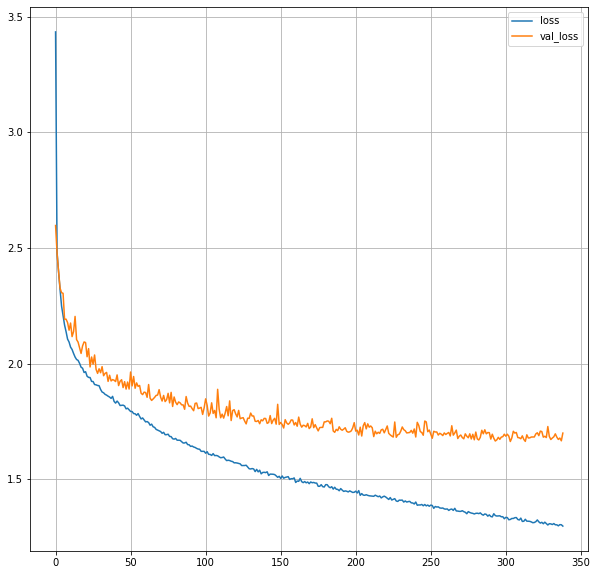

In [86]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (10,10))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [97]:
X_new = X_test[30:40]

In [98]:
y_pred = model.predict(X_new)

In [99]:
y_pred

array([[111.09616 ],
       [163.90306 ],
       [ 85.17725 ],
       [ 81.16785 ],
       [114.635086],
       [133.45937 ],
       [174.21033 ],
       [152.47665 ],
       [ 58.116024],
       [131.49911 ]], dtype=float32)

In [96]:
y_test[30:40]

6004     135.50
16524    207.02
2955      62.77
4396      59.77
19682    102.58
11177    120.29
17390    202.24
6397     228.06
5447      55.42
7348     130.02
Name: ROP, dtype: float64

In [104]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
%tensorboard --'!kill 946'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 946), started 1 day, 13:55:41 ago. (Use '!kill 946' to kill it.)

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   {serve,dev} ...
tensorboard: error: invalid choice: '--!kill 946' (choose from 'serve', 'dev')

In [105]:
TensorBoard?

Object `TensorBoard` not found.
